In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import scanpy as sc
import matplotlib.gridspec as gridspec

 

In [2]:
adata_5k=sc.read_h5ad('/nfs/team298/ls34/adult_skin/final_adatas/adata_xenium_freeze_plus3d.h5ad.v2')
def remove_markers(LIST):
    try: 
        LIST = {key: [gene for gene in genes if gene in adata_5k.var_names] 
                           for key, genes in LIST.items()}
    except: 
        LIST =[gene for gene in LIST if gene in adata_5k.var_names]
    return LIST






In [3]:
adata_5k.obs.lvl0.value_counts()

lvl0
KC                             447199
Fibroblast                     269626
Endothelium+pericyte+muscle    262398
Nonspecific                    158051
Myeloid                        151447
KC_Appendage                   121530
T/ILC                          118449
Other                           42303
Endothelium+pericyte            15096
Name: count, dtype: int64

In [4]:
CATEGORY="scanvi_predictions"
ANNOTATION = CATEGORY
adata=adata_5k
adata_5k.obs["lvl5_annotation_new"]=adata_5k.obs[CATEGORY]


# Epidermal immune niches

In [5]:
adata_5k_i = adata_5k[(adata_5k.obs["lvl0"].str.startswith("T"))|
                     (adata_5k.obs[CATEGORY].str.startswith("Plasm"))|
                        (adata_5k.obs[CATEGORY].str.startswith("Bcell"))|
                     (adata_5k.obs["lvl0"]=="Myeloid")|
                         (adata_5k.obs[CATEGORY]=="Mast cell") |
                      (adata_5k.obs[CATEGORY]=="LC_ALOX15hi") 

               ]
adata_5k_i.shape

desired_order2 =  ['Treg','Treg_LRRC32','Treg_LRRC32+', 'TR1', 'Tnaive','Tnaive1','Tnaive2', 'Tnaive/T_cm', 'Tnaive/Tcm', 'T_polarized_CCR6+','Th', 
                  'Th_PPARGhi',
                  'Th_PPARGhi_IL17+',
                  'Tc',
                 'Tc_IFNGhi',"Tc_ZNF683+",'T_γδ',
            'Tc_IL13','TRM_IL13',"TRM_IL13+",
'TRM_IL17', "TRM_IL17+", 'T','T_polarized',
                
                 







                
                 'T_Prolif','T_prolif',
                  "NK", "ILC1/NK","ILC_prolif",
          

'ILC1','ILC3',
                  'ILC3_CCL1+PTGDS+', 
                  
                          'ILC2',
                  
                  
                'Plasma cell',
                  "Monocyte",
                  'Monocyte?', 'Mac','Macint','Mac_TREM2+LPL+',
 'Mac2_CCL14hi','Mac_CCL14hi','MacCCL14_hi','Mac_LPLhi', 'Mac LPLhi (P2RY12-)',
                  'Mac LPLhi','Mac_TREM+','Mac_Perineural?',"Mac_CX3CR1+",
                  'Mac_prolif/PreDC', 'TransitionalDC',
                   "Mac_prolif/preDC",
'Mac_prolif',

















 'cDC1',
 'cDC2', 'cDC2_MMP12',   'cDC2: MMP12+', 'cDC2: MMP12hi', "cDC2: MMP12+IL1B+",'cDC2: THBS1+', 'cDC2: EREG+CCR7+', 'cDC2_cycling',
                  'MoDC/cDC2','MoDC','cDC2_MoDC(C1QTNF1+KDR+)','cDC2_MoDC (THBS1+)', 'cDC2_THBS1+','LC/MoDC_MMP12+/CXCL9+',
                  'cMoDC/cDC (C1QTNF1+KDR+)','MoDC?','MoDC_lowqithink?',

                   'LC_CCR7+','LC_SLC18A2+',
 'LC','LC_ALOX15hi',
'cDC2_MMP12hi (Mig)','cDC: MMP12+/CXCL9+', 
 'MigDC','MigDC_T_doublet',
                  'MigDC (cDC1)','MigDC (cDC2)',
 'pDC',"Mast cell", "Neutrophil",
                 
                  'DC2/Mac',
                  "Bcell",



 

]


# Ensure 'lvl3_annotation' is categorical
if not pd.api.types.is_categorical_dtype(adata_5k_i.obs[CATEGORY]):
    adata_5k_i.obs[CATEGORY] = adata_5k_i.obs[CATEGORY].astype('category')

    
if not pd.api.types.is_categorical_dtype(adata_5k_i.obs[CATEGORY]):
    adata_5k_i.obs[CATEGORY] = adata_5k_i.obs[CATEGORY].astype('category')

missing_data = 0
for x in list(adata_5k_i.obs[CATEGORY].unique()):
    if x not in desired_order2:
        print(x)
        missing_data +=1
if missing_data != 0:
    stop
        
        
# Set the categories in the desired order
adata_5k_i.obs[CATEGORY] = pd.Categorical(
    adata_5k_i.obs[CATEGORY],
    categories=desired_order2,
    ordered=True
)
 
    




/tmp/ipykernel_1987804/3663263620.py:91: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not pd.api.types.is_categorical_dtype(adata_5k_i.obs[CATEGORY]):
/tmp/ipykernel_1987804/3663263620.py:95: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not pd.api.types.is_categorical_dtype(adata_5k_i.obs[CATEGORY]):
/tmp/ipykernel_1987804/3663263620.py:108: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_5k_i.obs[CATEGORY] = pd.Categorical(


In [6]:
with open('/nfs/team298/ls34/niche_colors.pkl', 'rb') as f:
    colors_new2 = pickle.load(f)

In [7]:
adata_5k = adata_5k[          #(adata_5k.obs["Timepoint"].str.startswith("Past"))|

                  
                                            (adata_5k.obs["Site_status"].str.startswith("Les"))
#(adata_5k.obs["Timepoint"].str.startswith("Never"))|
                      #     (adata_5k.obs["Timepoint"].str.startswith("Non"))
                   ]
#adata_5k.obs["Site_status"].value_counts()
adata_5k.obs["Site_status"].value_counts()

Site_status
Lesional             182126
Lesional Baseline    131156
Name: count, dtype: int64

In [8]:
adata_5k[adata_5k.obs["Timepoint"]=="Non-lesional Baseline"].obs.info_id6.value_counts()

info_id6
BK30_Lesional Baseline    14734
Name: count, dtype: int64

In [9]:
adata_5k.obs["Timepoint"].value_counts()

Timepoint
Lesional Baseline        233271
Non-lesional Baseline     14734
Name: count, dtype: int64

In [10]:
# adata_5k_i = adata_5k[(adata_5k.obs["lvl0"].str.startswith("T"))|
#                      (adata_5k.obs[CATEGORY].str.startswith("Plasm"))|
#                         (adata_5k.obs[CATEGORY].str.startswith("Bcell"))|
#                      (adata_5k.obs["lvl0"]=="Myeloid")|
#                          (adata_5k.obs[CATEGORY]=="Mast cell") |
#                       (adata_5k.obs[CATEGORY]=="LC_ALOX15hi") 
                      

# #                (adata_5k.obs["lvl0"]=="Melanocyte")|
#  #               (adata_5k.obs["lvl0"]=="Adipocyte")|
#   #             (adata_5k.obs["lvl0"]=="Mast cell")|
#    #                (adata_5k.obs["lvl0"]=="Plasma cell/Bcell")
#                ]
# adata_5k_i.shape



In [11]:

desired_order2 = [ 'TRM_IL13+',
 'TRM_IL17+',
    
     'Treg',
 'Treg_LRRC32+',
                   'Tnaive',
 'Th',
 'Th_PPARGhi', 'Tc', 'T_Prolif', 'T', 'T_γδ',
                  
   'NK',
                  
 'ILC1',

 'ILC3',
 'ILC3_CCL1+PTGDS+',
 'ILC_prolif',
     'ILC2',
                  
                  
                   'Plasma cell',
      'Bcell',

                  
 'Monocyte',
 'Mac','Mac_CX3CR1+',
 'cDC1',
                   'MigDC (cDC1)',
 'cDC2',

 'cDC2: MMP12hi',
 'cDC2_cycling', 'MigDC (cDC2)', 'cDC2: EREG+CCR7+',
                   'LC',



 'TransitionalDC',


 'pDC',

 'Neutrophil',
     'Mast cell',
    





]
# Ensure 'lvl3_annotation' is categorical
if not pd.api.types.is_categorical_dtype(adata_5k_i.obs[CATEGORY]):
    adata_5k_i.obs[CATEGORY] = adata_5k_i.obs[CATEGORY].astype('category')

    
if not pd.api.types.is_categorical_dtype(adata_5k_i.obs[CATEGORY]):
    adata_5k_i.obs[CATEGORY] = adata_5k_i.obs[CATEGORY].astype('category')

missing_data = 0
for x in list(adata_5k_i.obs[CATEGORY].unique()):
    if x not in desired_order2:
        print(x)
        missing_data +=1
if missing_data != 0:
    stop
        
        
# Set the categories in the desired order
adata_5k_i.obs[CATEGORY] = pd.Categorical(
    adata_5k_i.obs[CATEGORY],
    categories=desired_order2,
    ordered=True
)
 
    




/tmp/ipykernel_1987804/2767091564.py:51: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not pd.api.types.is_categorical_dtype(adata_5k_i.obs[CATEGORY]):
/tmp/ipykernel_1987804/2767091564.py:55: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not pd.api.types.is_categorical_dtype(adata_5k_i.obs[CATEGORY]):


In [12]:
adata_5k_i.obs['niche12'].value_counts()

niche12
Papillary_dermis           48864
Tzone-like                 39135
Small_BV                   29082
Reticular_dermis            8276
Epidermis_basal             5484
Reticular_dermis_LErich     4896
Epidermis_mid1              1849
Sebaceous_gland             1558
Epidermis_late              1077
Epidermis_mid2              1053
Sebaceous_immune             889
Sweat_gland_channel          656
Hypodermis                   593
Plasma_cell_niche            565
Perineural                   491
Large_BV                     476
Muscle                       349
Sweat_gland                  302
Epidermis_APChi              207
OuterHF                      198
Epidermis_basal_immune       117
HF                            68
Perifollicular_VE              9
Name: count, dtype: int64

In [13]:
# 1. Compute counts per niche
counts = adata_5k_i.obs['niche12'].value_counts()

# 2. Keep only niches with ≥10 cells
keep_niches = counts[counts >= 5].index.tolist()

# 3. Subset your AnnData
adata_5k_i = adata_5k_i[adata_5k_i.obs['niche12'].isin(keep_niches)].copy()
adata_5k_i.obs['niche12'] = adata_5k_i.obs['niche12'].cat.remove_unused_categories()

adata_5k_i.obs['niche12'].value_counts()

niche12
Papillary_dermis           48864
Tzone-like                 39135
Small_BV                   29082
Reticular_dermis            8276
Epidermis_basal             5484
Reticular_dermis_LErich     4896
Epidermis_mid1              1849
Sebaceous_gland             1558
Epidermis_late              1077
Epidermis_mid2              1053
Sebaceous_immune             889
Sweat_gland_channel          656
Hypodermis                   593
Plasma_cell_niche            565
Perineural                   491
Large_BV                     476
Muscle                       349
Sweat_gland                  302
Epidermis_APChi              207
OuterHF                      198
Epidermis_basal_immune       117
HF                            68
Perifollicular_VE              9
Name: count, dtype: int64

In [14]:
adata_5k_i=adata_5k_i[(adata_5k_i.obs['niche12'].str.startswith("Epi"))|
                     (adata_5k_i.obs['niche12'].str.startswith("Tz"))|
                      (adata_5k_i.obs['niche12'].str.startswith("Papill"))|
                      (adata_5k_i.obs['niche12'].str.startswith("Small"))
                     ]
# 4. (Optional) If you want nuisance categories removed entirely:


In [15]:
desired_order = ['Epidermis_late', 'Epidermis_mid2',
 'Epidermis_mid1',
 'Epidermis_basal',
    
     
                 "Epidermis_APChi", "Papillary_dermis",
                 "Tzone-like", 
                 'Small_BV'

 #'Perifollicular_VE',
 #'Epidermis_basal_immune'
                ]

# Lesional immune - fig 3g

In [16]:
all_cell_types = sorted(adata_5k_i.obs[ANNOTATION].unique().tolist())

all_cell_types

['Bcell',
 'ILC1',
 'ILC2',
 'ILC3',
 'ILC3_CCL1+PTGDS+',
 'ILC_prolif',
 'LC',
 'Mac',
 'Mast cell',
 'MigDC (cDC2)',
 'Monocyte',
 'NK',
 'Plasma cell',
 'T',
 'TRM_IL13+',
 'TRM_IL17+',
 'T_Prolif',
 'T_γδ',
 'Tc',
 'Th',
 'Tnaive',
 'TransitionalDC',
 'Treg',
 'Treg_LRRC32+',
 'cDC1',
 'cDC2',
 'cDC2: EREG+CCR7+',
 'cDC2: MMP12hi',
 'pDC']

In [17]:
ANNOTATION_ORDER = desired_order2
ANNOTATION_ORDER
#[ 'TRM_IL13+',
#  'TRM_IL17+',
#      'Treg',
#  'Treg_LRRC32+',
#                      'Th',
#  'Th_PPARGhi', 'Tnaive',
#                      'Tc',

#      'T_γδ',
#                      'T_Prolif',
#                      'T',

                    
#  'NK',

#  'ILC1',
#  'ILC3',
#  'ILC3_CCL1+PTGDS+',
                    
#  'ILC_prolif',
#                      'ILC2',


#                      'Monocyte',
#  'Mac',
#  'LC',
#  'MigDC (cDC2)',
#                      'MigDC (cDC1)',
#  'cDC2: EREG+CCR7+',

#  'cDC2: MMP12hi', 'cDC2_cycling',
#  'cDC2',
#  'cDC1',



#                         'Bcell', 'Plasma cell',
                    





                    
#  'pDC', 
                    
#                      'Neutrophil', 'Mast cell',

                   
#                    ]

['TRM_IL13+',
 'TRM_IL17+',
 'Treg',
 'Treg_LRRC32+',
 'Tnaive',
 'Th',
 'Th_PPARGhi',
 'Tc',
 'T_Prolif',
 'T',
 'T_γδ',
 'NK',
 'ILC1',
 'ILC3',
 'ILC3_CCL1+PTGDS+',
 'ILC_prolif',
 'ILC2',
 'Plasma cell',
 'Bcell',
 'Monocyte',
 'Mac',
 'Mac_CX3CR1+',
 'cDC1',
 'MigDC (cDC1)',
 'cDC2',
 'cDC2: MMP12hi',
 'cDC2_cycling',
 'MigDC (cDC2)',
 'cDC2: EREG+CCR7+',
 'LC',
 'TransitionalDC',
 'pDC',
 'Neutrophil',
 'Mast cell']

In [ ]:
adata_5k_i=adata_5k[adata_5k.obs["lvl4_annotation"].isin(ANNOTATION_ORDER)]


In [ ]:
for x in adata_5k_i.obs[ANNOTATION].unique():
    if x not in ANNOTATION_ORDER:
        print(x)

In [19]:
# adata_5k_iii

In [29]:
ANNOTATION="lvl4_annotation"

In [ ]:
adata_5k_i.obs["NEW"] = adata_5k_i.obs["disease_overall"].astype(str) + "_" + adata_5k_i.obs[ANNOTATION].astype(str) 
adata_5k_i.obs["NEW"].value_counts()

In [44]:
adata_5k_i.obs["NEW"].value_counts()

NEW
AD_Mac                        9480
AD_T                          8365
Psoriasis_Mac                 4447
Psoriasis_T                   4127
AD_Th                         3264
AD_cDC2                       2911
AD_Treg                       2847
Psoriasis_Th                  1763
AD_cDC1                       1459
AD_MigDC (cDC2)               1379
AD_Mast cell                  1206
Psoriasis_cDC2                1109
AD_TRM_IL13+                  1081
Psoriasis_Treg                1038
Psoriasis_Mast cell            770
AD_LC                          712
AD_cDC2: MMP12hi               703
Psoriasis_cDC1                 702
Psoriasis_MigDC (cDC2)         629
AD_cDC2: EREG+CCR7+            605
AD_T_Prolif                    587
Psoriasis_TRM_IL17+            435
AD_Tc                          213
AD_Plasma cell                 208
AD_Treg_LRRC32+                181
Psoriasis_cDC2: EREG+CCR7+     171
Psoriasis_LC                   159
Psoriasis_cDC2: MMP12hi        149
Psoriasis_Tc    

In [40]:
ANNOTATION_ORDER2 = sorted(list(adata_5k_i.obs["NEW"].unique()))
ANNOTATION_ORDER2

['AD_Bcell',
 'AD_ILC1',
 'AD_ILC2',
 'AD_ILC3',
 'AD_ILC3_CCL1+PTGDS+',
 'AD_ILC_prolif',
 'AD_LC',
 'AD_Mac',
 'AD_Mast cell',
 'AD_MigDC (cDC1)',
 'AD_MigDC (cDC2)',
 'AD_Monocyte',
 'AD_NK',
 'AD_Neutrophil',
 'AD_Plasma cell',
 'AD_T',
 'AD_TRM_IL13+',
 'AD_T_Prolif',
 'AD_T_γδ',
 'AD_Tc',
 'AD_Th',
 'AD_Th_PPARGhi',
 'AD_Treg',
 'AD_Treg_LRRC32+',
 'AD_cDC1',
 'AD_cDC2',
 'AD_cDC2: EREG+CCR7+',
 'AD_cDC2: MMP12hi',
 'AD_cDC2_cycling',
 'AD_pDC',
 'Psoriasis_Bcell',
 'Psoriasis_ILC1',
 'Psoriasis_ILC2',
 'Psoriasis_ILC3',
 'Psoriasis_ILC3_CCL1+PTGDS+',
 'Psoriasis_LC',
 'Psoriasis_Mac',
 'Psoriasis_Mast cell',
 'Psoriasis_MigDC (cDC2)',
 'Psoriasis_Monocyte',
 'Psoriasis_NK',
 'Psoriasis_Neutrophil',
 'Psoriasis_Plasma cell',
 'Psoriasis_T',
 'Psoriasis_TRM_IL17+',
 'Psoriasis_T_Prolif',
 'Psoriasis_T_γδ',
 'Psoriasis_Tc',
 'Psoriasis_Th',
 'Psoriasis_Th_PPARGhi',
 'Psoriasis_Treg',
 'Psoriasis_Treg_LRRC32+',
 'Psoriasis_cDC1',
 'Psoriasis_cDC2',
 'Psoriasis_cDC2: EREG+CCR7+',
 'P

/tmp/ipykernel_1987804/3583896634.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["niche12", "NEW"])


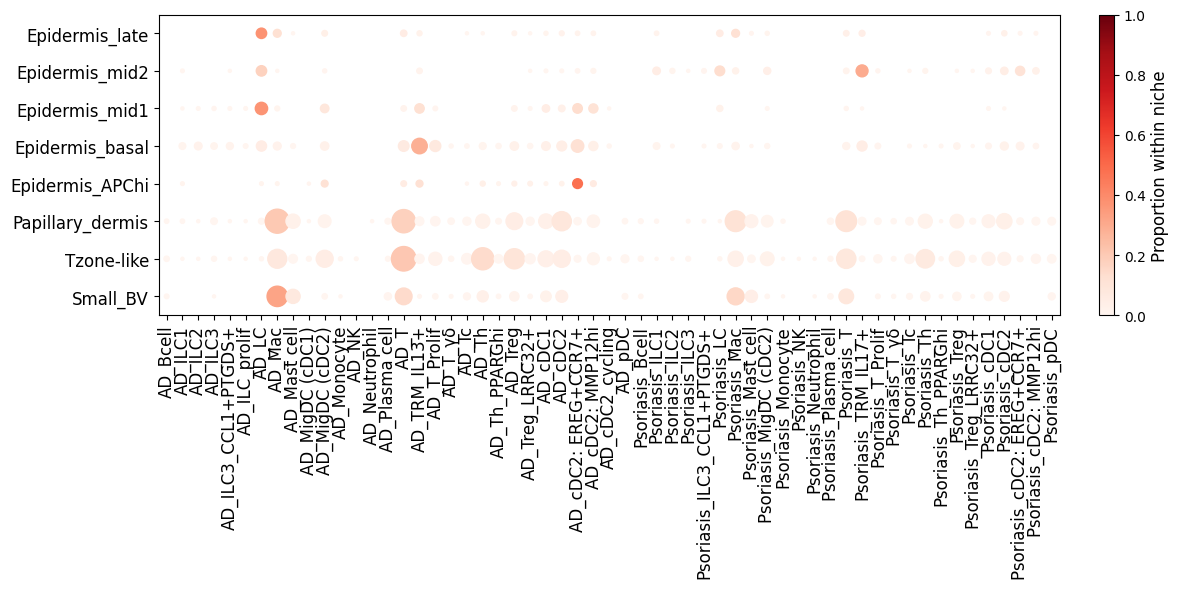

In [41]:

# --- setup colormap ---
cmap = mpl.cm.Reds.copy()
cmap.set_bad(color='lightgrey')

# --- counts matrix directly (no reset_index/melt/query nonsense) ---
counts = (
    adata_5k_i.obs
    .groupby(["niche12", "NEW"])
    .size()
    .unstack(fill_value=0)
)

# filter/reindex columns to annotation order
counts = counts.loc[:, counts.columns.isin(ANNOTATION_ORDER2)]
counts = counts.reindex(columns=ANNOTATION_ORDER2).fillna(0)

# reorder niches if you have desired_order
counts = counts.reindex(index=desired_order).fillna(0)

# proportions per row
props = counts.div(counts.sum(axis=1), axis=0)

# --- flatten into arrays for vectorized scatter ---
niches, anns = np.meshgrid(np.arange(len(props.index)), np.arange(len(props.columns)), indexing="ij")

# positions
x = anns.ravel() + 0.5   # annotation (cols) → x
y = niches.ravel() + 0.5 # niche (rows) → y

# values
prop_vals = props.values.ravel()
count_vals = counts.values.ravel()

# mask invalids
mask = ~np.isnan(prop_vals) & (count_vals > 0)
x, y = x[mask], y[mask]
prop_vals, count_vals = prop_vals[mask], count_vals[mask]

# --- plotting in ONE scatter call ---
fig, ax_heat = plt.subplots(figsize=(12, 6))
sc = ax_heat.scatter(
    x, y,
    s=np.sqrt(count_vals) * 5,   # dot size ~ sqrt(count)
    c=prop_vals, cmap=cmap,
    vmin=0, vmax=1,
    marker="o"
)

# axis aesthetics
ax_heat.set_xticks(np.arange(len(props.columns)) + 0.5)
ax_heat.set_xticklabels(props.columns, rotation=90, fontsize=12)
ax_heat.set_yticks(np.arange(len(props.index)) + 0.5)
ax_heat.set_yticklabels(props.index, fontsize=12)
ax_heat.set_xlim(0, len(props.columns))
ax_heat.set_ylim(0, len(props.index))
ax_heat.invert_yaxis()
ax_heat.grid(False)

# --- colorbar ---
cbar = fig.colorbar(sc, ax=ax_heat, fraction=0.046, pad=0.04)
cbar.set_label("Proportion within niche", fontsize=12)

plt.tight_layout()
plt.show()

In [62]:
ANNOTATION_ORDER3=[
    #'AD_Bcell',
 # 'AD_ILC1',
 # 'AD_ILC2',
 # 'AD_ILC3',
 # 'AD_ILC3_CCL1+PTGDS+',
 # 'AD_ILC_prolif',
 'AD_LC',
    'Psoriasis_LC',
    
 # 'AD_Mac',
 # 'AD_Mast cell',
 'AD_MigDC (cDC2)',

 # 'AD_NK',
 # 'AD_Neutrophil',
 # 'AD_Plasma cell',
 # 'AD_T',
 # 'AD_TRM_IL13+',
 # 'AD_T_Prolif',
 # 'AD_T_γδ',
 # 'AD_Tc',
 # 'AD_Th',
 # 'AD_Th_PPARGhi',
 # 'AD_Treg',
 # 'AD_Treg_LRRC32+',



 # 'AD_pDC',
 # 'Psoriasis_Bcell',
 # 'Psoriasis_ILC1',
 # 'Psoriasis_ILC2',
 # 'Psoriasis_ILC3',
 # 'Psoriasis_ILC3_CCL1+PTGDS+',
#'Psoriasis_Mac',
 # 'Psoriasis_Mast cell',
 'Psoriasis_MigDC (cDC2)',
     'AD_Monocyte',
 'Psoriasis_Monocyte',
 # 'Psoriasis_NK',
 # 'Psoriasis_Neutrophil',
 # 'Psoriasis_Plasma cell',
 # 'Psoriasis_T',
 # 'Psoriasis_TRM_IL17+',
 # 'Psoriasis_T_Prolif',
 # 'Psoriasis_T_γδ',
 # 'Psoriasis_Tc',
 # 'Psoriasis_Th',
 # 'Psoriasis_Th_PPARGhi',
 # 'Psoriasis_Treg',
 # 'Psoriasis_Treg_LRRC32+',
     'AD_cDC1',

 'Psoriasis_cDC1',
    
     'AD_cDC2',
 'Psoriasis_cDC2',
    
     'AD_cDC2: EREG+CCR7+',
 'Psoriasis_cDC2: EREG+CCR7+',
    
    
     'AD_cDC2: MMP12hi',
 'Psoriasis_cDC2: MMP12hi',
    
    
     'AD_MigDC (cDC1)',
 #'Psoriasis_pDC'
     'AD_cDC2_cycling',

]


/tmp/ipykernel_1987804/3619041860.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["niche12", ANNOTATION])
/tmp/ipykernel_1987804/3619041860.py:100: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


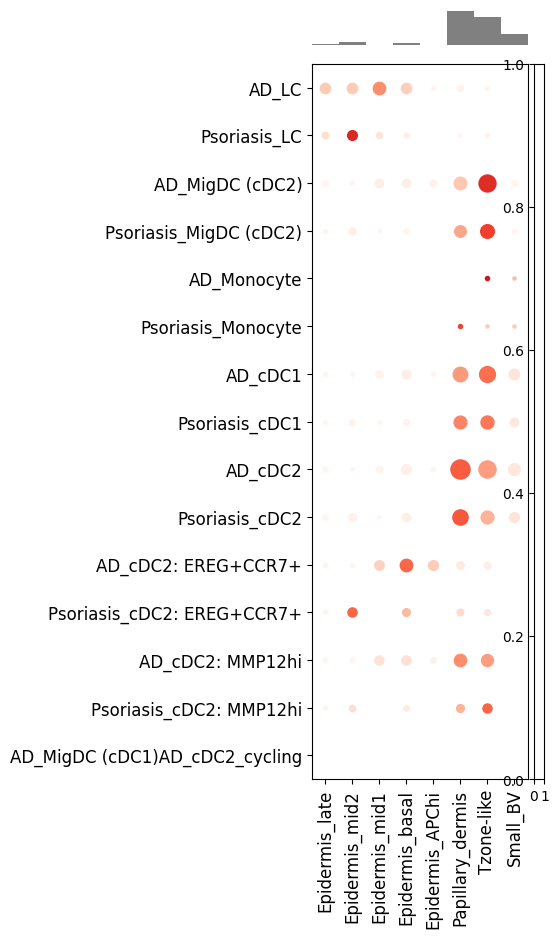

In [57]:
ANNOTATION="NEW"
counts = (
    adata_5k_i.obs
    .groupby(["niche12", ANNOTATION])
    .size()
    .reset_index(name="count")
)

heatmap_data = counts.pivot(index=ANNOTATION, columns="niche12", values="count")

# filter to only cell types in your order
heatmap_data = heatmap_data[heatmap_data.index.isin(ANNOTATION_ORDER3)]

# reindex in desired row order
heatmap_data = heatmap_data.reindex(index=ANNOTATION_ORDER3).fillna(0)

# also reorder columns if needed
heatmap_data = heatmap_data.reindex(columns=desired_order).fillna(np.nan)

heatmap_data = heatmap_data.div(heatmap_data.sum(axis=1), axis=0)



# assume heatmap_data, cmap, adata_5k_iii are defined

# raw counts
col_counts = (
    adata_5k_iii.obs['niche12']
    .value_counts()
    .reindex(heatmap_data.columns)
    .fillna(0)
)
row_counts = (
    adata_5k_iii.obs[ANNOTATION]
    .value_counts()
    .reindex(heatmap_data.index)
    .fillna(0)
)

# figure + grid
fig = plt.figure(figsize=(3,10))
gs = gridspec.GridSpec(
    2, 2,
    height_ratios=[0.2, 4],  # First value controls top bar height (was 1), make it smaller
    width_ratios=[4, 0.2],   # Second value controls right bar width (was 1), make it smaller
    hspace=0.05, wspace=0.05
)

ax_colbar = fig.add_subplot(gs[0,0])
ax_empty  = fig.add_subplot(gs[0,1])
ax_heat   = fig.add_subplot(gs[1,0])
ax_rowbar = fig.add_subplot(gs[1,1])

ax_empty.axis('off')

# 1) niche12 bar (top), no text
xx = np.arange(len(col_counts))
ax_colbar.bar(xx, col_counts.values, color='gray', width=1, align='edge')
ax_colbar.set_xlim(0, len(col_counts))
ax_colbar.axis('off')


# Flatten into long-form for scatter plotting
dot_data = heatmap_data.reset_index().melt(
    id_vars=ANNOTATION, var_name="niche12", value_name="prop"
)

# Merge with raw counts for dot sizes
counts_matrix = counts.pivot(index=ANNOTATION, columns="niche12", values="count").fillna(0)
counts_long = counts_matrix.reset_index().melt(
    id_vars=ANNOTATION, var_name="niche12", value_name="count"
)

dot_data = dot_data.merge(counts_long, on=[ANNOTATION, "niche12"])

# Scatter plot in the same ax_heat
ax_heat.clear()
for i, ct in enumerate(heatmap_data.index):
    for j, niche in enumerate(heatmap_data.columns):
        val = dot_data.query(f"{ANNOTATION} == @ct and niche12 == @niche")
        if not val.empty:
            prop = val["prop"].values[0]
            count = val["count"].values[0]
            ax_heat.scatter(
                j+0.5, i+0.5,
                s=(count**0.5)*5,  # size scaling, tweak multiplier
                c=[cmap(prop)],    # color = proportion
                marker="o"
            )

# aesthetics
ax_heat.set_xticks(np.arange(len(heatmap_data.columns)) + 0.5)
ax_heat.set_xticklabels(heatmap_data.columns, rotation=90, fontsize=12)
ax_heat.set_yticks(np.arange(len(heatmap_data.index)) + 0.5)
ax_heat.set_yticklabels(heatmap_data.index, fontsize=12)
ax_heat.set_xlim(0, len(heatmap_data.columns))
ax_heat.set_ylim(0, len(heatmap_data.index))
ax_heat.invert_yaxis()
ax_heat.grid(False)
plt.tight_layout()
plt.show()

In [212]:
adata_5k_ii=adata_5k_i[adata_5k_i.obs[ANNOTATION].isin(ANNOTATION_ORDER3)]
adata_5k_ii.obs[ANNOTATION].value_counts()

NEW
AD_cDC2                       2911
AD_cDC1                       1459
AD_MigDC (cDC2)               1379
Psoriasis_cDC2                1109
AD_TRM_IL13+                  1081
AD_LC                          712
AD_cDC2: MMP12hi               703
Psoriasis_cDC1                 702
Psoriasis_MigDC (cDC2)         629
AD_cDC2: EREG+CCR7+            605
AD_T_Prolif                    587
Psoriasis_TRM_IL17+            435
Psoriasis_cDC2: EREG+CCR7+     171
Psoriasis_LC                   159
Psoriasis_cDC2: MMP12hi        149
AD_ILC3                         54
AD_ILC2                         48
AD_ILC1                         40
AD_ILC3_CCL1+PTGDS+             36
AD_T_γδ                         32
Psoriasis_T_γδ                  16
AD_ILC_prolif                   11
AD_MigDC (cDC1)                  9
AD_cDC2_cycling                  7
Psoriasis_Monocyte               5
AD_Monocyte                      4
Name: count, dtype: int64

/tmp/ipykernel_1987804/534542602.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["niche12", ANNOTATION])
/tmp/ipykernel_1987804/534542602.py:114: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


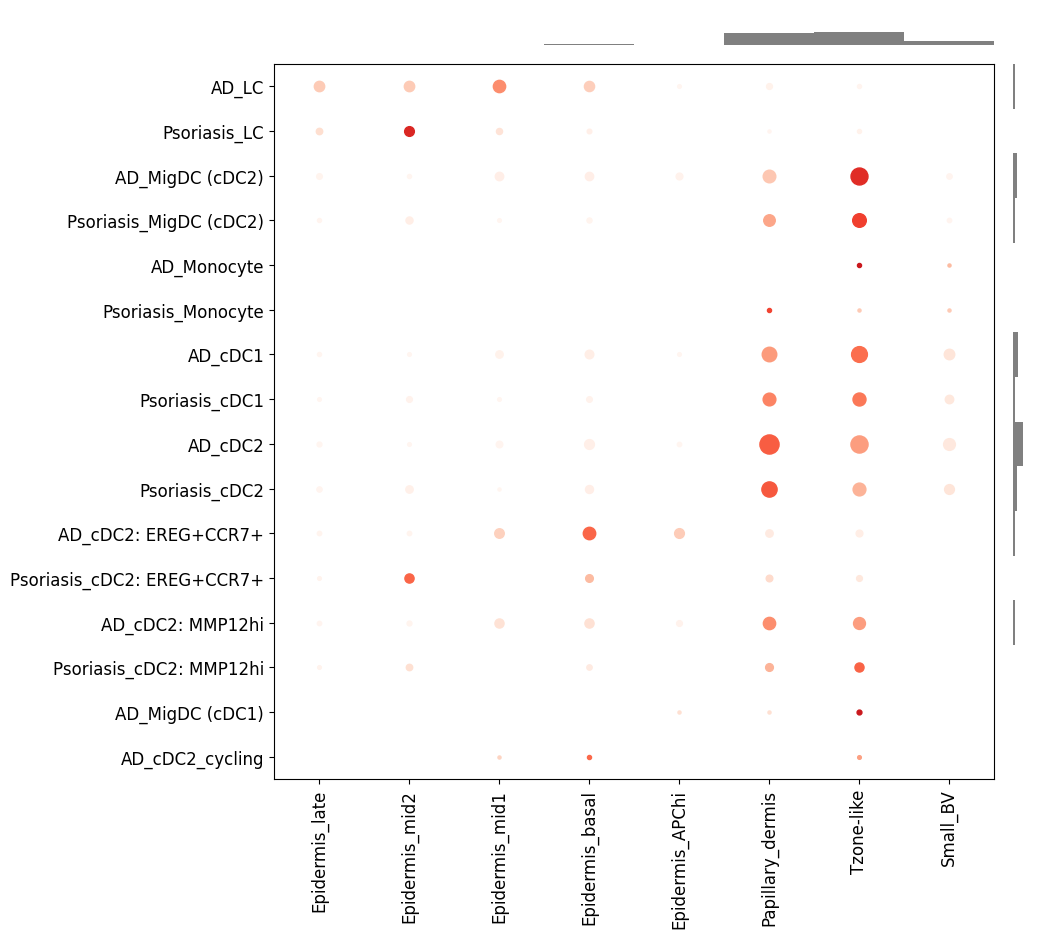

In [65]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import gridspec

# --- setup colormap ---
cmap = mpl.cm.Reds.copy()
cmap.set_bad(color='lightgrey')

ANNOTATION = "NEW"

# counts
counts = (
    adata_5k_ii.obs
    .groupby(["niche12", ANNOTATION])
    .size()
    .reset_index(name="count")
)

# pivot with niche on cols, annotation on rows
heatmap_data = counts.pivot(index=ANNOTATION, columns="niche12", values="count")

# filter to only cell types in your order
heatmap_data = heatmap_data[heatmap_data.index.isin(ANNOTATION_ORDER3)]

# reindex in desired row order
heatmap_data = heatmap_data.reindex(index=ANNOTATION_ORDER3).fillna(0)

# reorder columns if needed
heatmap_data = heatmap_data.reindex(columns=desired_order).fillna(np.nan)

# normalize per-row to get proportions for heatmap
heatmap_data = heatmap_data.div(heatmap_data.sum(axis=1), axis=0)

# --- proportions for marginal bars ---
col_counts = (
    adata_5k_i.obs['niche12']
    .value_counts(normalize=True)   # <-- normalize=True gives proportion
    .reindex(heatmap_data.columns)
    .fillna(0)
)

row_counts = (
    adata_5k_ii.obs[ANNOTATION]
    .value_counts(normalize=True)   # <-- same here
    .reindex(heatmap_data.index)
    .fillna(0)
)

# figure + grid
fig = plt.figure(figsize=(10, 10))
gs = gridspec.GridSpec(
    2, 2,
    height_ratios=[0.2, 4],
    width_ratios=[4, 0.2],
    hspace=0.05, wspace=0.05
)

ax_colbar = fig.add_subplot(gs[0,0])
ax_empty  = fig.add_subplot(gs[0,1])
ax_heat   = fig.add_subplot(gs[1,0])
ax_rowbar = fig.add_subplot(gs[1,1])

ax_empty.axis('off')

# --- column abundance bar (top, proportions) ---
xx = np.arange(len(col_counts))
ax_colbar.bar(xx, col_counts.values, color='gray', width=1, align='edge')
ax_colbar.set_xlim(0, len(col_counts))
ax_colbar.set_ylim(0, 1)   # proportions between 0 and 1
ax_colbar.axis('off')

# --- row abundance bar (right, proportions) ---
yy = np.arange(len(row_counts))
ax_rowbar.barh(yy, row_counts.values, color='gray', height=1, align='edge')
ax_rowbar.set_ylim(0, len(row_counts))
ax_rowbar.set_xlim(0, 1)   # proportions between 0 and 1
ax_rowbar.invert_yaxis()
ax_rowbar.axis('off')

# --- scatter heatmap (dot plot) ---
dot_data = heatmap_data.reset_index().melt(
    id_vars=ANNOTATION, var_name="niche12", value_name="prop"
)
counts_matrix = counts.pivot(index=ANNOTATION, columns="niche12", values="count").fillna(0)
counts_long = counts_matrix.reset_index().melt(
    id_vars=ANNOTATION, var_name="niche12", value_name="count"
)
dot_data = dot_data.merge(counts_long, on=[ANNOTATION, "niche12"])

for i, ct in enumerate(heatmap_data.index):
    for j, niche in enumerate(heatmap_data.columns):
        val = dot_data.query(f"{ANNOTATION} == @ct and niche12 == @niche")
        if not val.empty:
            prop = val["prop"].values[0]
            count = val["count"].values[0]
            ax_heat.scatter(
                j+0.5, i+0.5,
                s=(count**0.5)*5,
                c=[cmap(prop)],
                marker="o"
            )

# aesthetics
ax_heat.set_xticks(np.arange(len(heatmap_data.columns)) + 0.5)
ax_heat.set_xticklabels(heatmap_data.columns, rotation=90, fontsize=12)
ax_heat.set_yticks(np.arange(len(heatmap_data.index)) + 0.5)
ax_heat.set_yticklabels(heatmap_data.index, fontsize=12)
ax_heat.set_xlim(0, len(heatmap_data.columns))
ax_heat.set_ylim(0, len(heatmap_data.index))
ax_heat.invert_yaxis()
ax_heat.grid(False)

plt.tight_layout()
plt.show()

In [72]:
adata_filtered = adata_5k_i[~adata_5k_i.obs["niche12"].str.startswith("Epidermis_APC")]
adata_filtered = adata_filtered[adata_filtered.obs["niche12"].str.startswith("Epidermis")]
adata_filtered.obs.niche12.value_counts()

niche12
Epidermis_basal           2168
Epidermis_mid2             719
Epidermis_mid1             668
Epidermis_late             332
Epidermis_basal_immune       3
Name: count, dtype: int64

/tmp/ipykernel_1987804/2496148221.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(["disease_overall", "lvl4_annotation"]).size().reset_index(name="cell_count")


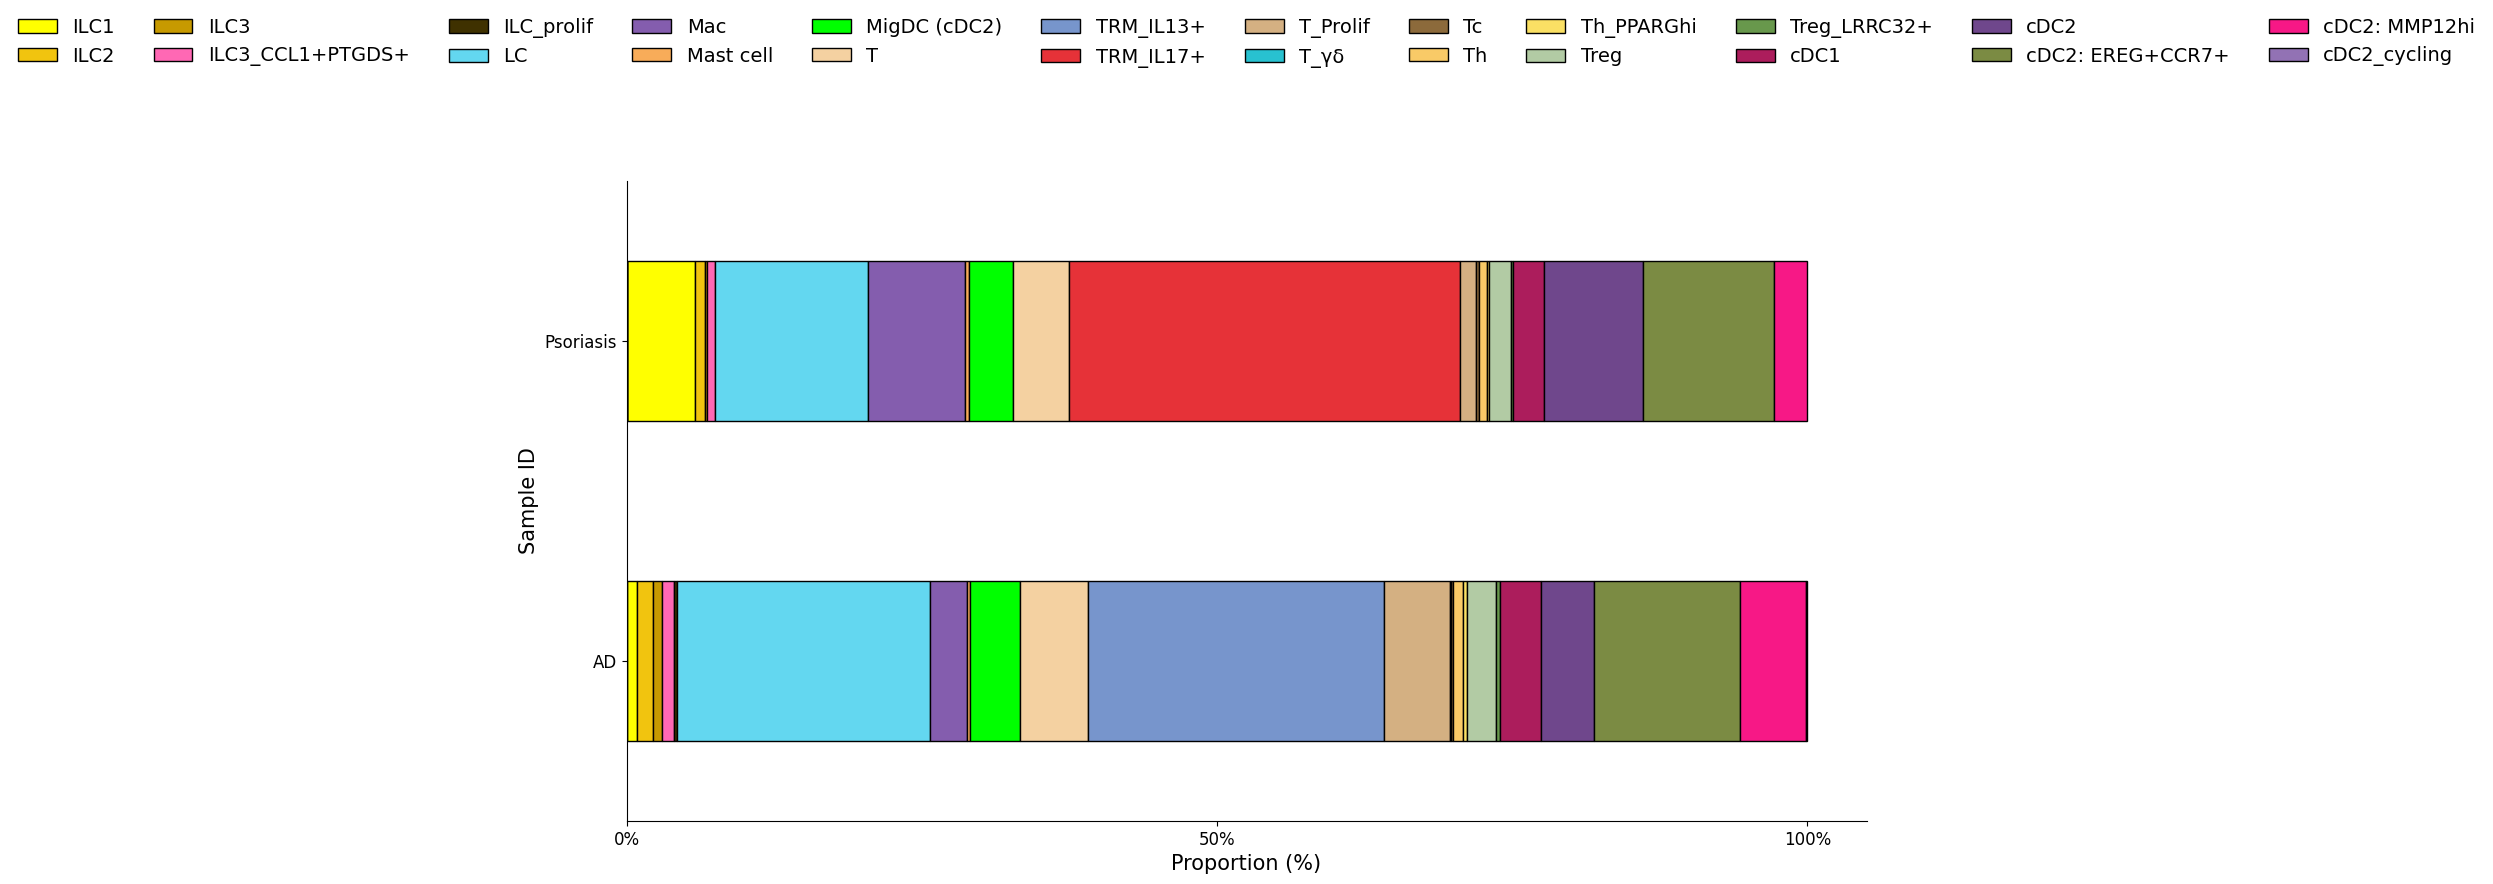

In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import numpy as np  # Required for ceil()

# Constants
NICHE11 = "Epidermis_mid1"
MINIMUM_PERCENT = 0.1
COLOR_PICKLE_PATH = '/nfs/team298/ls34/color_for_adult_skin2.pkl'

# Filter the data
# adata_5k[
#     adata_5k.obs["niche12"].str.startswith(NICHE11)
# ]
sample_counts = adata_filtered.obs["info_id2"].value_counts()
valid_samples = sample_counts[sample_counts > 10].index
KEEP = ["Lesional"]
adata_filtered = adata_filtered[adata_filtered.obs["Site_status_binary"].isin(KEEP)]
adata_filtered = adata_filtered[adata_filtered.obs["info_id2"].isin(valid_samples)]

# Relevant columns
df = adata_filtered.obs[["info_id2", "lvl4_annotation", "disease_overall"]].copy()

# Count cell types per sample
grouped = df.groupby(["disease_overall", "lvl4_annotation"]).size().reset_index(name="cell_count")

# Pivot to counts matrix
pivot = grouped.pivot(index="disease_overall", columns="lvl4_annotation", values="cell_count").fillna(0)

# Normalize to percentages
proportions = pivot.div(pivot.sum(axis=1), axis=0) * 100

# Filter out rare cell types
mask = (proportions >= MINIMUM_PERCENT).any(axis=0)
proportions = proportions.loc[:, mask]

# Renormalize to sum to 100%
proportions = proportions.div(proportions.sum(axis=1), axis=0) * 100

# # Sort by disease group
# sample_diseases = df.drop_duplicates("info_id2").set_index("info_id2")["disease_overall"]
# disease_order = sample_diseases.loc[proportions.index].sort_values().index
# proportions = proportions.loc[disease_order]

# Load colors
with open(COLOR_PICKLE_PATH, 'rb') as f:
    colors = pickle.load(f)
plot_colors = [colors.get(cell_type, "grey") for cell_type in proportions.columns]

# Plot
fig, ax = plt.subplots(figsize=(16, 10))
plt.subplots_adjust(top=0.75)

proportions.plot(
    kind="barh",
    stacked=True,
    color=plot_colors,
    edgecolor="black",
    ax=ax
)

# Axis formatting
ax.set_xlabel("Proportion (%)", fontsize=15)
ax.set_ylabel("Sample ID", fontsize=15)
ax.set_title("", fontsize=1)
ax.set_yticks(range(len(proportions)))
ax.set_yticklabels(proportions.index, fontsize=12)
ax.set_xticks([0, 50, 100])
ax.set_xticklabels(["0%", "50%", "100%"], fontsize=12)

# Legend with 2 rows
ax.legend(
    title="",
    labels=proportions.columns,
    loc='lower center',
    bbox_to_anchor=(0.5, 1.15),
    ncol=int(np.ceil(len(proportions.columns) / 2)),
    fontsize=14,
    title_fontsize=10,
    frameon=False
)

# Clean look
ax.grid(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

In [79]:
adata_5k

AnnData object with n_obs × n_vars = 313282 × 5001
    obs: 'cell_id', 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'genomic_control_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'nucleus_count', 'segmentation_method', 'sample_id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_10_genes', 'pct_counts_in_top_20_genes', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_150_genes', 'n_counts', 'xenium_id', 'xenium_id_recoded', 'Site_status', 'GSTT patient ID', 'Sanger patient ID', 'Drug', 'Responder', 'Timepoint', "Library type (CITE or 5'GEX/TCR)", 'Segmentation Y/N?', 'Sample ID', 'Xenium slide number', 'Xenium region number2', 'baseline_postrx', 'info_id', 'Annotation', 'NICHE_NAMES', 'batch', 'DonorID', 'Site_status_binary', 'lvl5_annotation', 'lvl4_annotation', 'lvl3_annotation', 'Mapping_status', 'disease_overall', 'info_

In [78]:
adata_5k=adata_5k.copy()

KeyboardInterrupt: 

In [ ]:
adata_filtered = adata_5k[adata_5k.obs["niche12"].str.startswith("Epidermis_mid2")]


/tmp/ipykernel_1987804/1956461086.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(["disease_overall", "lvl4_annotation"]).size().reset_index(name="cell_count")


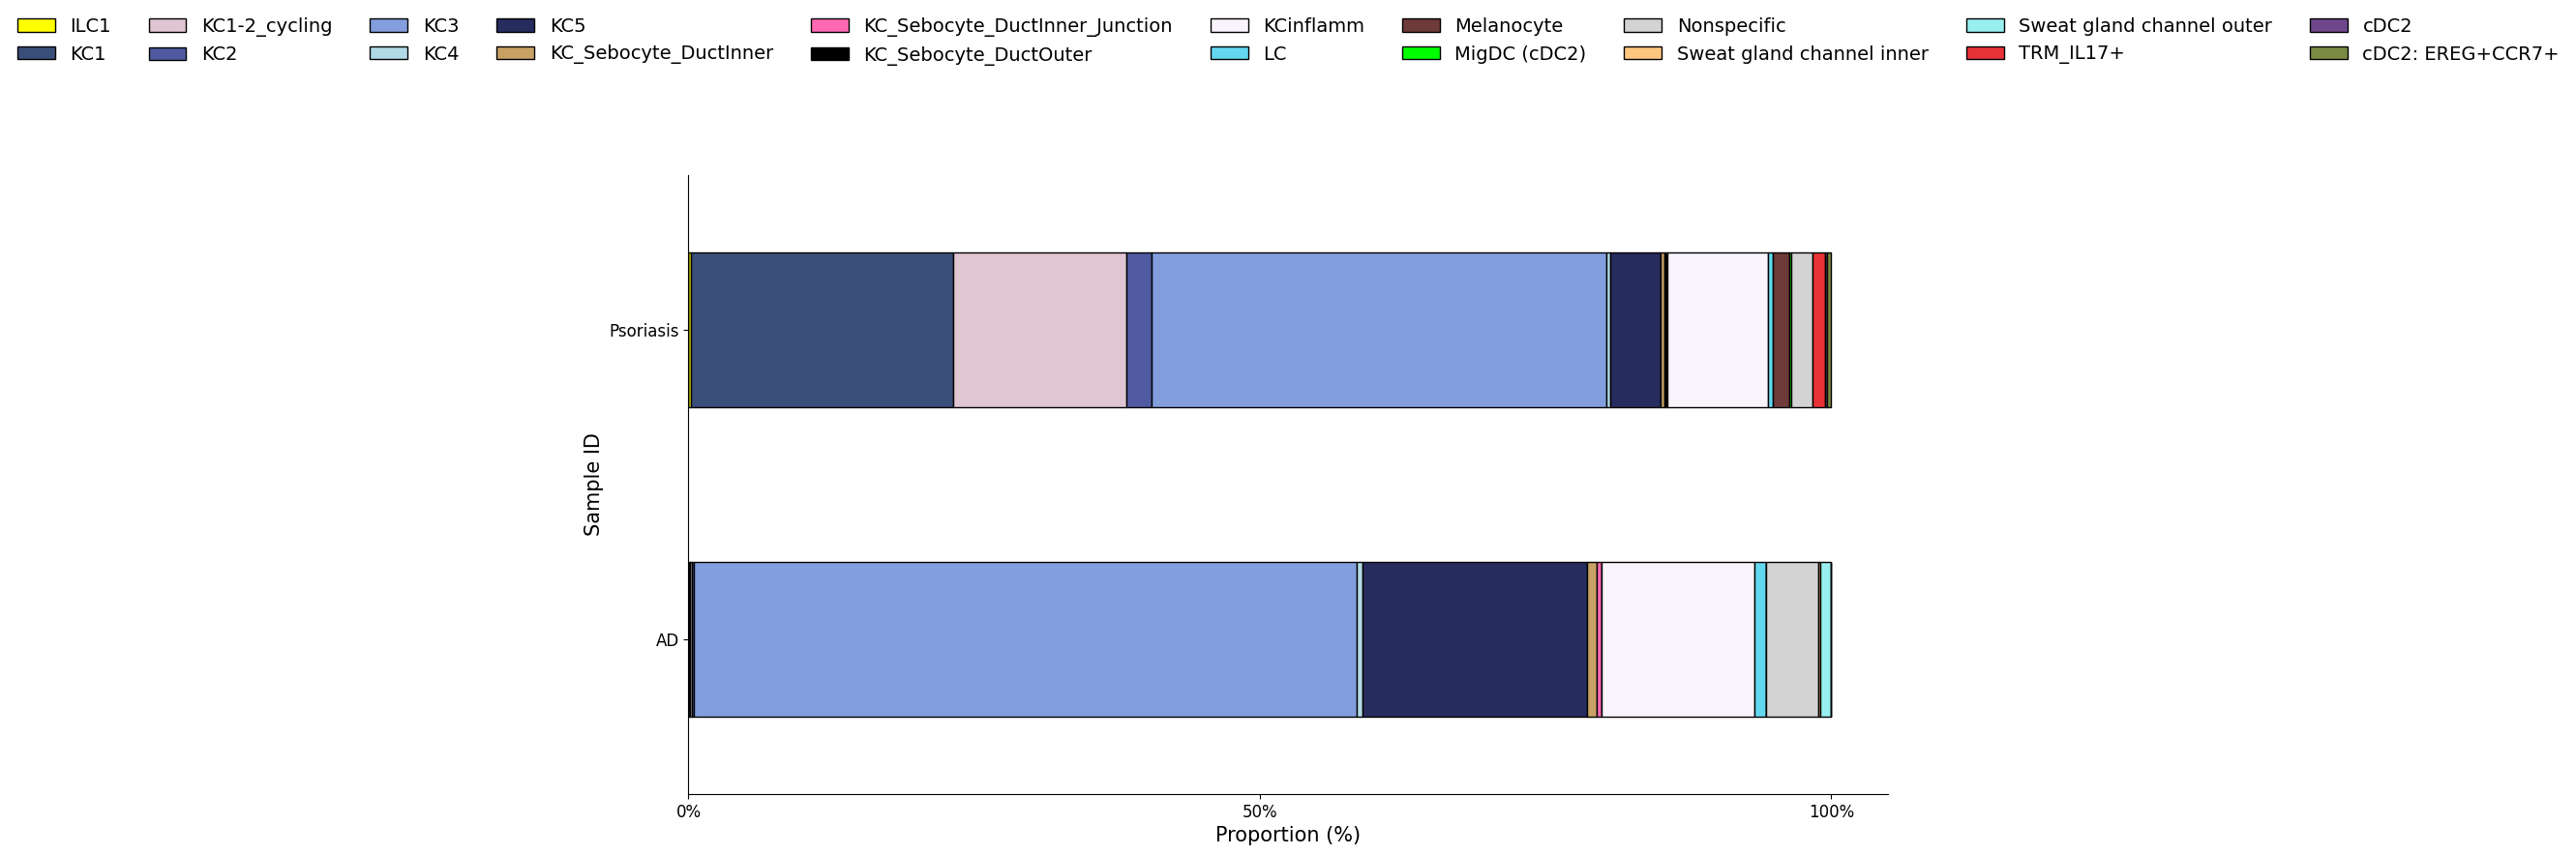

In [80]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import numpy as np  # Required for ceil()

# Constants
NICHE11 = "Epidermis_mid1"
MINIMUM_PERCENT = 0.1
COLOR_PICKLE_PATH = '/nfs/team298/ls34/color_for_adult_skin2.pkl'

#Filter the data
adata_filtered = adata_5k[adata_5k.obs["niche12"]=="Epidermis_mid2"]
sample_counts = adata_filtered.obs["info_id2"].value_counts()
valid_samples = sample_counts[sample_counts > 10].index
KEEP = ["Lesional"]
adata_filtered = adata_filtered[adata_filtered.obs["Site_status_binary"].isin(KEEP)]
adata_filtered = adata_filtered[adata_filtered.obs["info_id2"].isin(valid_samples)]

# Relevant columns
df = adata_filtered.obs[["info_id2", "lvl4_annotation", "disease_overall"]].copy()

# Count cell types per sample
grouped = df.groupby(["disease_overall", "lvl4_annotation"]).size().reset_index(name="cell_count")

# Pivot to counts matrix
pivot = grouped.pivot(index="disease_overall", columns="lvl4_annotation", values="cell_count").fillna(0)

# Normalize to percentages
proportions = pivot.div(pivot.sum(axis=1), axis=0) * 100

# Filter out rare cell types
mask = (proportions >= MINIMUM_PERCENT).any(axis=0)
proportions = proportions.loc[:, mask]

# Renormalize to sum to 100%
proportions = proportions.div(proportions.sum(axis=1), axis=0) * 100

# # Sort by disease group
# sample_diseases = df.drop_duplicates("info_id2").set_index("info_id2")["disease_overall"]
# disease_order = sample_diseases.loc[proportions.index].sort_values().index
# proportions = proportions.loc[disease_order]

# Load colors
with open(COLOR_PICKLE_PATH, 'rb') as f:
    colors = pickle.load(f)
plot_colors = [colors.get(cell_type, "grey") for cell_type in proportions.columns]

# Plot
fig, ax = plt.subplots(figsize=(16, 10))
plt.subplots_adjust(top=0.75)

proportions.plot(
    kind="barh",
    stacked=True,
    color=plot_colors,
    edgecolor="black",
    ax=ax
)

# Axis formatting
ax.set_xlabel("Proportion (%)", fontsize=15)
ax.set_ylabel("Sample ID", fontsize=15)
ax.set_title("", fontsize=1)
ax.set_yticks(range(len(proportions)))
ax.set_yticklabels(proportions.index, fontsize=12)
ax.set_xticks([0, 50, 100])
ax.set_xticklabels(["0%", "50%", "100%"], fontsize=12)

# Legend with 2 rows
ax.legend(
    title="",
    labels=proportions.columns,
    loc='lower center',
    bbox_to_anchor=(0.5, 1.15),
    ncol=int(np.ceil(len(proportions.columns) / 2)),
    fontsize=14,
    title_fontsize=10,
    frameon=False
)

# Clean look
ax.grid(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

In [ ]:
1

In [104]:
#adata_filtered = adata_5k_i[~adata_5k_i.obs["niche12"].str.startswith("Epidermis_APC")]
adata_filtered = adata_5k_i[adata_5k_i.obs["niche12"].str.startswith("Epidermis")]
adata_filtered.obs.niche12.value_counts()

niche12
Epidermis_basal           2168
Epidermis_mid2             719
Epidermis_mid1             668
Epidermis_late             332
Epidermis_APChi            201
Epidermis_basal_immune       3
Name: count, dtype: int64

In [83]:
import numpy as np

adata_filtered.obs["disease_overall"] = np.where(
    adata_filtered.obs["niche12"].str.startswith("Epidermis_APC"),
    "Epidermis_APC",
    adata_filtered.obs["disease_overall"]
)

/tmp/ipykernel_1987804/3055680009.py:3: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_filtered.obs["disease_overall"] = np.where(


/tmp/ipykernel_1987804/134311086.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(["disease_overall", "lvl4_annotation"]).size().reset_index(name="cell_count")


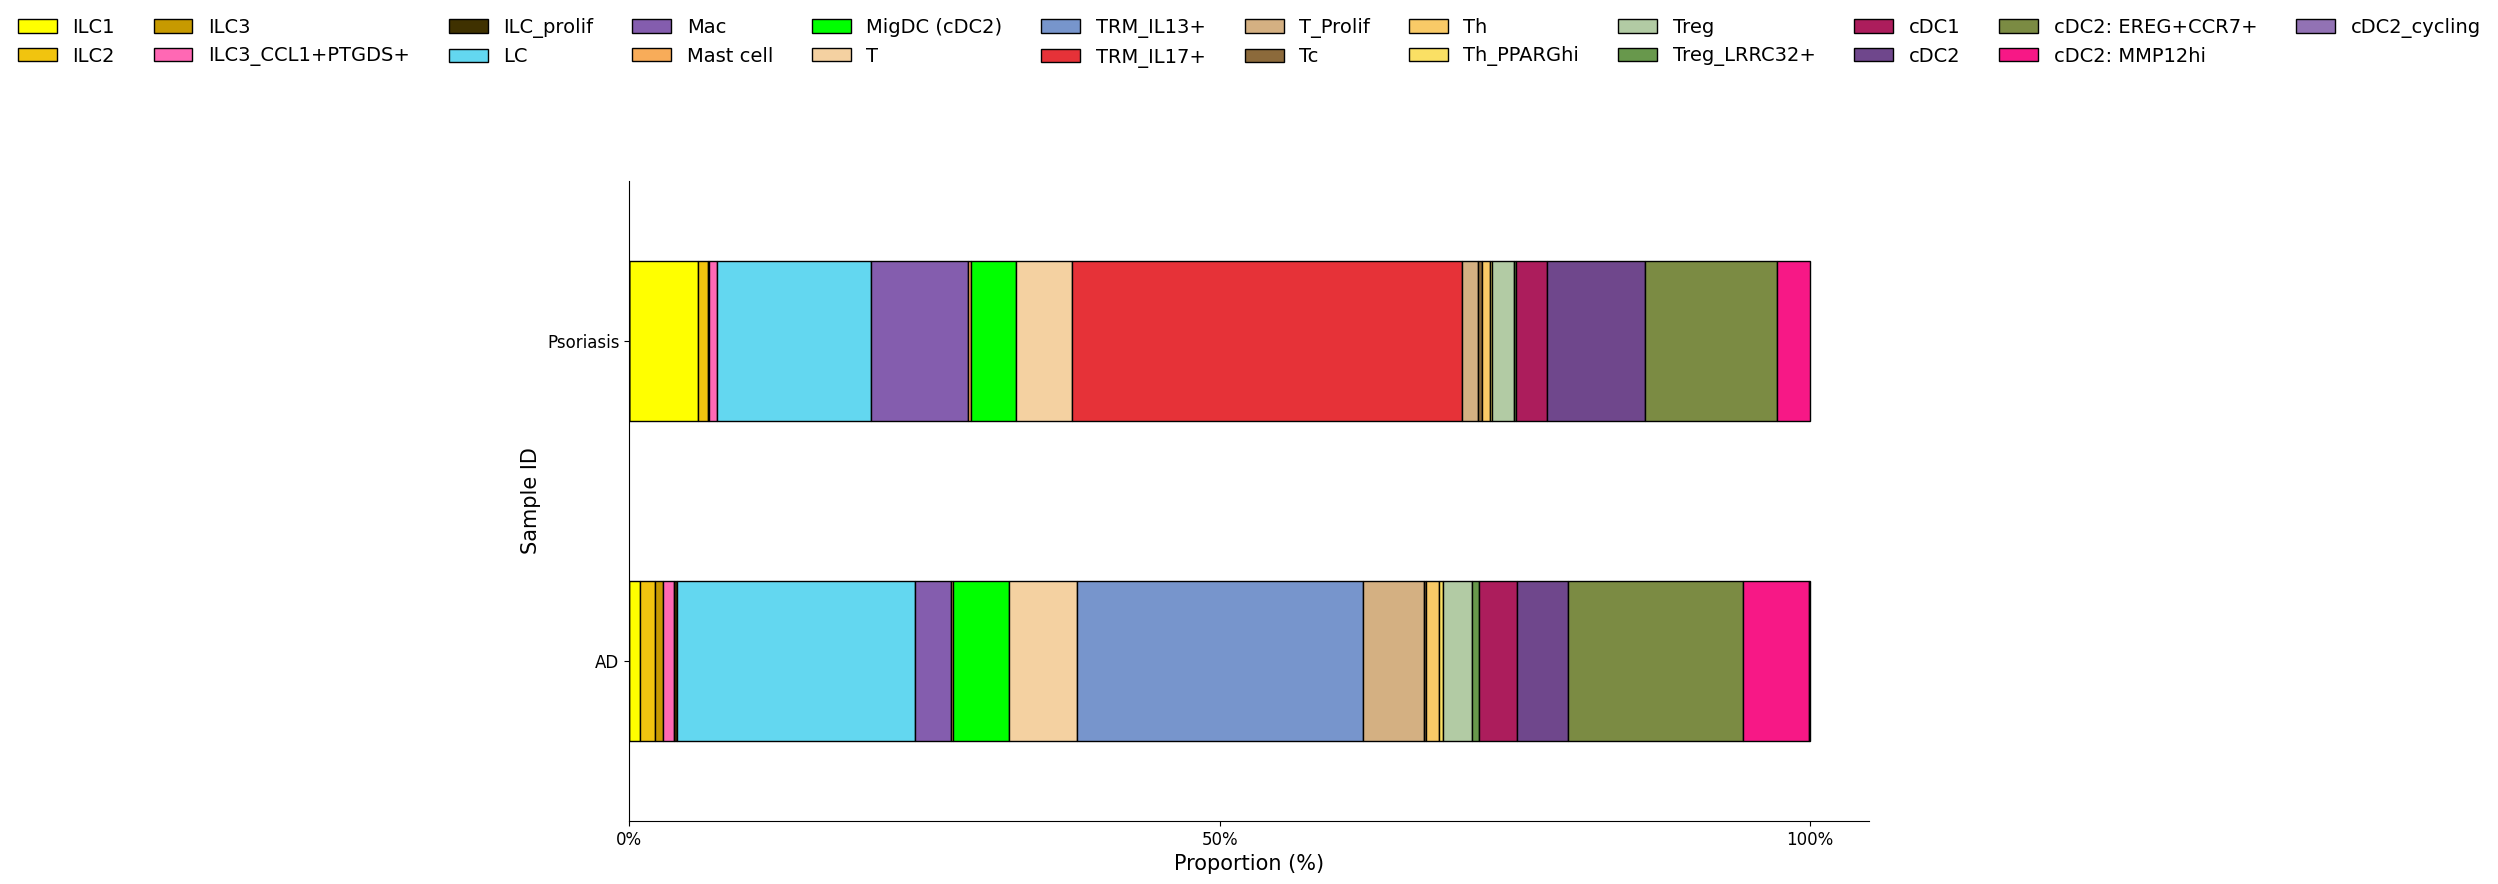

In [105]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import numpy as np  # Required for ceil()

MINIMUM_PERCENT = 0.1
COLOR_PICKLE_PATH = '/nfs/team298/ls34/color_for_adult_skin2.pkl'

# Filter the data
# adata_5k[
#     adata_5k.obs["niche12"].str.startswith(NICHE11)
# ]
sample_counts = adata_filtered.obs["info_id2"].value_counts()
valid_samples = sample_counts[sample_counts > 10].index
KEEP = ["Lesional"]
adata_filtered = adata_filtered[adata_filtered.obs["Site_status_binary"].isin(KEEP)]
adata_filtered = adata_filtered[adata_filtered.obs["info_id2"].isin(valid_samples)]

# Relevant columns
df = adata_filtered.obs[["info_id2", "lvl4_annotation", "disease_overall"]].copy()

# Count cell types per sample
grouped = df.groupby(["disease_overall", "lvl4_annotation"]).size().reset_index(name="cell_count")

# Pivot to counts matrix
pivot = grouped.pivot(index="disease_overall", columns="lvl4_annotation", values="cell_count").fillna(0)

# Normalize to percentages
proportions = pivot.div(pivot.sum(axis=1), axis=0) * 100

# Filter out rare cell types
mask = (proportions >= MINIMUM_PERCENT).any(axis=0)
proportions = proportions.loc[:, mask]

# Renormalize to sum to 100%
proportions = proportions.div(proportions.sum(axis=1), axis=0) * 100

# # Sort by disease group
# sample_diseases = df.drop_duplicates("info_id2").set_index("info_id2")["disease_overall"]
# disease_order = sample_diseases.loc[proportions.index].sort_values().index
# proportions = proportions.loc[disease_order]

# Load colors
with open(COLOR_PICKLE_PATH, 'rb') as f:
    colors = pickle.load(f)
plot_colors = [colors.get(cell_type, "grey") for cell_type in proportions.columns]

# Plot
fig, ax = plt.subplots(figsize=(16, 10))
plt.subplots_adjust(top=0.75)

proportions.plot(
    kind="barh",
    stacked=True,
    color=plot_colors,
    edgecolor="black",
    ax=ax
)

# Axis formatting
ax.set_xlabel("Proportion (%)", fontsize=15)
ax.set_ylabel("Sample ID", fontsize=15)
ax.set_title("", fontsize=1)
ax.set_yticks(range(len(proportions)))
ax.set_yticklabels(proportions.index, fontsize=12)
ax.set_xticks([0, 50, 100])
ax.set_xticklabels(["0%", "50%", "100%"], fontsize=12)

# Legend with 2 rows
ax.legend(
    title="",
    labels=proportions.columns,
    loc='lower center',
    bbox_to_anchor=(0.5, 1.15),
    ncol=int(np.ceil(len(proportions.columns) / 2)),
    fontsize=14,
    title_fontsize=10,
    frameon=False
)

# Clean look
ax.grid(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

/tmp/ipykernel_1987804/134311086.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(["disease_overall", "lvl4_annotation"]).size().reset_index(name="cell_count")


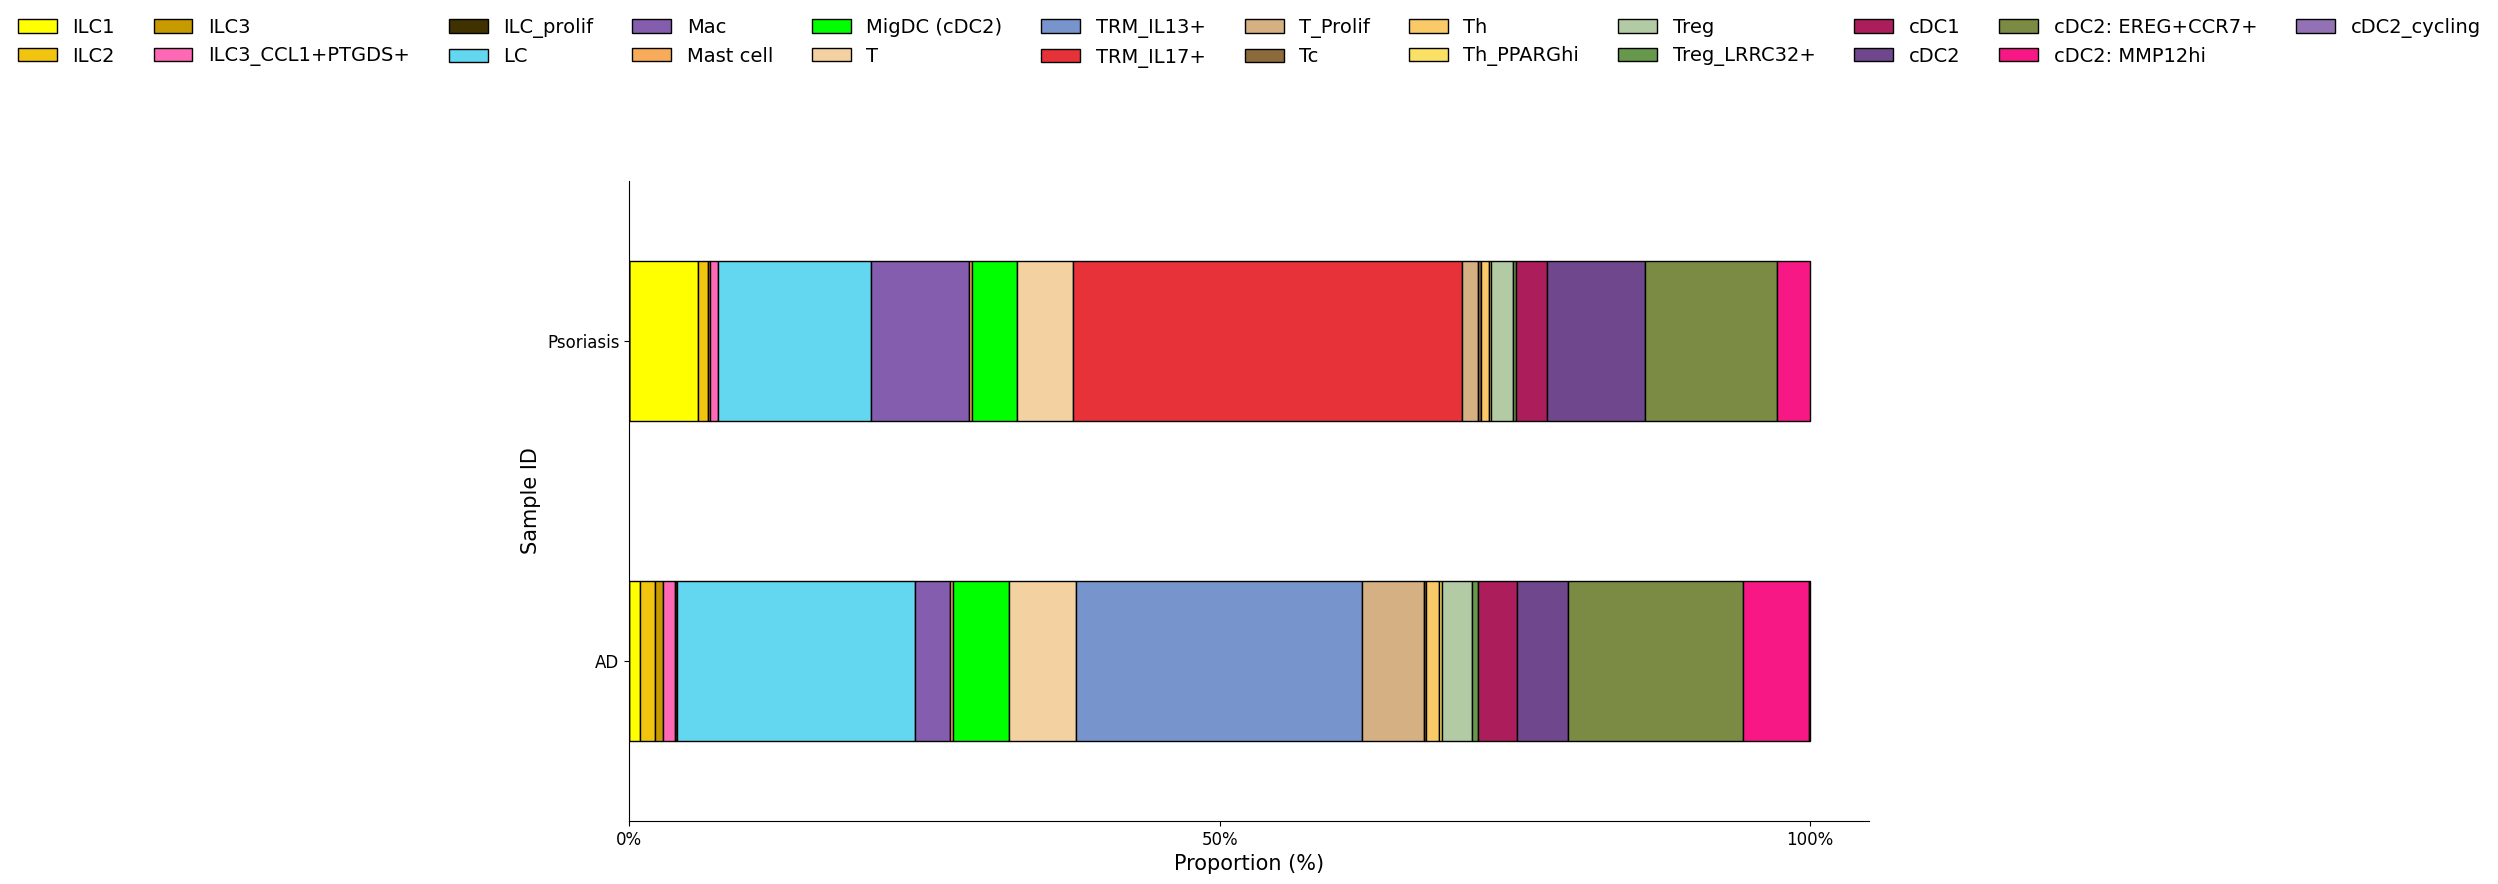

In [111]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import numpy as np  # Required for ceil()

MINIMUM_PERCENT = 0.1
COLOR_PICKLE_PATH = '/nfs/team298/ls34/color_for_adult_skin2.pkl'

# Filter the data
# adata_5k[
#     adata_5k.obs["niche12"].str.startswith(NICHE11)
# ]
sample_counts = adata_filtered.obs["info_id2"].value_counts()
valid_samples = sample_counts[sample_counts > 10].index
KEEP = ["Lesional"]
adata_filtered = adata_filtered[adata_filtered.obs["Site_status_binary"].isin(KEEP)]
adata_filtered = adata_filtered[adata_filtered.obs["info_id2"].isin(valid_samples)]

# Relevant columns
df = adata_filtered.obs[["info_id2", "lvl4_annotation", "disease_overall"]].copy()

# Count cell types per sample
grouped = df.groupby(["disease_overall", "lvl4_annotation"]).size().reset_index(name="cell_count")

# Pivot to counts matrix
pivot = grouped.pivot(index="disease_overall", columns="lvl4_annotation", values="cell_count").fillna(0)

# Normalize to percentages
proportions = pivot.div(pivot.sum(axis=1), axis=0) * 100

# Filter out rare cell types
mask = (proportions >= MINIMUM_PERCENT).any(axis=0)
proportions = proportions.loc[:, mask]

# Renormalize to sum to 100%
proportions = proportions.div(proportions.sum(axis=1), axis=0) * 100

# # Sort by disease group
# sample_diseases = df.drop_duplicates("info_id2").set_index("info_id2")["disease_overall"]
# disease_order = sample_diseases.loc[proportions.index].sort_values().index
# proportions = proportions.loc[disease_order]

# Load colors
with open(COLOR_PICKLE_PATH, 'rb') as f:
    colors = pickle.load(f)
plot_colors = [colors.get(cell_type, "grey") for cell_type in proportions.columns]

# Plot
fig, ax = plt.subplots(figsize=(16, 10))
plt.subplots_adjust(top=0.75)

proportions.plot(
    kind="barh",
    stacked=True,
    color=plot_colors,
    edgecolor="black",
    ax=ax
)

# Axis formatting
ax.set_xlabel("Proportion (%)", fontsize=15)
ax.set_ylabel("Sample ID", fontsize=15)
ax.set_title("", fontsize=1)
ax.set_yticks(range(len(proportions)))
ax.set_yticklabels(proportions.index, fontsize=12)
ax.set_xticks([0, 50, 100])
ax.set_xticklabels(["0%", "50%", "100%"], fontsize=12)

# Legend with 2 rows
ax.legend(
    title="",
    labels=proportions.columns,
    loc='lower center',
    bbox_to_anchor=(0.5, 1.15),
    ncol=int(np.ceil(len(proportions.columns) / 2)),
    fontsize=14,
    title_fontsize=10,
    frameon=False
)

# Clean look
ax.grid(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

In [110]:
adata_filtered.obs.niche12.value_counts()

niche12
Epidermis_basal    2168
Epidermis_mid2      719
Epidermis_mid1      668
Epidermis_late      332
Epidermis_APChi     201
Name: count, dtype: int64

/tmp/ipykernel_1987804/3948650651.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(["niche12", "lvl4_annotation"]).size().reset_index(name="cell_count")
/tmp/ipykernel_1987804/3948650651.py:96: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disease_groups = disease_labels.groupby(disease_labels).apply(lambda x: (x.index[0], x.index[-1]))


IndexError: index 0 is out of bounds for axis 0 with size 0

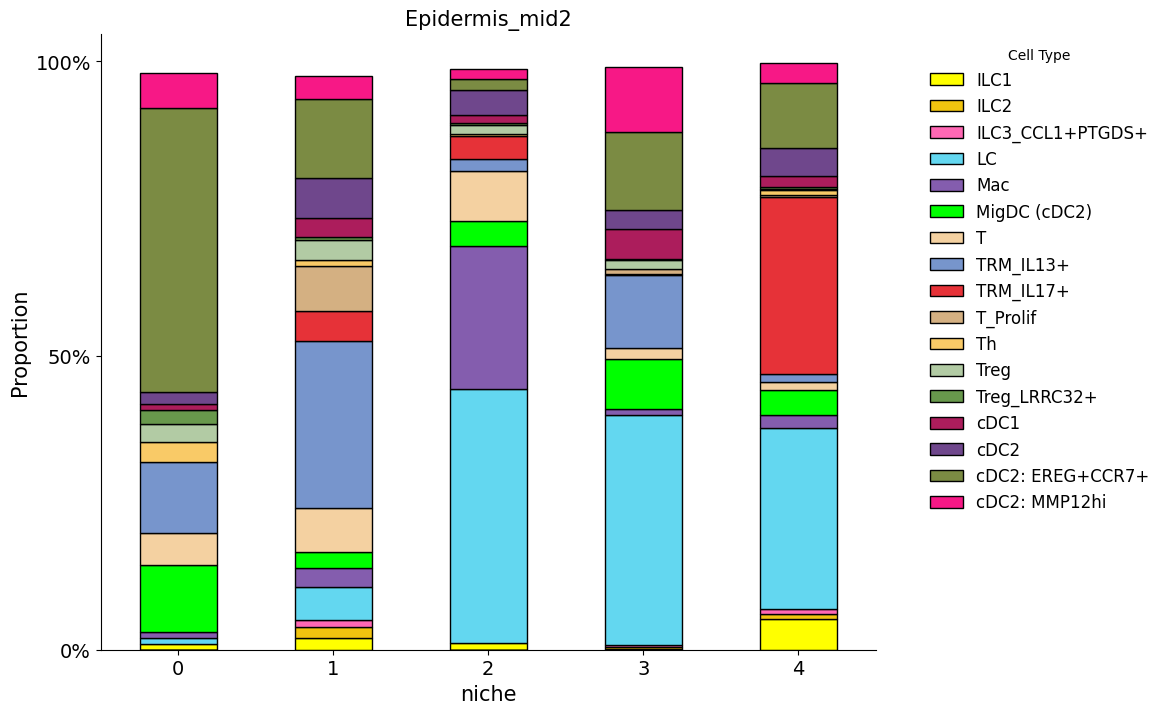

In [109]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

# Constants
NICHE11 = "Epidermis_mid2"  # Replace this with your filter string
MINIMUM_PERCENT = 1

# # Filter the data
# adata_filtered = adata_5k[
#     adata_5k.obs["niche12"].str.startswith(NICHE11)
# ]
sample_counts = adata_filtered.obs["niche12"].value_counts()
valid_samples = sample_counts[sample_counts > 10].index
adata_filtered = adata_filtered[adata_filtered.obs["niche12"].isin(valid_samples)]

KEEP = ["Lesional",]
adata_filtered=adata_filtered[adata_filtered.obs["Site_status_binary"].isin(KEEP)]

df = adata_filtered.obs[["niche12", "lvl4_annotation", "disease_overall"]].copy()

# Count cell types per sample
grouped = df.groupby(["niche12", "lvl4_annotation"]).size().reset_index(name="cell_count")

# Pivot to get counts matrix
pivot = grouped.pivot(index="niche12", columns="lvl4_annotation", values="cell_count").fillna(0)

# Normalize to get percentages
proportions = pivot.div(pivot.sum(axis=1), axis=0) * 100

# Filter out cell types with too small contribution
proportions = proportions.loc[:, (proportions >= MINIMUM_PERCENT).any(axis=0)]

# # Get disease_overall per sample so we can sort
# sample_diseases = df.drop_duplicates("niche12").set_index("niche12")["disease_overall"]

# # Sort samples: put one disease on left, the other on right
# disease_order = sample_diseases.sort_values().index
# proportions = proportions.loc[disease_order]

# Load colors
with open(COLOR_PICKLE_PATH, 'rb') as f:
    colors = pickle.load(f)

# Map colors to columns
plot_colors = [colors.get(cell_type, "grey") for cell_type in proportions.columns]

# Plot
fig, ax = plt.subplots(figsize=(10,8))
proportions.plot(
    kind="bar",
    stacked=True,
    color=plot_colors,
    edgecolor="black",
    ax=ax
)

# Annotate axes
ax.set_xlabel("niche", fontsize=15)
ax.set_ylabel("Proportion", fontsize=15)
ax.set_title(NICHE11, fontsize=15)
ax.set_xticks(range(len(proportions)))
#ax.set_xticklabels(proportions.index, rotation=90, fontsize=8)
ax.set_xticklabels(range(len(proportions)), rotation=0, fontsize=14)

# Y-axis
ax.set_yticks([0, 50, 100])
ax.set_yticklabels(["0%", "50%", "100%"], fontsize=14)

# Legend
ax.legend(
    title="Cell Type",
    labels=proportions.columns,
    bbox_to_anchor=(1.05, 1),
    loc="upper left",
    fontsize=12,
    title_fontsize=10,
    frameon=False
)

# Clean up
ax.grid(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)



# Add disease group annotations above the bars
import numpy as np

# Get the disease label per bar, in the correct order
disease_labels = sample_diseases.loc[proportions.index]

# Get where the disease groups start and end
disease_groups = disease_labels.groupby(disease_labels).apply(lambda x: (x.index[0], x.index[-1]))

# Determine y-position to draw lines above the bars (just above 100%)
y = 105

for disease, (start_sample, end_sample) in disease_groups.items():
    # Find x-axis positions of the first and last bar in this group
    x_start = proportions.index.get_loc(start_sample)
    x_end = proportions.index.get_loc(end_sample)

    # Draw a horizontal line over the group
    ax.hlines(y, x_start - 0.4, x_end + 0.4, color='black', linewidth=1.5)
    
    # Put the disease label above the line
    ax.text((x_start + x_end) / 2, y + 2, disease, ha='center', va='bottom', fontsize=12, fontweight='bold')

# Extend the y-axis limit so annotations don't get clipped
ax.set_ylim(0, y + 15)


plt.tight_layout()
plt.show()


In [ ]:
2

In [102]:
0

0

In [98]:
0

0

In [99]:
22

22

In [95]:
adata_5k.obs["niche12"]=adata_5k.obs["niche12"].astype(str).fillna("missing")

In [112]:
#adata_filtered = adata_5k_i[~adata_5k_i.obs["niche12"].str.startswith("Epidermis_APC")]
adata_filtered = adata_5k[adata_5k.obs["niche12"].str.startswith("Epidermis")]
adata_filtered=adata_filtered[adata_filtered.obs["lvl4_annotation"]!="Nonspecific"]
adata_filtered.obs.niche12.value_counts()


# adata_filtered.obs["disease_overall"] = np.where(
#     adata_filtered.obs["niche12"].str.startswith("Epidermis_APC"),
#     "Epidermis_APC",
#     adata_filtered.obs["disease_overall"]
# )

niche12
Epidermis_basal           35379
Epidermis_mid2            31800
Epidermis_mid1            17075
Epidermis_late             7701
Epidermis_APChi             395
Epidermis_basal_immune        4
Name: count, dtype: int64

/tmp/ipykernel_1987804/1860146939.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(["disease_overall", "lvl4_annotation"]).size().reset_index(name="cell_count")


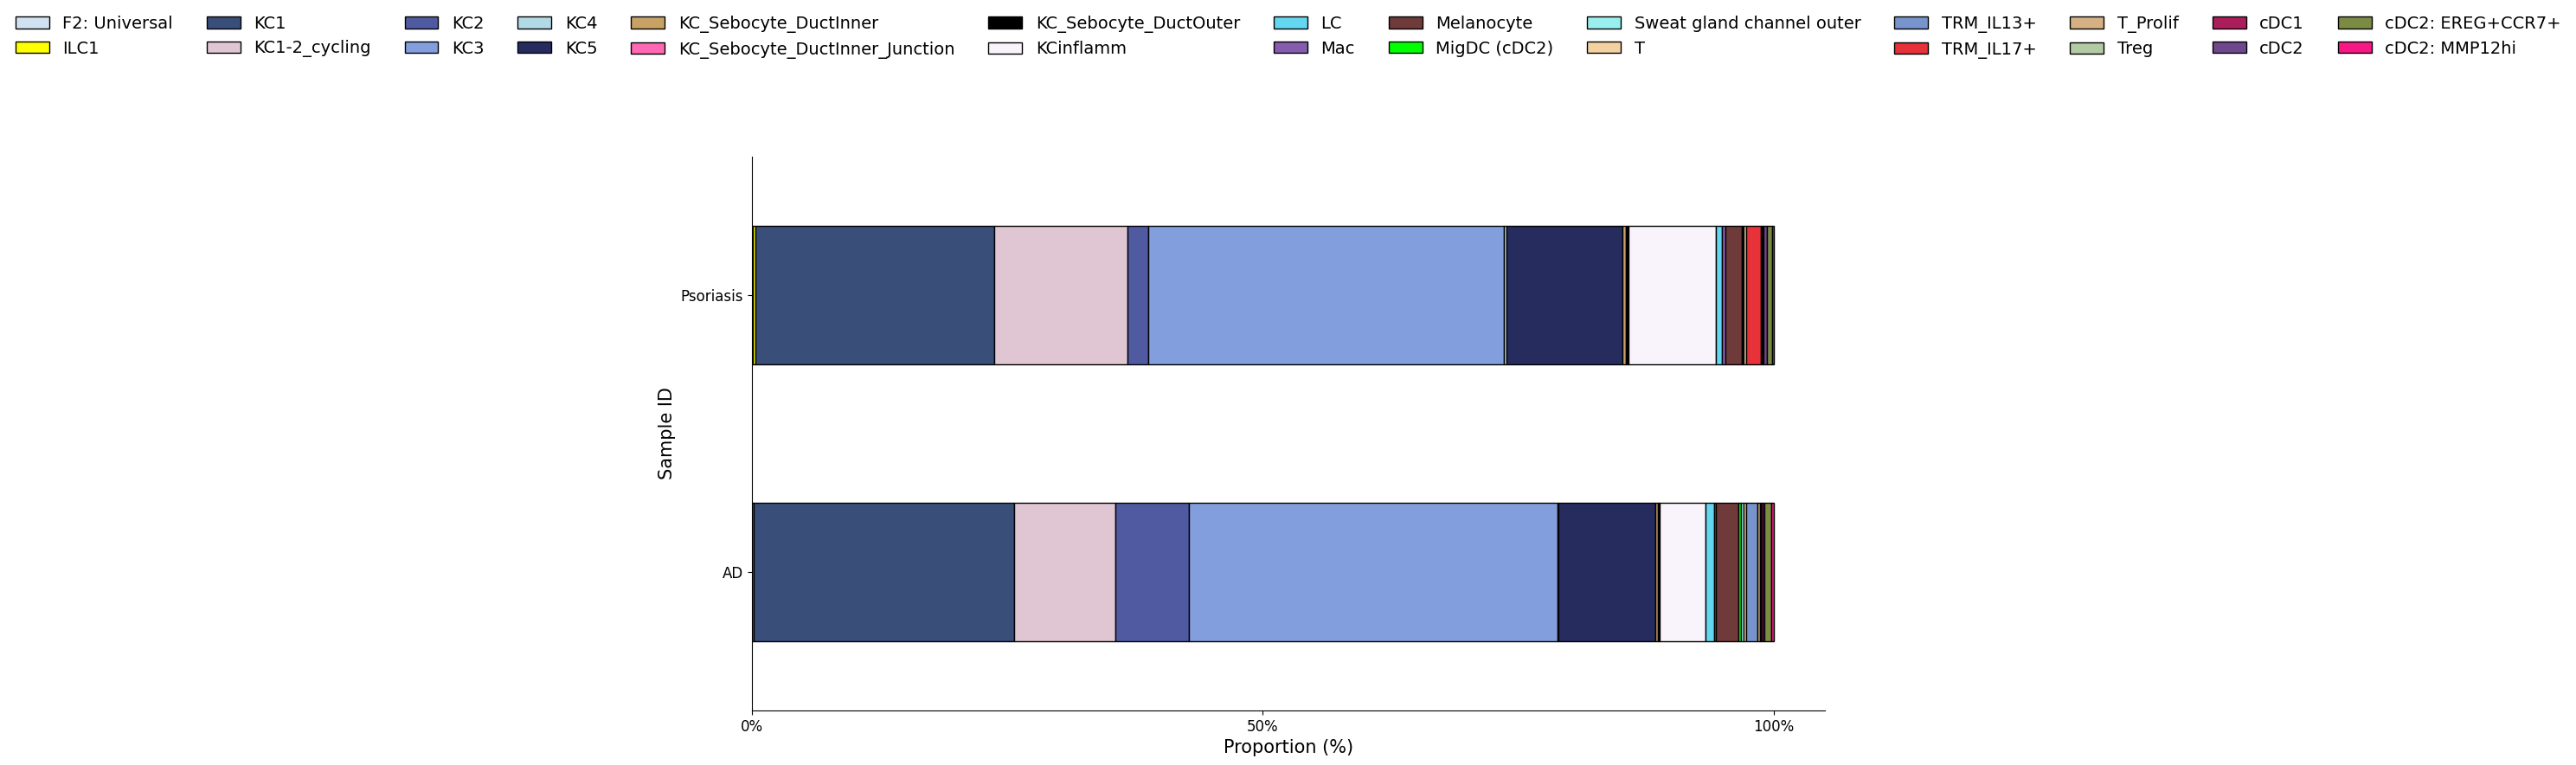

In [113]:
MINIMUM_PERCENT = 0.1
COLOR_PICKLE_PATH = '/nfs/team298/ls34/color_for_adult_skin2.pkl'

# Filter the data
# adata_5k[
#     adata_5k.obs["niche12"].str.startswith(NICHE11)
# ]
sample_counts = adata_filtered.obs["info_id2"].value_counts()
valid_samples = sample_counts[sample_counts > 10].index
KEEP = ["Lesional"]
adata_filtered = adata_filtered[adata_filtered.obs["Site_status_binary"].isin(KEEP)]
adata_filtered = adata_filtered[adata_filtered.obs["info_id2"].isin(valid_samples)]

# Relevant columns
df = adata_filtered.obs[["info_id2", "lvl4_annotation", "disease_overall"]].copy()

# Count cell types per sample
grouped = df.groupby(["disease_overall", "lvl4_annotation"]).size().reset_index(name="cell_count")

# Pivot to counts matrix
pivot = grouped.pivot(index="disease_overall", columns="lvl4_annotation", values="cell_count").fillna(0)

# Normalize to percentages
proportions = pivot.div(pivot.sum(axis=1), axis=0) * 100

# Filter out rare cell types
mask = (proportions >= MINIMUM_PERCENT).any(axis=0)
proportions = proportions.loc[:, mask]

# Renormalize to sum to 100%
proportions = proportions.div(proportions.sum(axis=1), axis=0) * 100


with open(COLOR_PICKLE_PATH, 'rb') as f:
    colors = pickle.load(f)
plot_colors = [colors.get(cell_type, "grey") for cell_type in proportions.columns]

# Plot
fig, ax = plt.subplots(figsize=(16, 10))
plt.subplots_adjust(top=0.75)

proportions.plot(
    kind="barh",
    stacked=True,
    color=plot_colors,
    edgecolor="black",
    ax=ax
)

# Axis formatting
ax.set_xlabel("Proportion (%)", fontsize=15)
ax.set_ylabel("Sample ID", fontsize=15)
ax.set_title("", fontsize=1)
ax.set_yticks(range(len(proportions)))
ax.set_yticklabels(proportions.index, fontsize=12)
ax.set_xticks([0, 50, 100])
ax.set_xticklabels(["0%", "50%", "100%"], fontsize=12)

# Legend with 2 rows
ax.legend(
    title="",
    labels=proportions.columns,
    loc='lower center',
    bbox_to_anchor=(0.5, 1.15),
    ncol=int(np.ceil(len(proportions.columns) / 2)),
    fontsize=14,
    title_fontsize=10,
    frameon=False
)

# Clean look
ax.grid(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

In [117]:
1

1

/tmp/ipykernel_1987804/3528665524.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(["disease_overall", "niche12"]).size().reset_index(name="cell_count")


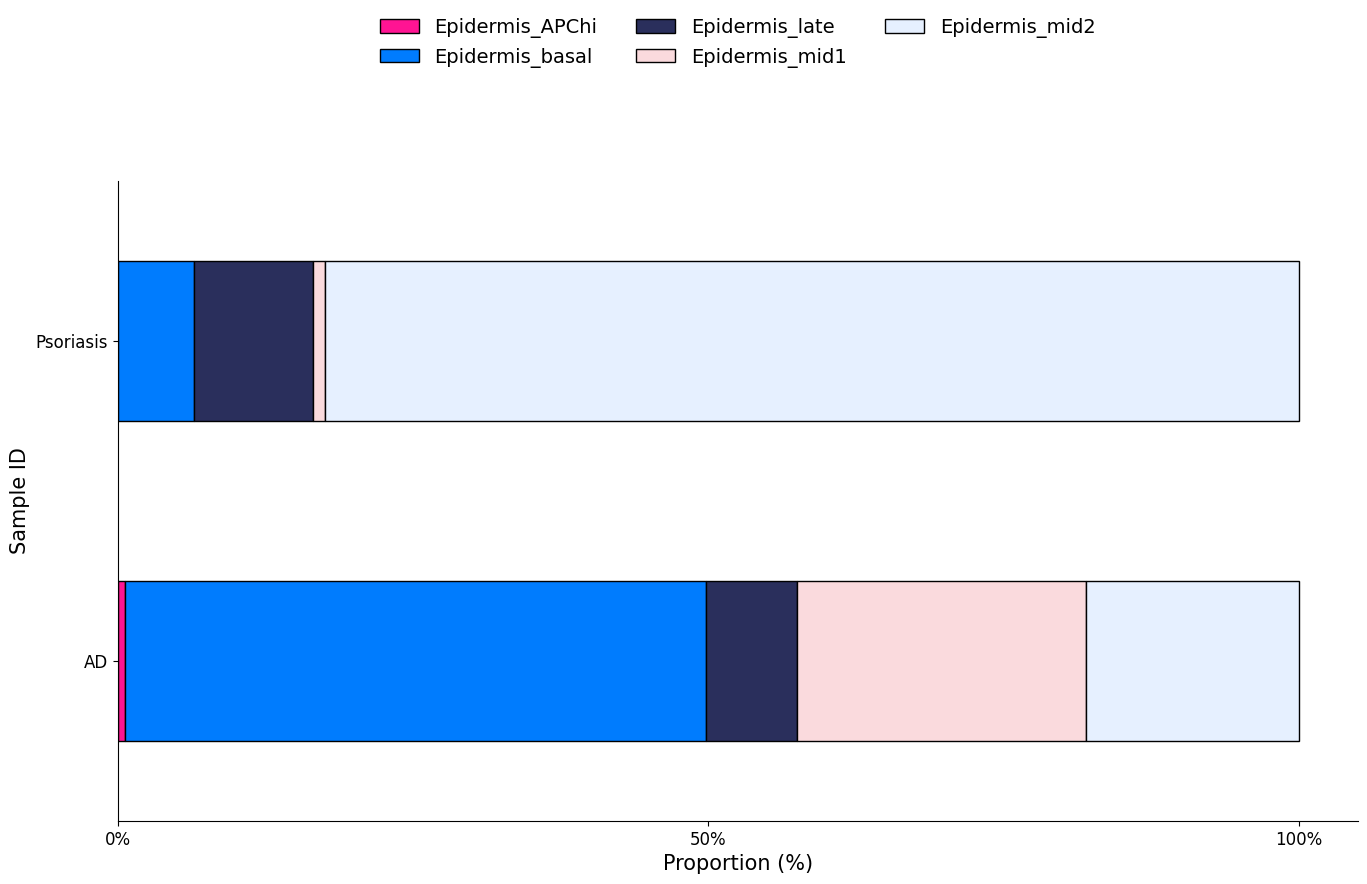

In [118]:
MINIMUM_PERCENT = 0.1

# Filter the data
# adata_5k[
#     adata_5k.obs["niche12"].str.startswith(NICHE11)
# ]
sample_counts = adata_filtered.obs["info_id2"].value_counts()
valid_samples = sample_counts[sample_counts > 10].index
KEEP = ["Lesional"]
adata_filtered = adata_filtered[adata_filtered.obs["Site_status_binary"].isin(KEEP)]
adata_filtered = adata_filtered[adata_filtered.obs["info_id2"].isin(valid_samples)]

# Relevant columns
df = adata_filtered.obs[["info_id2", "niche12", "disease_overall"]].copy()

# Count cell types per sample
grouped = df.groupby(["disease_overall", "niche12"]).size().reset_index(name="cell_count")

# Pivot to counts matrix
pivot = grouped.pivot(index="disease_overall", columns="niche12", values="cell_count").fillna(0)

# Normalize to percentages
proportions = pivot.div(pivot.sum(axis=1), axis=0) * 100

# Filter out rare cell types
mask = (proportions >= MINIMUM_PERCENT).any(axis=0)
proportions = proportions.loc[:, mask]

# Renormalize to sum to 100%
proportions = proportions.div(proportions.sum(axis=1), axis=0) * 100


with open('/nfs/team298/ls34/color_for_adult_skin_XENIUMniches.pkl', 'rb') as f:
    colors = pickle.load(f)
plot_colors = [colors.get(cell_type, "grey") for cell_type in proportions.columns]


# Plot

fig, ax = plt.subplots(figsize=(16, 10))
plt.subplots_adjust(top=0.75)

proportions.plot(
    kind="barh",
    stacked=True,
    color=plot_colors,
    edgecolor="black",
    ax=ax
)

# Axis formatting
ax.set_xlabel("Proportion (%)", fontsize=15)
ax.set_ylabel("Sample ID", fontsize=15)
ax.set_title("", fontsize=1)
ax.set_yticks(range(len(proportions)))
ax.set_yticklabels(proportions.index, fontsize=12)
ax.set_xticks([0, 50, 100])
ax.set_xticklabels(["0%", "50%", "100%"], fontsize=12)

# Legend with 2 rows
ax.legend(
    title="",
    labels=proportions.columns,
    loc='lower center',
    bbox_to_anchor=(0.5, 1.15),
    ncol=int(np.ceil(len(proportions.columns) / 2)),
    fontsize=14,
    title_fontsize=10,
    frameon=False
)

# Clean look
ax.grid(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()



/tmp/ipykernel_1987804/1860146939.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(["disease_overall", "lvl4_annotation"]).size().reset_index(name="cell_count")


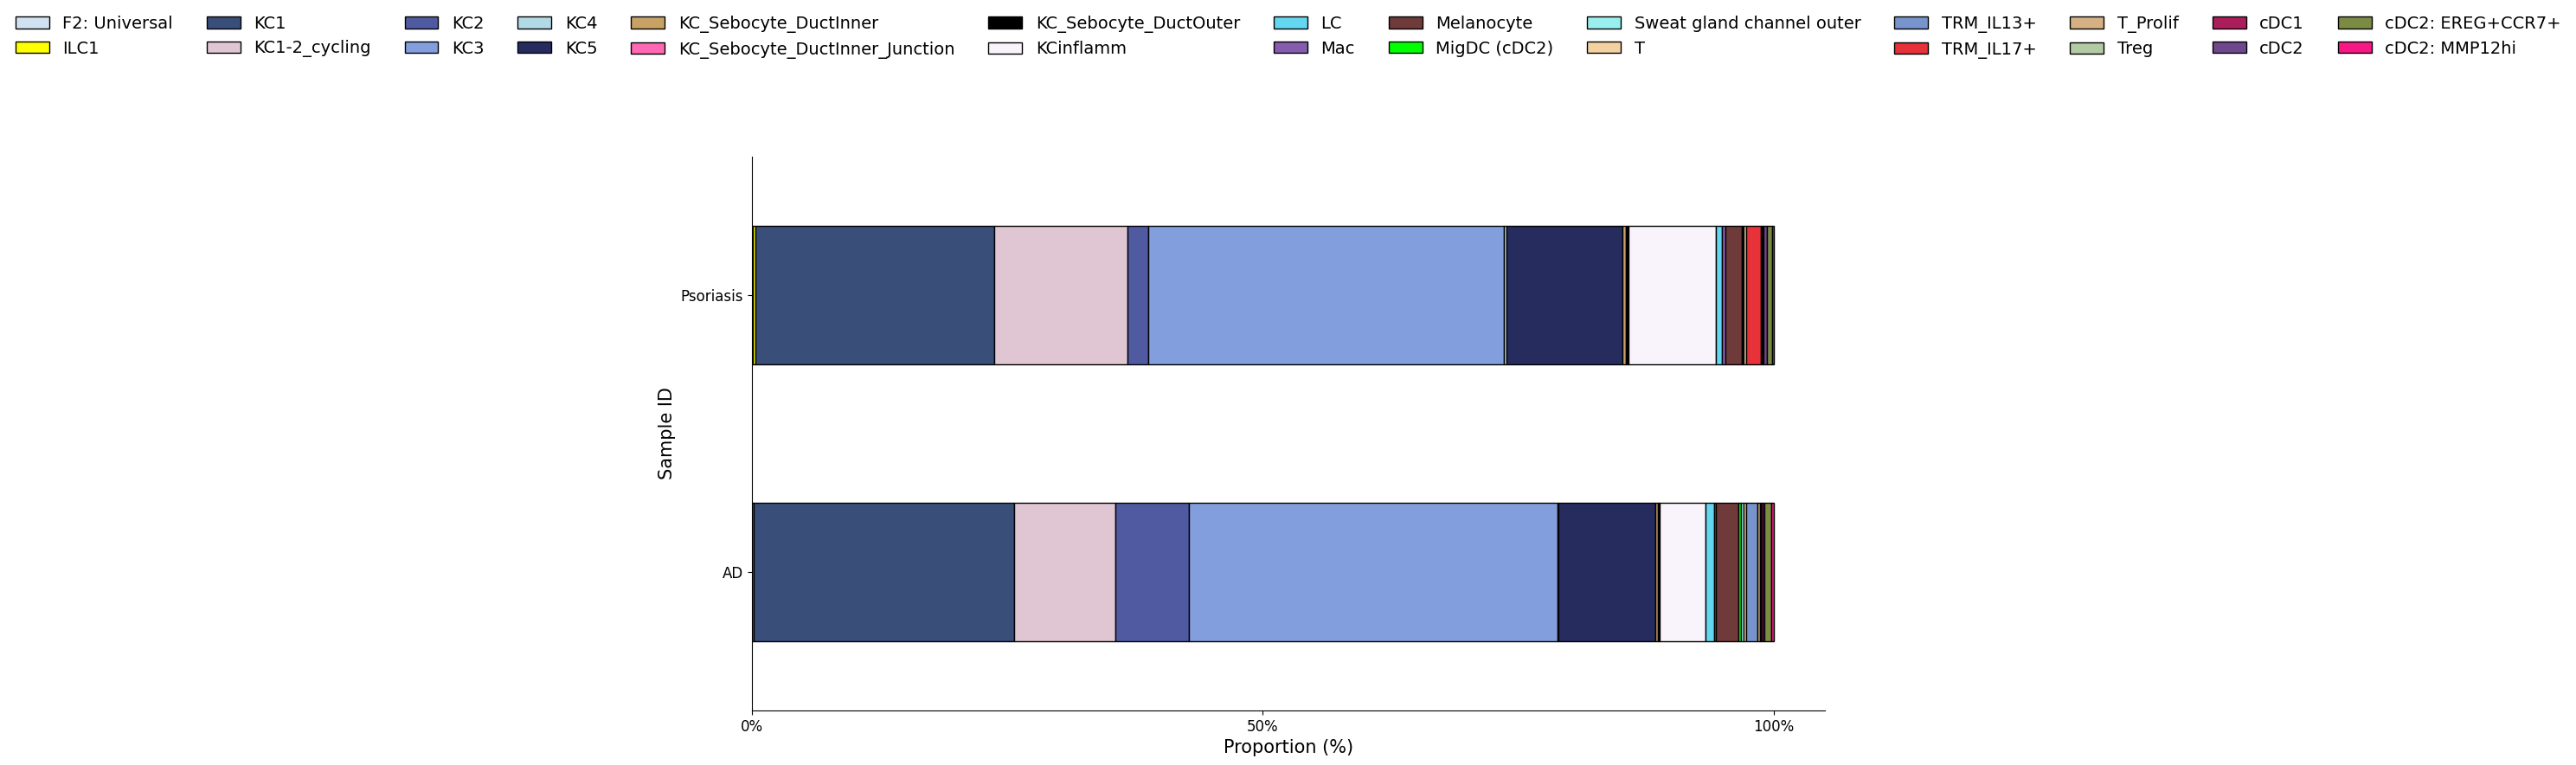

In [115]:
MINIMUM_PERCENT = 0.1
COLOR_PICKLE_PATH = '/nfs/team298/ls34/color_for_adult_skin2.pkl'

# Filter the data
# adata_5k[
#     adata_5k.obs["niche12"].str.startswith(NICHE11)
# ]
sample_counts = adata_filtered.obs["info_id2"].value_counts()
valid_samples = sample_counts[sample_counts > 10].index
KEEP = ["Lesional"]
adata_filtered = adata_filtered[adata_filtered.obs["Site_status_binary"].isin(KEEP)]
adata_filtered = adata_filtered[adata_filtered.obs["info_id2"].isin(valid_samples)]

# Relevant columns
df = adata_filtered.obs[["info_id2", "lvl4_annotation", "disease_overall"]].copy()

# Count cell types per sample
grouped = df.groupby(["disease_overall", "lvl4_annotation"]).size().reset_index(name="cell_count")

# Pivot to counts matrix
pivot = grouped.pivot(index="disease_overall", columns="lvl4_annotation", values="cell_count").fillna(0)

# Normalize to percentages
proportions = pivot.div(pivot.sum(axis=1), axis=0) * 100

# Filter out rare cell types
mask = (proportions >= MINIMUM_PERCENT).any(axis=0)
proportions = proportions.loc[:, mask]

# Renormalize to sum to 100%
proportions = proportions.div(proportions.sum(axis=1), axis=0) * 100


with open(COLOR_PICKLE_PATH, 'rb') as f:
    colors = pickle.load(f)
plot_colors = [colors.get(cell_type, "grey") for cell_type in proportions.columns]

# Plot
fig, ax = plt.subplots(figsize=(16, 10))
plt.subplots_adjust(top=0.75)

proportions.plot(
    kind="barh",
    stacked=True,
    color=plot_colors,
    edgecolor="black",
    ax=ax
)

# Axis formatting
ax.set_xlabel("Proportion (%)", fontsize=15)
ax.set_ylabel("Sample ID", fontsize=15)
ax.set_title("", fontsize=1)
ax.set_yticks(range(len(proportions)))
ax.set_yticklabels(proportions.index, fontsize=12)
ax.set_xticks([0, 50, 100])
ax.set_xticklabels(["0%", "50%", "100%"], fontsize=12)

# Legend with 2 rows
ax.legend(
    title="",
    labels=proportions.columns,
    loc='lower center',
    bbox_to_anchor=(0.5, 1.15),
    ncol=int(np.ceil(len(proportions.columns) / 2)),
    fontsize=14,
    title_fontsize=10,
    frameon=False
)

# Clean look
ax.grid(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

/tmp/ipykernel_1987804/4146542538.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped1 = df1.groupby(["disease_overall", "niche12"]).size().reset_index(name="cell_count")
/tmp/ipykernel_1987804/4146542538.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped2 = df2.groupby(["disease_overall", "lvl4_annotation"]).size().reset_index(name="cell_count")


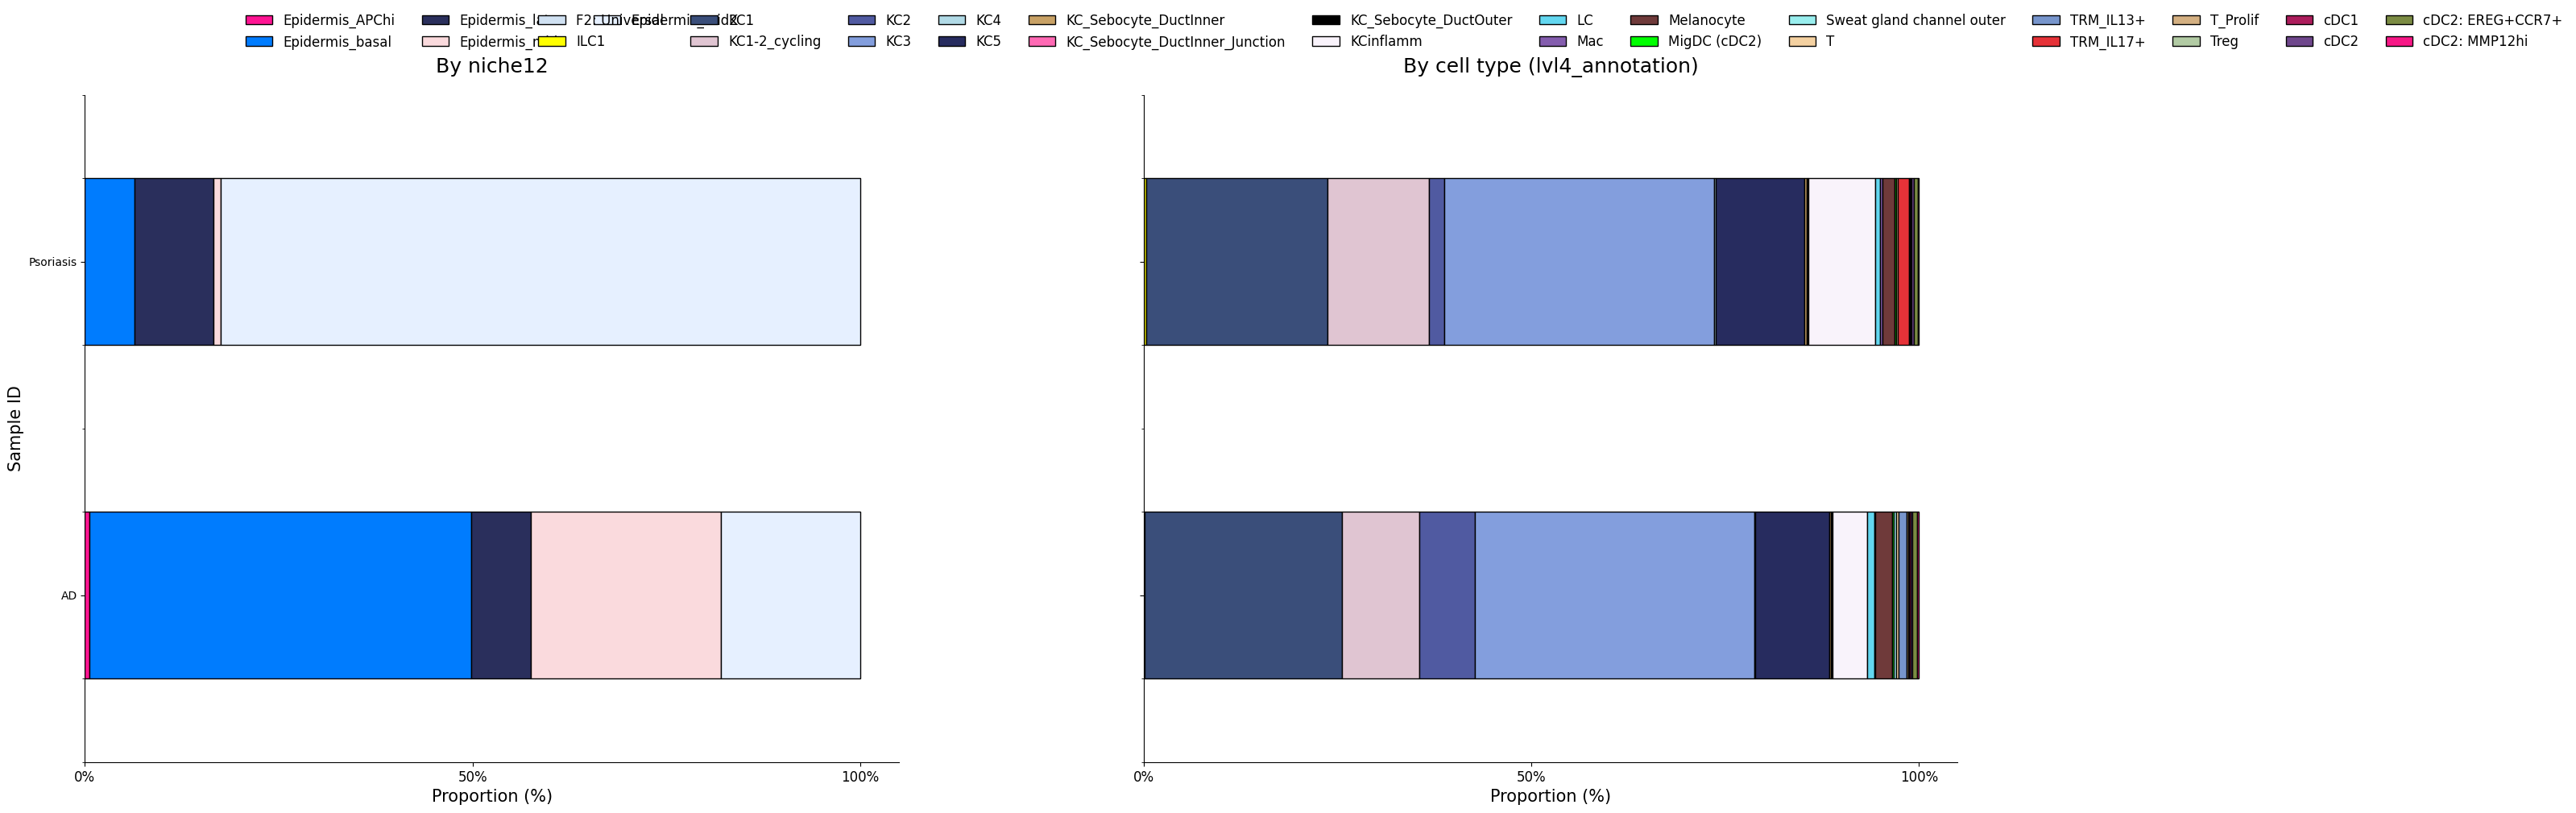

In [162]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

MINIMUM_PERCENT = 0.1

# ---------- First dataset: niche12 ----------
df1 = adata_filtered.obs[["info_id2", "niche12", "disease_overall"]].copy()
grouped1 = df1.groupby(["disease_overall", "niche12"]).size().reset_index(name="cell_count")
pivot1 = grouped1.pivot(index="disease_overall", columns="niche12", values="cell_count").fillna(0)

proportions1 = pivot1.div(pivot1.sum(axis=1), axis=0) * 100
mask1 = (proportions1 >= MINIMUM_PERCENT).any(axis=0)
proportions1 = proportions1.loc[:, mask1]
proportions1 = proportions1.div(proportions1.sum(axis=1), axis=0) * 100

with open('/nfs/team298/ls34/color_for_adult_skin_XENIUMniches.pkl', 'rb') as f:
    colors1 = pickle.load(f)
plot_colors1 = [colors1.get(cell_type, "grey") for cell_type in proportions1.columns]


# ---------- Second dataset: lvl4_annotation ----------
df2 = adata_filtered.obs[["info_id2", "lvl4_annotation", "disease_overall"]].copy()
grouped2 = df2.groupby(["disease_overall", "lvl4_annotation"]).size().reset_index(name="cell_count")
pivot2 = grouped2.pivot(index="disease_overall", columns="lvl4_annotation", values="cell_count").fillna(0)

proportions2 = pivot2.div(pivot2.sum(axis=1), axis=0) * 100
mask2 = (proportions2 >= MINIMUM_PERCENT).any(axis=0)
proportions2 = proportions2.loc[:, mask2]
proportions2 = proportions2.div(proportions2.sum(axis=1), axis=0) * 100

with open('/nfs/team298/ls34/color_for_adult_skin2.pkl', 'rb') as f:
    colors2 = pickle.load(f)
plot_colors2 = [colors2.get(cell_type, "grey") for cell_type in proportions2.columns]


# ---------- Plot side by side ----------
fig, axes = plt.subplots(1, 2, figsize=(30, 12), sharey=True)
plt.subplots_adjust(top=0.8, wspace=0.3)

# left: niche12
proportions1.plot(
    kind="barh",
    stacked=True,
    color=plot_colors1,
    edgecolor="black",
    ax=axes[0]
)

axes[0].set_xlabel("Proportion (%)", fontsize=15)
axes[0].set_ylabel("Sample ID", fontsize=15)
axes[0].set_title("By niche12", fontsize=18, pad=20)
axes[0].set_xticks([0, 50, 100])
axes[0].set_xticklabels(["0%", "50%", "100%"], fontsize=12)
axes[0].grid(False)
axes[0].spines["top"].set_visible(False)
axes[0].spines["right"].set_visible(False)

axes[0].legend(
    title="",
    labels=proportions1.columns,
    loc='lower center',
    bbox_to_anchor=(0.5, 1.05),
    ncol=int(np.ceil(len(proportions1.columns) / 2)),
    fontsize=12,
    frameon=False
)

# right: lvl4_annotation
proportions2.plot(
    kind="barh",
    stacked=True,
    color=plot_colors2,
    edgecolor="black",
    ax=axes[1]
)

axes[1].set_xlabel("Proportion (%)", fontsize=15)
axes[1].set_ylabel("")  # don’t duplicate y-label
axes[1].set_title("By cell type (lvl4_annotation)", fontsize=18, pad=20)
axes[1].set_xticks([0, 50, 100])
axes[1].set_xticklabels(["0%", "50%", "100%"], fontsize=12)
axes[1].grid(False)
axes[1].spines["top"].set_visible(False)
axes[1].spines["right"].set_visible(False)

axes[1].legend(
    title="",
    labels=proportions2.columns,
    loc='lower center',
    bbox_to_anchor=(0.5, 1.05),
    ncol=int(np.ceil(len(proportions2.columns) / 2)),
    fontsize=12,
    frameon=False
)

plt.show()

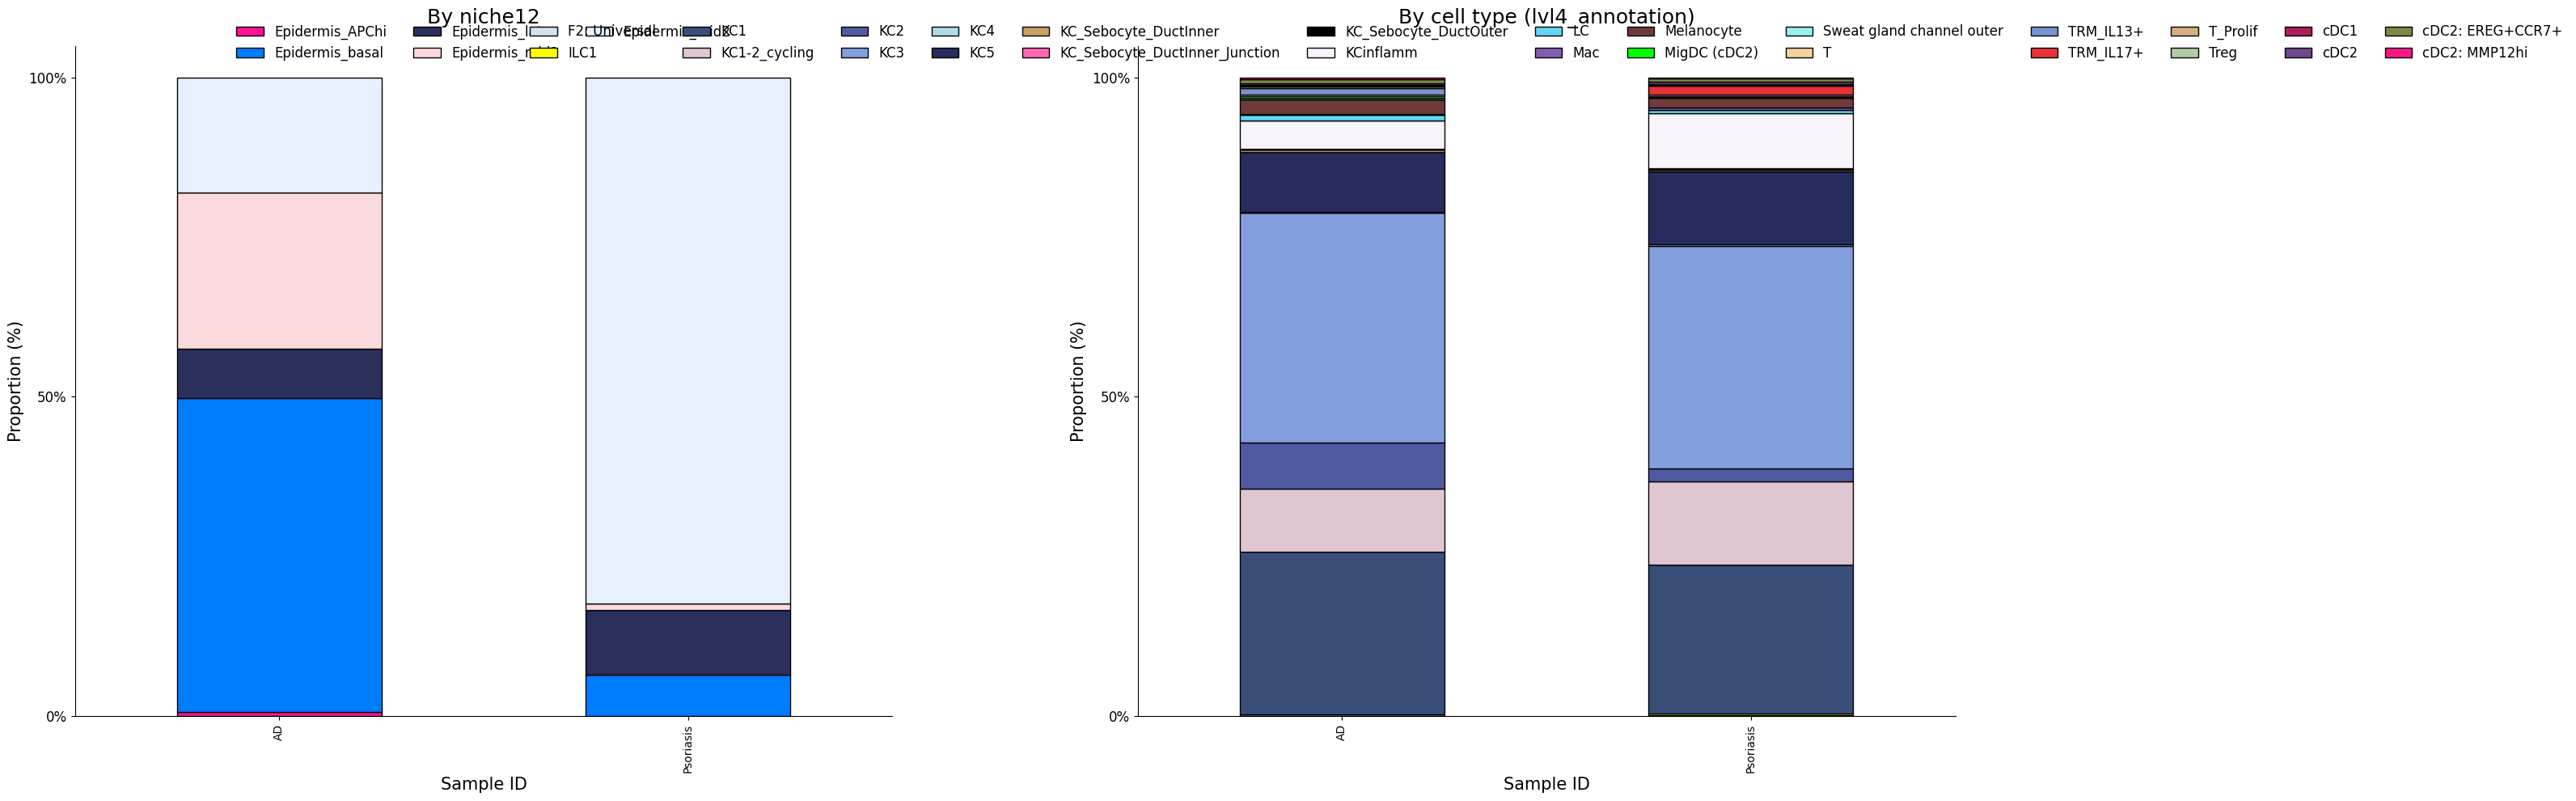

In [163]:
# ---------- Plot side by side, vertical bars ----------
fig, axes = plt.subplots(1, 2, figsize=(30, 12), sharey=False)
plt.subplots_adjust(top=0.8, wspace=0.3)

# left: niche12
proportions1.plot(
    kind="bar",           # vertical bars
    stacked=True,
    color=plot_colors1,
    edgecolor="black",
    ax=axes[0]
)

axes[0].set_ylabel("Proportion (%)", fontsize=15)
axes[0].set_xlabel("Sample ID", fontsize=15)
axes[0].set_title("By niche12", fontsize=18, pad=20)
axes[0].set_yticks([0, 50, 100])
axes[0].set_yticklabels(["0%", "50%", "100%"], fontsize=12)
axes[0].grid(False)
axes[0].spines["top"].set_visible(False)
axes[0].spines["right"].set_visible(False)

axes[0].legend(
    title="",
    labels=proportions1.columns,
    loc='upper center',
    bbox_to_anchor=(0.5, 1.05),
    ncol=int(np.ceil(len(proportions1.columns) / 2)),
    fontsize=12,
    frameon=False
)

# right: lvl4_annotation
proportions2.plot(
    kind="bar",           # vertical bars
    stacked=True,
    color=plot_colors2,
    edgecolor="black",
    ax=axes[1]
)

axes[1].set_ylabel("Proportion (%)", fontsize=15)
axes[1].set_xlabel("Sample ID", fontsize=15)
axes[1].set_title("By cell type (lvl4_annotation)", fontsize=18, pad=20)
axes[1].set_yticks([0, 50, 100])
axes[1].set_yticklabels(["0%", "50%", "100%"], fontsize=12)
axes[1].grid(False)
axes[1].spines["top"].set_visible(False)
axes[1].spines["right"].set_visible(False)

axes[1].legend(
    title="",
    labels=proportions2.columns,
    loc='upper center',
    bbox_to_anchor=(0.5, 1.05),
    ncol=int(np.ceil(len(proportions2.columns) / 2)),
    fontsize=12,
    frameon=False
)

plt.show()

/tmp/ipykernel_1987804/2947221817.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped1 = df1.groupby(["disease_overall", "niche12"]).size().reset_index(name="cell_count")
/tmp/ipykernel_1987804/2947221817.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped2 = df2.groupby(["disease_overall", "lvl4_annotation"]).size().reset_index(name="cell_count")


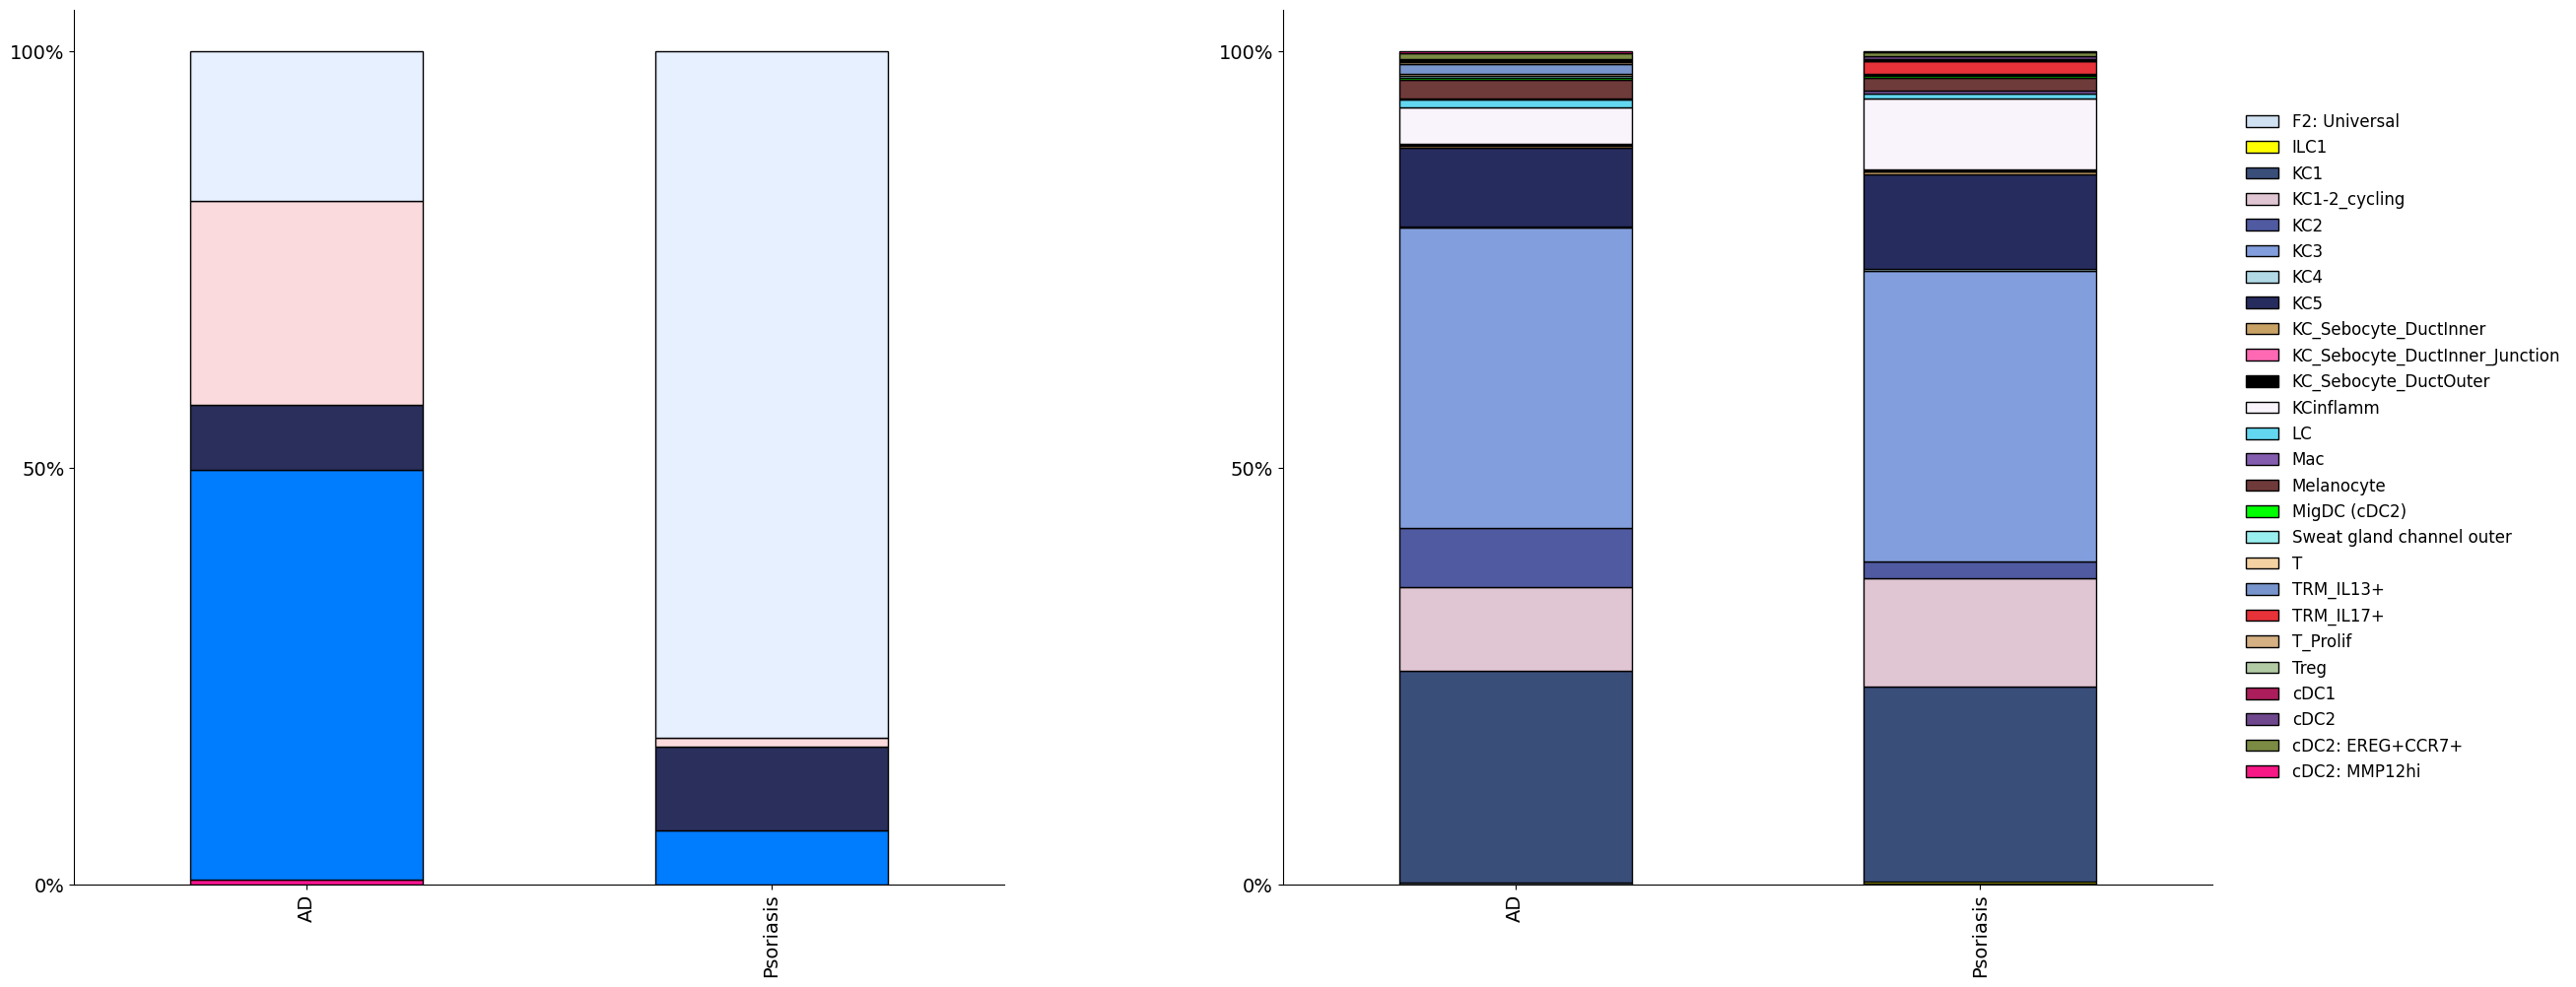

In [164]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import math

MINIMUM_PERCENT = 0.1

# ---------- First dataset: niche12 ----------
df1 = adata_filtered.obs[["info_id2", "niche12", "disease_overall"]].copy()
grouped1 = df1.groupby(["disease_overall", "niche12"]).size().reset_index(name="cell_count")
pivot1 = grouped1.pivot(index="disease_overall", columns="niche12", values="cell_count").fillna(0)
proportions1 = pivot1.div(pivot1.sum(axis=1), axis=0) * 100
mask1 = (proportions1 >= MINIMUM_PERCENT).any(axis=0)
proportions1 = proportions1.loc[:, mask1]
proportions1 = proportions1.div(proportions1.sum(axis=1), axis=0) * 100

with open('/nfs/team298/ls34/color_for_adult_skin_XENIUMniches.pkl', 'rb') as f:
    colors1 = pickle.load(f)
plot_colors1 = [colors1.get(cell_type, "grey") for cell_type in proportions1.columns]

# ---------- Second dataset: lvl4_annotation ----------
df2 = adata_filtered.obs[["info_id2", "lvl4_annotation", "disease_overall"]].copy()
grouped2 = df2.groupby(["disease_overall", "lvl4_annotation"]).size().reset_index(name="cell_count")
pivot2 = grouped2.pivot(index="disease_overall", columns="lvl4_annotation", values="cell_count").fillna(0)
proportions2 = pivot2.div(pivot2.sum(axis=1), axis=0) * 100
mask2 = (proportions2 >= MINIMUM_PERCENT).any(axis=0)
proportions2 = proportions2.loc[:, mask2]
proportions2 = proportions2.div(proportions2.sum(axis=1), axis=0) * 100

with open('/nfs/team298/ls34/color_for_adult_skin2.pkl', 'rb') as f:
    colors2 = pickle.load(f)
plot_colors2 = [colors2.get(cell_type, "grey") for cell_type in proportions2.columns]

# ---------- Plot side by side ----------
fig, axes = plt.subplots(1, 2, figsize=(28, 12), sharey=False)
plt.subplots_adjust(top=0.85, wspace=0.3)

fontsize_xticks = 14
fontsize_yticks = 14

# Left plot: niche12
proportions1.plot(
    kind="bar",
    stacked=True,
    color=plot_colors1,
    edgecolor="black",
    ax=axes[0]
)
axes[0].set_xlabel("")
axes[0].set_ylabel("")
axes[0].set_xticks(range(len(proportions1)))
axes[0].set_xticklabels(proportions1.index, rotation=90, fontsize=fontsize_xticks)
axes[0].tick_params(axis='y', labelsize=fontsize_yticks)
axes[0].set_yticks([0, 50, 100])
axes[0].set_yticklabels(["0%", "50%", "100%"], fontsize=fontsize_yticks)
axes[0].grid(False)
axes[0].spines["top"].set_visible(False)
axes[0].spines["right"].set_visible(False)
axes[0].legend_.remove()  # remove legend

# Right plot: lvl4_annotation
proportions2.plot(
    kind="bar",
    stacked=True,
    color=plot_colors2,
    edgecolor="black",
    ax=axes[1]
)
axes[1].set_xlabel("")
axes[1].set_ylabel("")
axes[1].set_xticks(range(len(proportions2)))
axes[1].set_xticklabels(proportions2.index, rotation=90, fontsize=fontsize_xticks)
axes[1].tick_params(axis='y', labelsize=fontsize_yticks)
axes[1].set_yticks([0, 50, 100])
axes[1].set_yticklabels(["0%", "50%", "100%"], fontsize=fontsize_yticks)
axes[1].grid(False)
axes[1].spines["top"].set_visible(False)
axes[1].spines["right"].set_visible(False)

# Legend for right plot only, on right-hand side
axes[1].legend(
    title="",
    labels=proportions2.columns,
    loc='center left',
    bbox_to_anchor=(1.02, 0.5),
    fontsize=12,
    frameon=False
)

plt.show()

/tmp/ipykernel_1987804/1623370808.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped1 = df1.groupby(["disease_overall", "niche12"]).size().reset_index(name="cell_count")
/tmp/ipykernel_1987804/1623370808.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped2 = df2.groupby(["disease_overall", "lvl4_annotation"]).size().reset_index(name="cell_count")


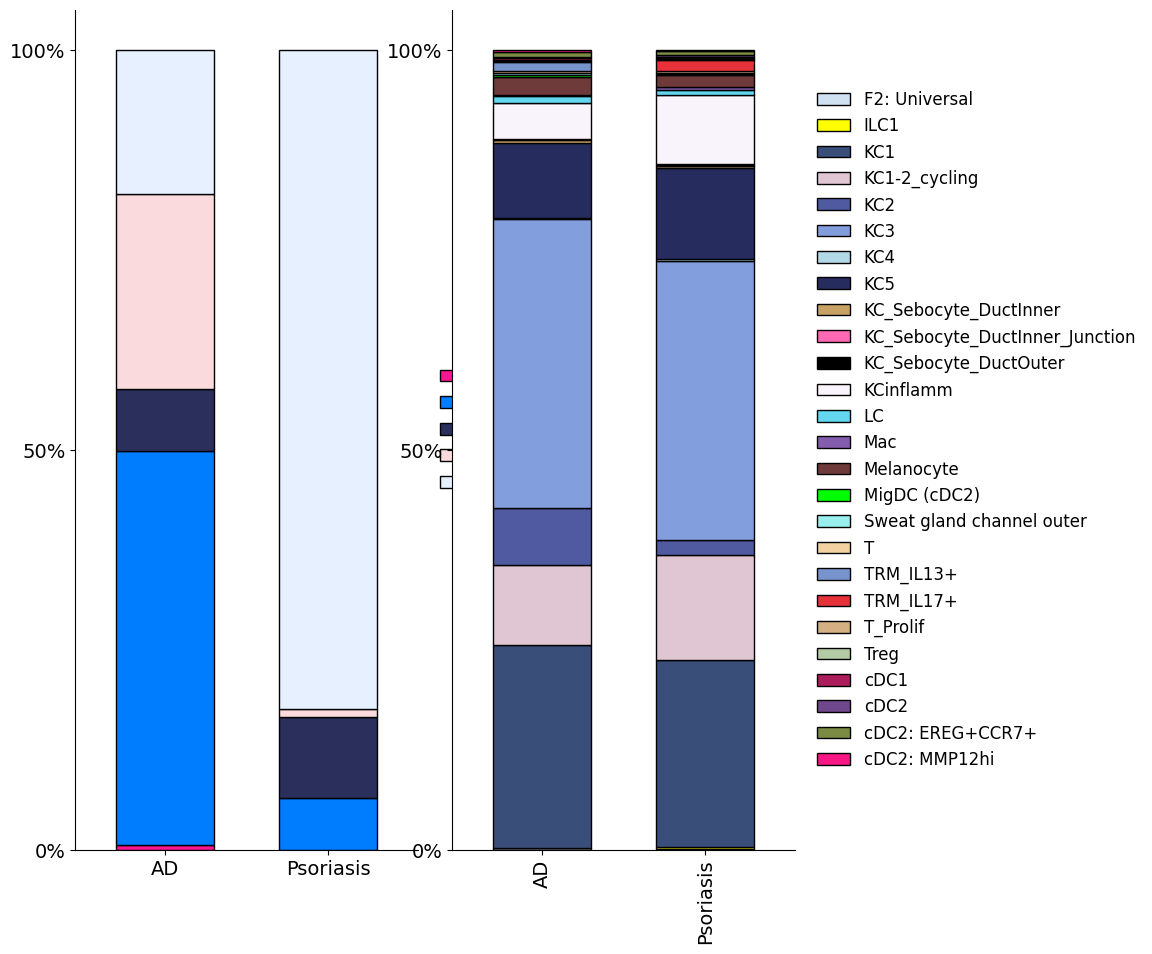

In [168]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import math

MINIMUM_PERCENT = 0.1

# ---------- First dataset: niche12 ----------
df1 = adata_filtered.obs[["info_id2", "niche12", "disease_overall"]].copy()
grouped1 = df1.groupby(["disease_overall", "niche12"]).size().reset_index(name="cell_count")
pivot1 = grouped1.pivot(index="disease_overall", columns="niche12", values="cell_count").fillna(0)
proportions1 = pivot1.div(pivot1.sum(axis=1), axis=0) * 100
mask1 = (proportions1 >= MINIMUM_PERCENT).any(axis=0)
proportions1 = proportions1.loc[:, mask1]
proportions1 = proportions1.div(proportions1.sum(axis=1), axis=0) * 100

with open('/nfs/team298/ls34/color_for_adult_skin_XENIUMniches.pkl', 'rb') as f:
    colors1 = pickle.load(f)
plot_colors1 = [colors1.get(cell_type, "grey") for cell_type in proportions1.columns]

# ---------- Second dataset: lvl4_annotation ----------
df2 = adata_filtered.obs[["info_id2", "lvl4_annotation", "disease_overall"]].copy()
grouped2 = df2.groupby(["disease_overall", "lvl4_annotation"]).size().reset_index(name="cell_count")
pivot2 = grouped2.pivot(index="disease_overall", columns="lvl4_annotation", values="cell_count").fillna(0)
proportions2 = pivot2.div(pivot2.sum(axis=1), axis=0) * 100
mask2 = (proportions2 >= MINIMUM_PERCENT).any(axis=0)
proportions2 = proportions2.loc[:, mask2]
proportions2 = proportions2.div(proportions2.sum(axis=1), axis=0) * 100

with open('/nfs/team298/ls34/color_for_adult_skin2.pkl', 'rb') as f:
    colors2 = pickle.load(f)
plot_colors2 = [colors2.get(cell_type, "grey") for cell_type in proportions2.columns]

# ---------- Plot side by side ----------
fig, axes = plt.subplots(1, 2, figsize=(8, 12), sharey=False)
plt.subplots_adjust(left=0.05, right=0.95, top=0.85, bottom=0.15, wspace=0.1)

fontsize_xticks = 14
fontsize_yticks = 14
bar_width = 0.6

# Left plot: niche12
proportions1.plot(
    kind="bar",
    stacked=True,
    color=plot_colors1,
    edgecolor="black",
    width=bar_width,
    ax=axes[0]
)
axes[0].set_xlabel("")
axes[0].set_ylabel("")
axes[0].set_xticks(range(len(proportions1)))
axes[0].set_xticklabels(proportions1.index, rotation=0, fontsize=fontsize_xticks)
axes[0].tick_params(axis='y', labelsize=fontsize_yticks)
axes[0].set_yticks([0, 50, 100])
axes[0].set_yticklabels(["0%", "50%", "100%"], fontsize=fontsize_yticks)
axes[0].grid(False)
axes[0].spines["top"].set_visible(False)
axes[0].spines["right"].set_visible(False)

# Legend on right-hand side
axes[0].legend(
    title="",
    labels=proportions1.columns,
    loc='center left',
    bbox_to_anchor=(1.02, 0.5),
    fontsize=12,
    frameon=False
)

# Right plot: lvl4_annotation
proportions2.plot(
    kind="bar",
    stacked=True,
    color=plot_colors2,
    edgecolor="black",
    width=bar_width,
    ax=axes[1]
)
axes[1].set_xlabel("")
axes[1].set_ylabel("")
axes[1].set_xticks(range(len(proportions2)))
axes[1].set_xticklabels(proportions2.index, rotation=90, fontsize=fontsize_xticks)
axes[1].tick_params(axis='y', labelsize=fontsize_yticks)
axes[1].set_yticks([0, 50, 100])
axes[1].set_yticklabels(["0%", "50%", "100%"], fontsize=fontsize_yticks)
axes[1].grid(False)
axes[1].spines["top"].set_visible(False)
axes[1].spines["right"].set_visible(False)

# Legend on right-hand side
axes[1].legend(
    title="",
    labels=proportions2.columns,
    loc='center left',
    bbox_to_anchor=(1.02, 0.5),
    fontsize=12,
    frameon=False
)

plt.show()

/tmp/ipykernel_1987804/3533351460.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped1 = df1.groupby(["disease_overall", "niche12"]).size().reset_index(name="cell_count")
/tmp/ipykernel_1987804/3533351460.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped2 = df2.groupby(["disease_overall", "lvl4_annotation"]).size().reset_index(name="cell_count")


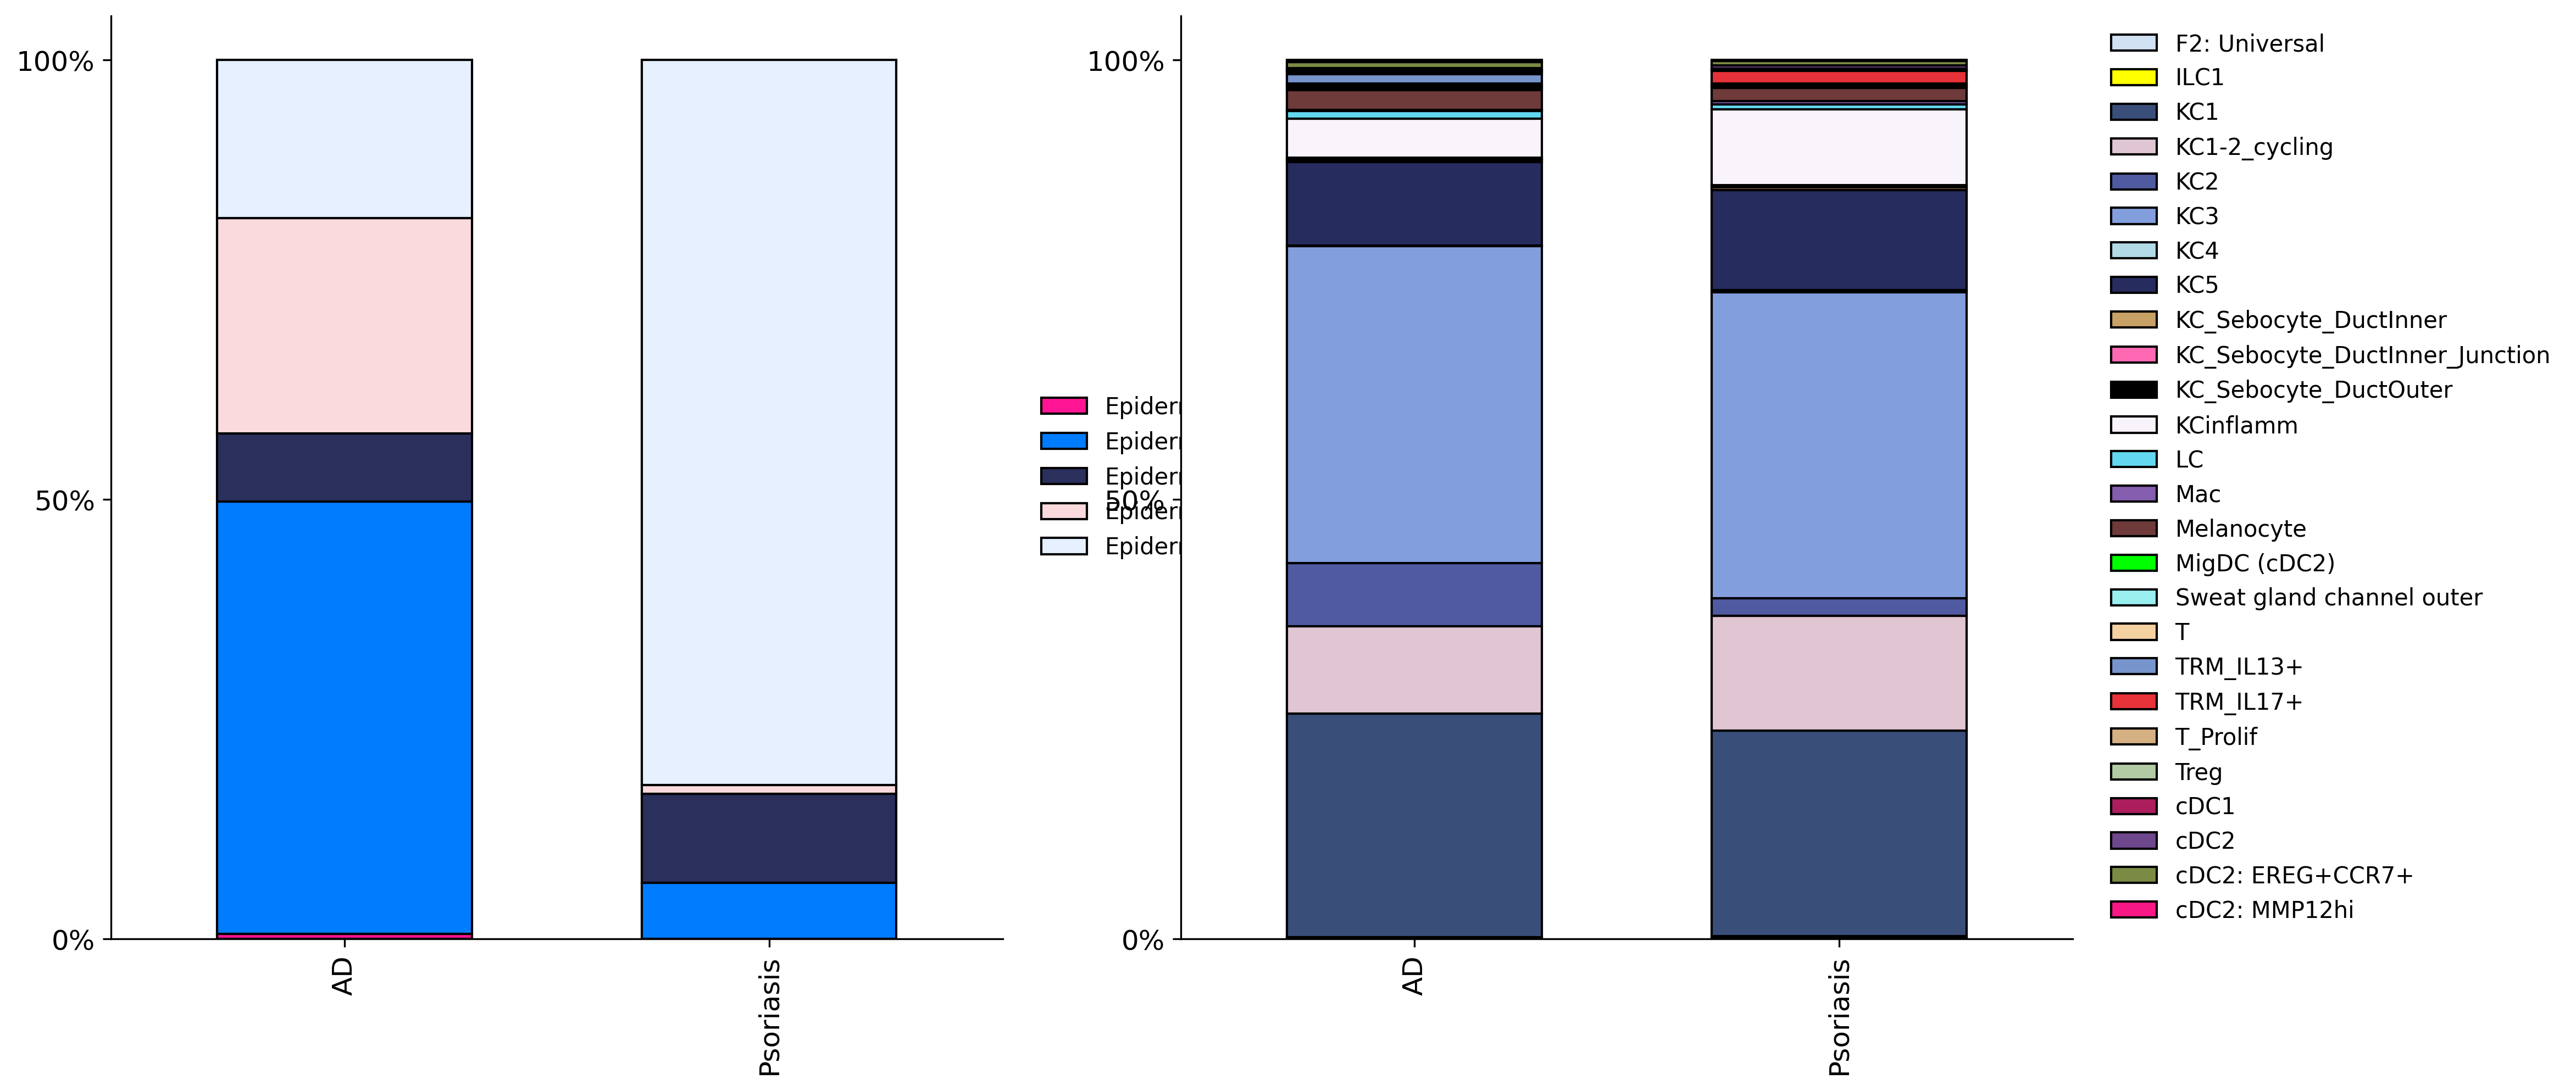

In [172]:
import matplotlib.pyplot as plt
import pickle

MINIMUM_PERCENT = 0.1

# ---------- First dataset: niche12 ----------
df1 = adata_filtered.obs[["info_id2", "niche12", "disease_overall"]].copy()
grouped1 = df1.groupby(["disease_overall", "niche12"]).size().reset_index(name="cell_count")
pivot1 = grouped1.pivot(index="disease_overall", columns="niche12", values="cell_count").fillna(0)
proportions1 = pivot1.div(pivot1.sum(axis=1), axis=0) * 100
mask1 = (proportions1 >= MINIMUM_PERCENT).any(axis=0)
proportions1 = proportions1.loc[:, mask1]
proportions1 = proportions1.div(proportions1.sum(axis=1), axis=0) * 100

with open('/nfs/team298/ls34/color_for_adult_skin_XENIUMniches.pkl', 'rb') as f:
    colors1 = pickle.load(f)
plot_colors1 = [colors1.get(cell_type, "grey") for cell_type in proportions1.columns]

# ---------- Second dataset: lvl4_annotation ----------
df2 = adata_filtered.obs[["info_id2", "lvl4_annotation", "disease_overall"]].copy()
grouped2 = df2.groupby(["disease_overall", "lvl4_annotation"]).size().reset_index(name="cell_count")
pivot2 = grouped2.pivot(index="disease_overall", columns="lvl4_annotation", values="cell_count").fillna(0)
proportions2 = pivot2.div(pivot2.sum(axis=1), axis=0) * 100
mask2 = (proportions2 >= MINIMUM_PERCENT).any(axis=0)
proportions2 = proportions2.loc[:, mask2]
proportions2 = proportions2.div(proportions2.sum(axis=1), axis=0) * 100

with open('/nfs/team298/ls34/color_for_adult_skin2.pkl', 'rb') as f:
    colors2 = pickle.load(f)
plot_colors2 = [colors2.get(cell_type, "grey") for cell_type in proportions2.columns]

# ---------- Plot side by side ----------
fig, axes = plt.subplots(1, 2, figsize=(14, 8), dpi=300, sharey=False)
plt.subplots_adjust(left=0.05, right=0.9, top=0.9, bottom=0.2, wspace=0.2)

fontsize_xticks = 12
fontsize_yticks = 12
bar_width = 0.6

# ---------- Left plot: niche12 ----------
ax0 = axes[0]
proportions1.plot(
    kind="bar",
    stacked=True,
    color=plot_colors1,
    edgecolor="black",
    width=bar_width,
    ax=ax0
)
ax0.set_xlabel("")
ax0.set_ylabel("")
ax0.set_xticklabels(proportions1.index, rotation=90, fontsize=fontsize_xticks)
ax0.tick_params(axis='y', labelsize=fontsize_yticks)
ax0.set_yticks([0, 50, 100])
ax0.set_yticklabels(["0%", "50%", "100%"], fontsize=fontsize_yticks)
ax0.grid(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)

# Legend just to the right of first plot
handles0, labels0 = ax0.get_legend_handles_labels()
ax0.get_legend().remove()
ax0.legend(
    handles0, labels0,
    loc='center left',
    bbox_to_anchor=(1.02, 0.5),
    fontsize=10,
    frameon=False
)

# ---------- Right plot: lvl4_annotation ----------
ax1 = axes[1]
proportions2.plot(
    kind="bar",
    stacked=True,
    color=plot_colors2,
    edgecolor="black",
    width=bar_width,
    ax=ax1
)
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_xticklabels(proportions2.index, rotation=90, fontsize=fontsize_xticks)
ax1.tick_params(axis='y', labelsize=fontsize_yticks)
ax1.set_yticks([0, 50, 100])
ax1.set_yticklabels(["0%", "50%", "100%"], fontsize=fontsize_yticks)
ax1.grid(False)
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)

# Legend just to the right of second plot
handles1, labels1 = ax1.get_legend_handles_labels()
ax1.get_legend().remove()
ax1.legend(
    handles1, labels1,
    loc='center left',
    bbox_to_anchor=(1.02, 0.5),
    fontsize=10,
    frameon=False
)

plt.show()

/tmp/ipykernel_1987804/2209967292.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped1 = df1.groupby(["disease_overall", "niche12"]).size().reset_index(name="cell_count")
/tmp/ipykernel_1987804/2209967292.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped2 = df2.groupby(["disease_overall", "lvl4_annotation"]).size().reset_index(name="cell_count")


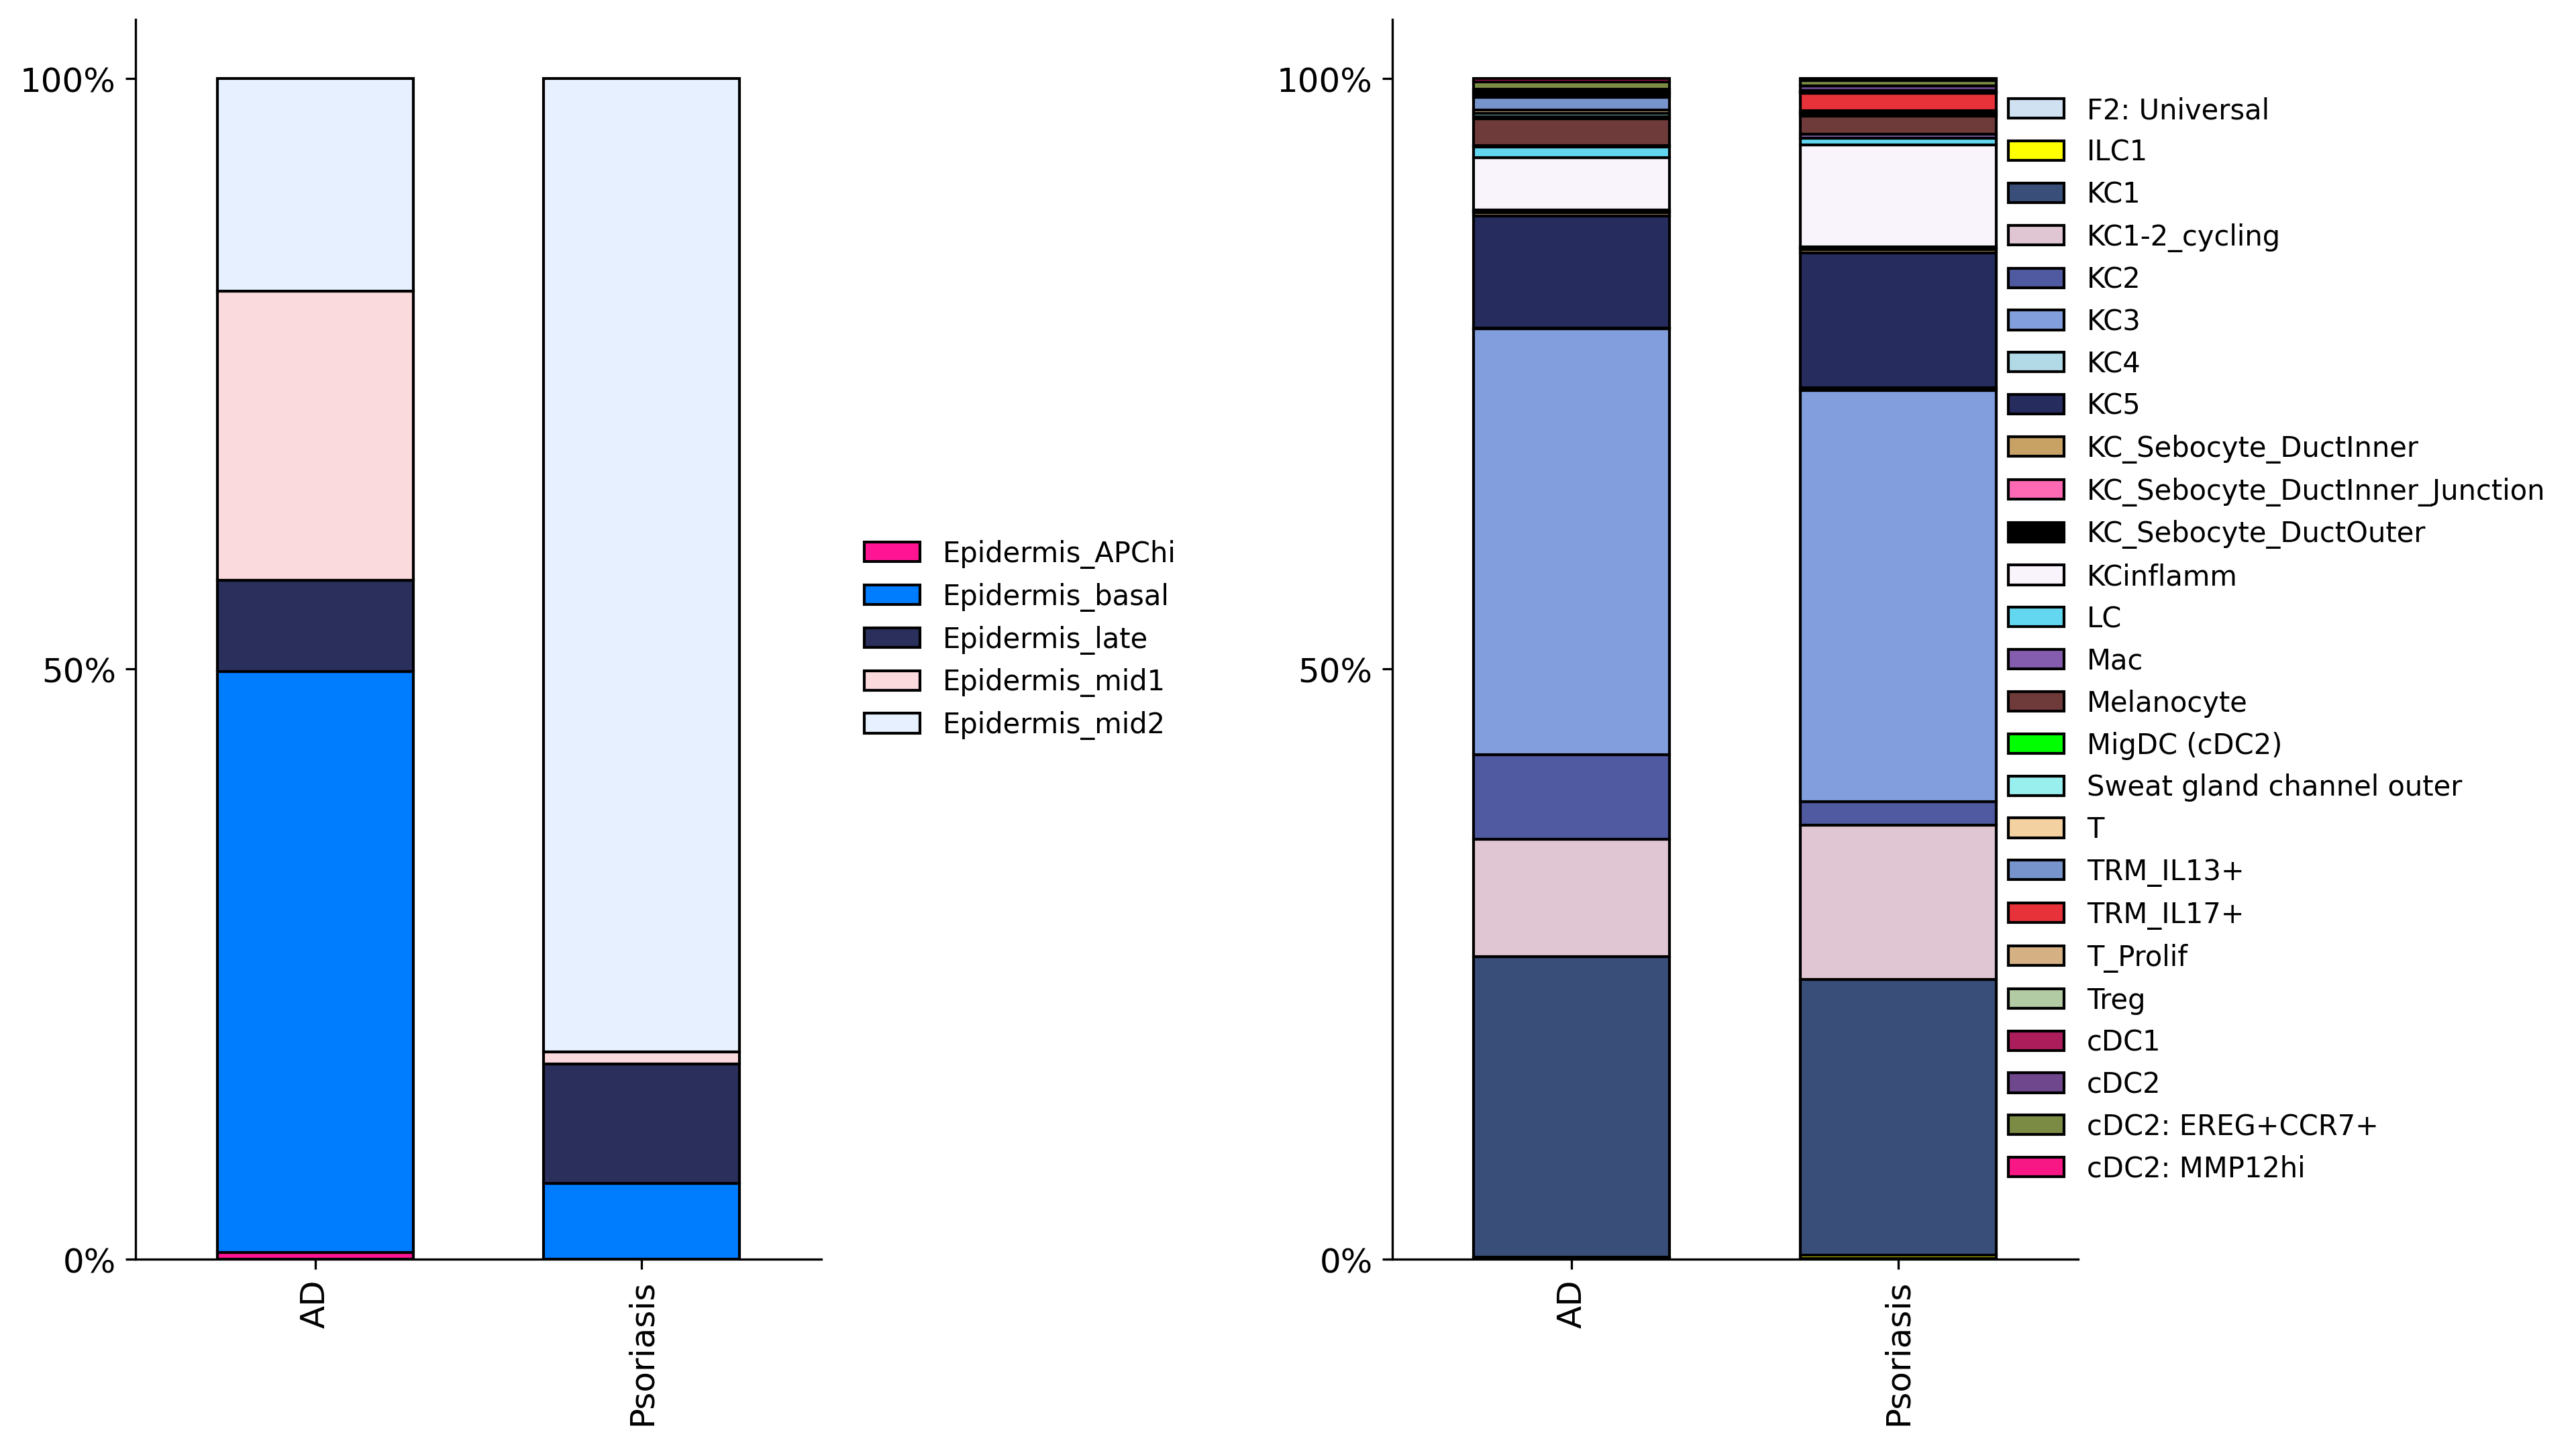

In [181]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pickle

MINIMUM_PERCENT = 0.1

# ---------- First dataset: niche12 ----------
df1 = adata_filtered.obs[["info_id2", "niche12", "disease_overall"]].copy()
grouped1 = df1.groupby(["disease_overall", "niche12"]).size().reset_index(name="cell_count")
pivot1 = grouped1.pivot(index="disease_overall", columns="niche12", values="cell_count").fillna(0)
proportions1 = pivot1.div(pivot1.sum(axis=1), axis=0) * 100
mask1 = (proportions1 >= MINIMUM_PERCENT).any(axis=0)
proportions1 = proportions1.loc[:, mask1]
proportions1 = proportions1.div(proportions1.sum(axis=1), axis=0) * 100

with open('/nfs/team298/ls34/color_for_adult_skin_XENIUMniches.pkl', 'rb') as f:
    colors1 = pickle.load(f)
plot_colors1 = [colors1.get(cell_type, "grey") for cell_type in proportions1.columns]

# ---------- Second dataset: lvl4_annotation ----------
df2 = adata_filtered.obs[["info_id2", "lvl4_annotation", "disease_overall"]].copy()
grouped2 = df2.groupby(["disease_overall", "lvl4_annotation"]).size().reset_index(name="cell_count")
pivot2 = grouped2.pivot(index="disease_overall", columns="lvl4_annotation", values="cell_count").fillna(0)
proportions2 = pivot2.div(pivot2.sum(axis=1), axis=0) * 100
mask2 = (proportions2 >= MINIMUM_PERCENT).any(axis=0)
proportions2 = proportions2.loc[:, mask2]
proportions2 = proportions2.div(proportions2.sum(axis=1), axis=0) * 100

with open('/nfs/team298/ls34/color_for_adult_skin2.pkl', 'rb') as f:
    colors2 = pickle.load(f)
plot_colors2 = [colors2.get(cell_type, "grey") for cell_type in proportions2.columns]

# ---------- Use gridspec to layout plots + legend ----------
# Increase figure width, increase gap between plots, move right legend further out
fig = plt.figure(figsize=(14, 8), dpi=300)
gs = gridspec.GridSpec(1, 5, width_ratios=[4, 0.5, 0.1, 4, 0.5], wspace=0.5)

# Axes
ax0 = fig.add_subplot(gs[0])        # Left plot
ax0_legend = fig.add_subplot(gs[1]) # Legend for left plot
ax1 = fig.add_subplot(gs[3])        # Right plot
ax1_legend = fig.add_subplot(gs[4]) # Legend for right plot

# Turn off axes for legend placeholders
for ax in [ax0_legend, ax1_legend]:
    ax.axis("off")

# ---------- Left plot ----------
proportions1.plot(
    kind="bar",
    stacked=True,
    color=plot_colors1,
    edgecolor="black",
    width=0.6,
    ax=ax0
)
ax0.set_xlabel("")
ax0.set_ylabel("")
ax0.set_xticklabels(proportions1.index, rotation=90, fontsize=12)
ax0.set_yticks([0, 50, 100])
ax0.set_yticklabels(["0%", "50%", "100%"], fontsize=12)
ax0.tick_params(axis='y', labelsize=12)
ax0.grid(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)

# Legend for left plot
handles0, labels0 = ax0.get_legend_handles_labels()
ax0.get_legend().remove()
ax0_legend.legend(handles0, labels0, loc='center', fontsize=10, frameon=False)

# ---------- Right plot ----------
proportions2.plot(
    kind="bar",
    stacked=True,
    color=plot_colors2,
    edgecolor="black",
    width=0.6,
    ax=ax1
)
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_xticklabels(proportions2.index, rotation=90, fontsize=12)
ax1.set_yticks([0, 50, 100])
ax1.set_yticklabels(["0%", "50%", "100%"], fontsize=12)
ax1.tick_params(axis='y', labelsize=12)
ax1.grid(False)
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)

# Legend for right plot
handles1, labels1 = ax1.get_legend_handles_labels()
ax1.get_legend().remove()
ax1_legend.legend(handles1, labels1, loc='center', fontsize=10, frameon=False)

plt.show()

/tmp/ipykernel_1987804/3055444180.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped1 = df1.groupby(["disease_overall", "niche12"]).size().reset_index(name="cell_count")
/tmp/ipykernel_1987804/3055444180.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped2 = df2.groupby(["disease_overall", "lvl4_annotation"]).size().reset_index(name="cell_count")


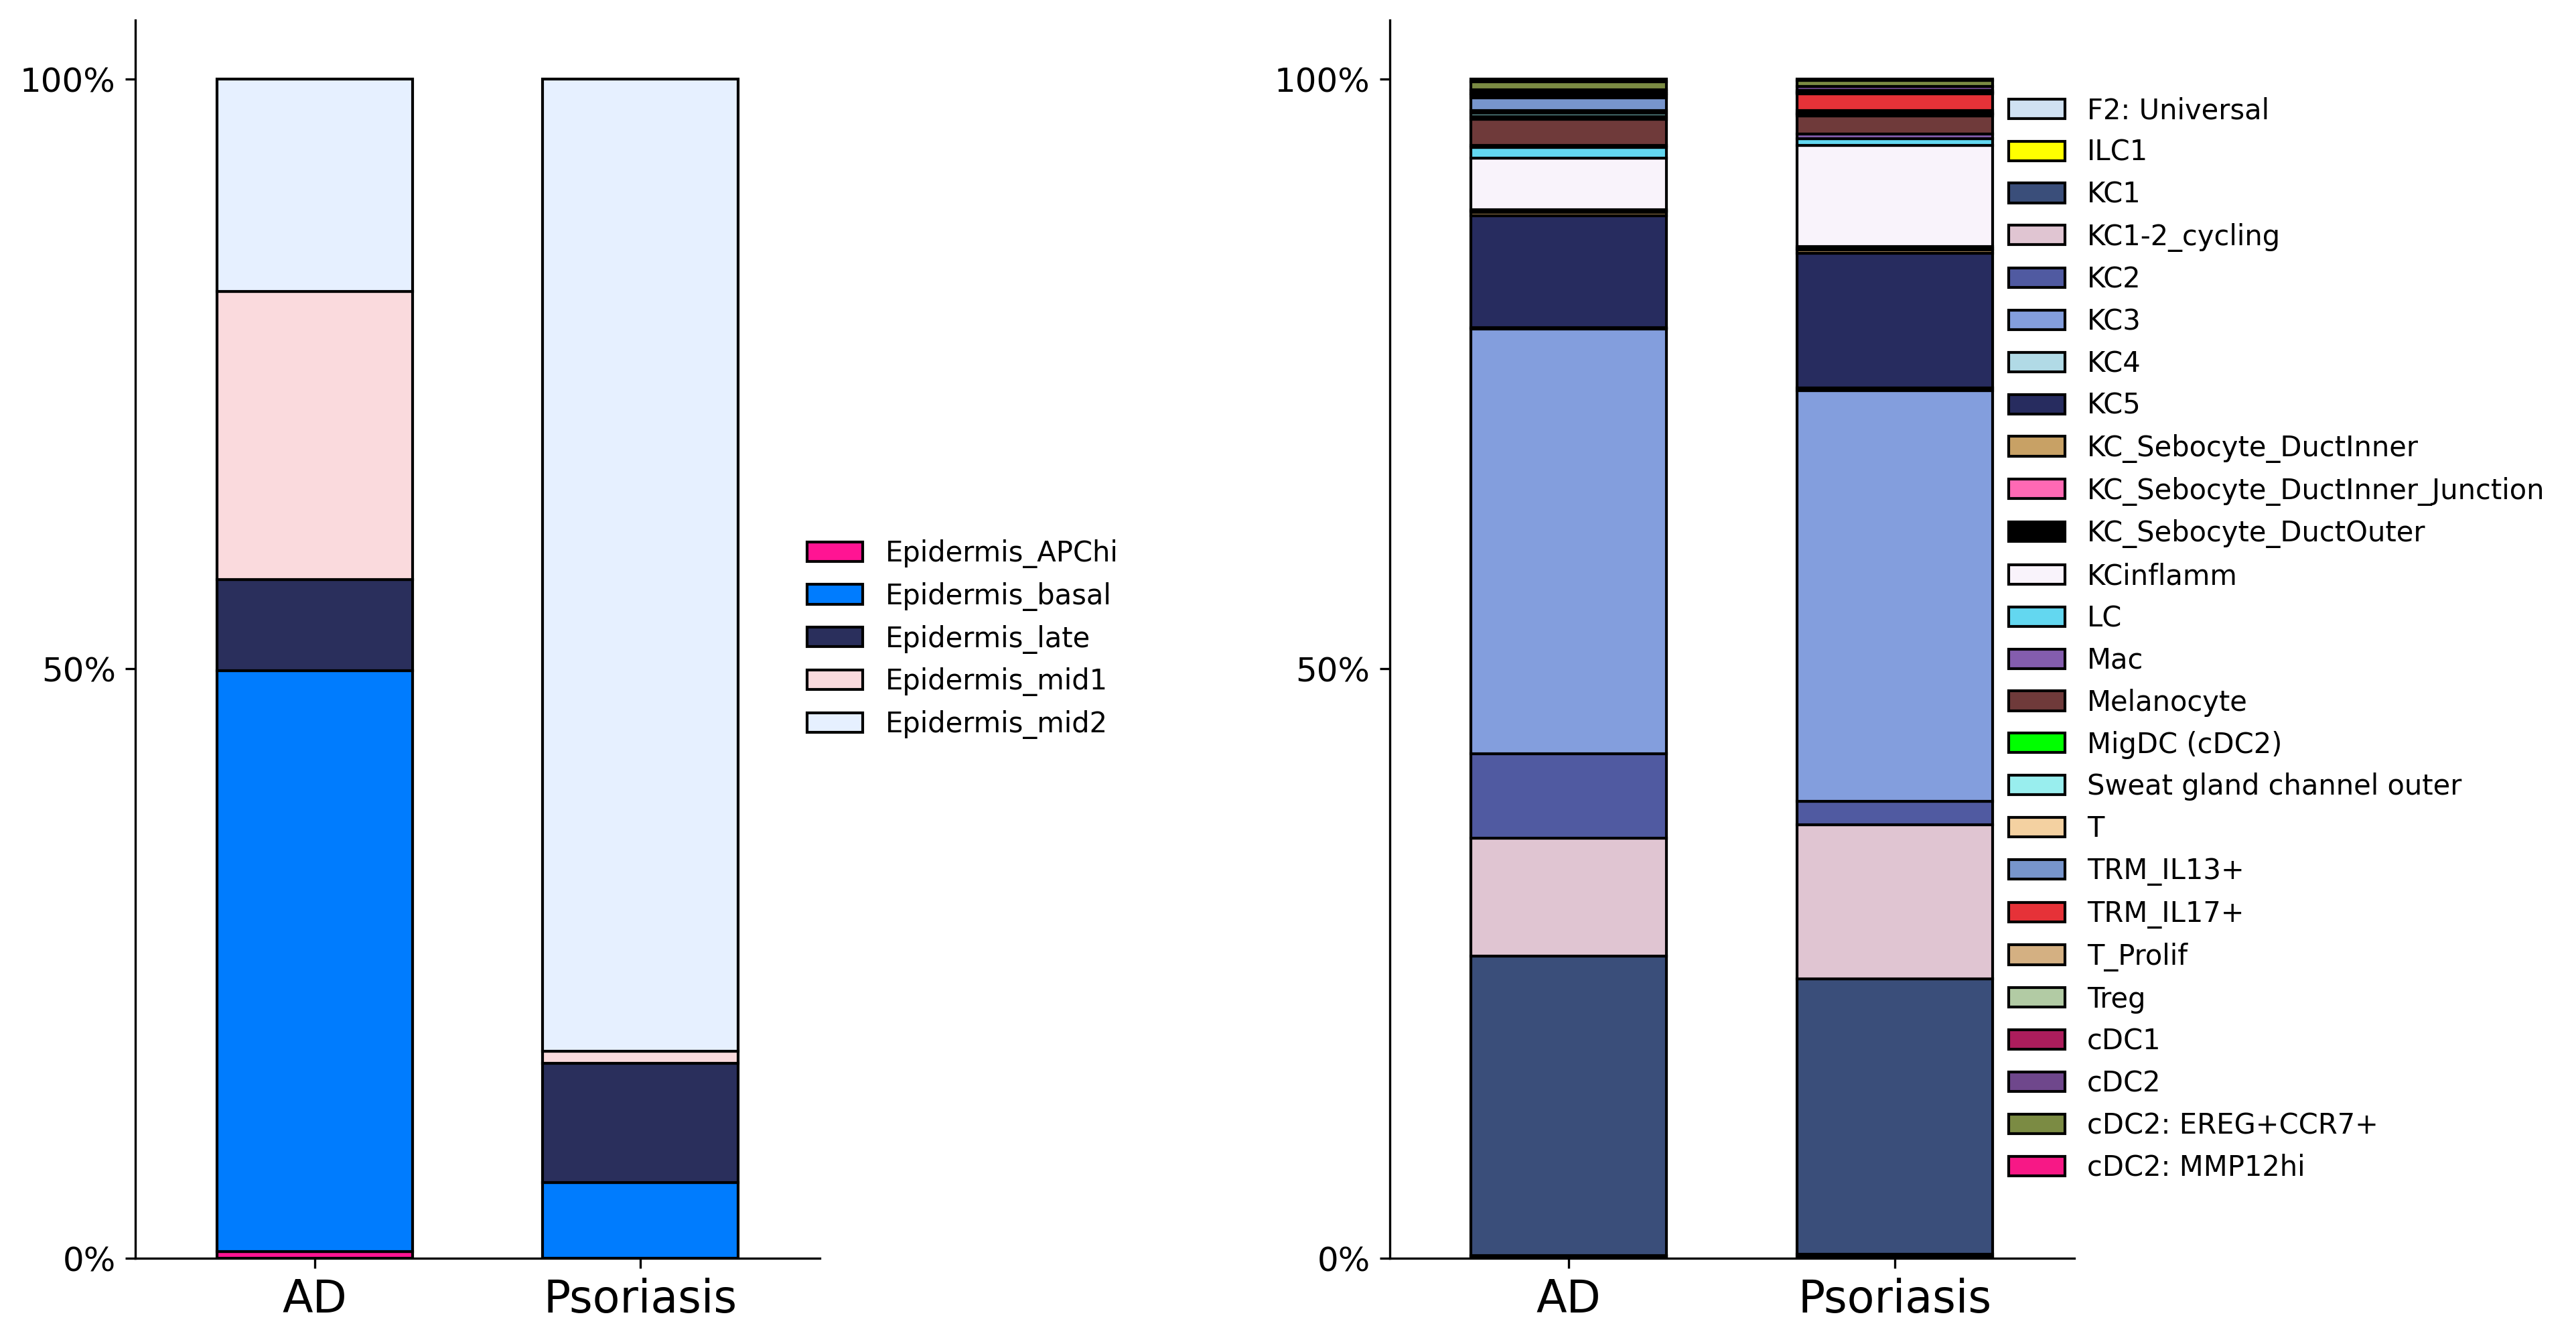

In [190]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pickle

MINIMUM_PERCENT = 0.1

# ---------- First dataset: niche12 ----------
df1 = adata_filtered.obs[["info_id2", "niche12", "disease_overall"]].copy()
grouped1 = df1.groupby(["disease_overall", "niche12"]).size().reset_index(name="cell_count")
pivot1 = grouped1.pivot(index="disease_overall", columns="niche12", values="cell_count").fillna(0)
proportions1 = pivot1.div(pivot1.sum(axis=1), axis=0) * 100
mask1 = (proportions1 >= MINIMUM_PERCENT).any(axis=0)
proportions1 = proportions1.loc[:, mask1]
proportions1 = proportions1.div(proportions1.sum(axis=1), axis=0) * 100

with open('/nfs/team298/ls34/color_for_adult_skin_XENIUMniches.pkl', 'rb') as f:
    colors1 = pickle.load(f)
plot_colors1 = [colors1.get(cell_type, "grey") for cell_type in proportions1.columns]

# ---------- Second dataset: lvl4_annotation ----------
df2 = adata_filtered.obs[["info_id2", "lvl4_annotation", "disease_overall"]].copy()
grouped2 = df2.groupby(["disease_overall", "lvl4_annotation"]).size().reset_index(name="cell_count")
pivot2 = grouped2.pivot(index="disease_overall", columns="lvl4_annotation", values="cell_count").fillna(0)
proportions2 = pivot2.div(pivot2.sum(axis=1), axis=0) * 100
mask2 = (proportions2 >= MINIMUM_PERCENT).any(axis=0)
proportions2 = proportions2.loc[:, mask2]
proportions2 = proportions2.div(proportions2.sum(axis=1), axis=0) * 100

with open('/nfs/team298/ls34/color_for_adult_skin2.pkl', 'rb') as f:
    colors2 = pickle.load(f)
plot_colors2 = [colors2.get(cell_type, "grey") for cell_type in proportions2.columns]

# ---------- Use gridspec to layout plots + legend ----------
fig = plt.figure(figsize=(14, 8), dpi=300)
gs = gridspec.GridSpec(1, 5, width_ratios=[4, 0.5, 0.1, 4, 0.5], wspace=0.5)

# Axes
ax0 = fig.add_subplot(gs[0])        # Left plot
ax0_legend = fig.add_subplot(gs[1]) # Legend for left plot
ax1 = fig.add_subplot(gs[3])        # Right plot
ax1_legend = fig.add_subplot(gs[4]) # Legend for right plot

# Turn off axes for legend placeholders
for ax in [ax0_legend, ax1_legend]:
    ax.axis("off")

# ---------- Left plot ----------
proportions1.plot(
    kind="bar",
    stacked=True,
    color=plot_colors1,
    edgecolor="black",
    width=0.6,
    ax=ax0
)
ax0.set_xlabel("")
ax0.set_ylabel("")
ax0.set_xticklabels(proportions1.index, rotation=0, fontsize=16)
ax0.set_yticks([0, 50, 100])
ax0.set_yticklabels(["0%", "50%", "100%"], fontsize=12)
ax0.tick_params(axis='y', labelsize=12)
ax0.grid(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)

# Legend for left plot (slightly left)
handles0, labels0 = ax0.get_legend_handles_labels()
ax0.get_legend().remove()
ax0_legend.legend(
    handles0,
    labels0,
    loc='center',
    fontsize=10,
    frameon=False,
    bbox_to_anchor=(-0.15, 0.5)  # move slightly left
)

# ---------- Right plot ----------
proportions2.plot(
    kind="bar",
    stacked=True,
    color=plot_colors2,
    edgecolor="black",
    width=0.6,
    ax=ax1
)
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_xticklabels(proportions2.index, rotation=0, fontsize=16)
ax1.set_yticks([0, 50, 100])
ax1.set_yticklabels(["0%", "50%", "100%"], fontsize=12)
ax1.tick_params(axis='y', labelsize=12)
ax1.grid(False)
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)

# Legend for right plot (slightly further right)
handles1, labels1 = ax1.get_legend_handles_labels()
ax1.get_legend().remove()
ax1_legend.legend(
    handles1,
    labels1,
    loc='center',
    fontsize=10,
    frameon=False,
    bbox_to_anchor=(0.55, 0.5)  # move further right
)

plt.show()

In [122]:
adata_5k_ii=adata_5k_ii[adata_5k_ii.obs["niche12"].str.sartswith("Epi")]

In [124]:
adata_5k_ii.obs["NEW"] = adata_5k_ii.obs["disease_overall"].astype(str) + "_" + adata_5k_ii.obs[ANNOTATION].astype(str) 
adata_5k_ii.obs["NEW"].value_counts()

/tmp/ipykernel_1987804/2505760619.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_5k_ii.obs["NEW"] = adata_5k_ii.obs["disease_overall"].astype(str) + "_" + adata_5k_ii.obs[ANNOTATION].astype(str)


NEW
AD_AD_LC                                615
AD_AD_cDC2: EREG+CCR7+                  451
AD_AD_cDC2: MMP12hi                     171
AD_AD_MigDC (cDC2)                      144
Psoriasis_Psoriasis_LC                  134
AD_AD_cDC2                              133
Psoriasis_Psoriasis_cDC2: EREG+CCR7+    115
AD_AD_cDC1                               99
Psoriasis_Psoriasis_cDC2                 86
Psoriasis_Psoriasis_MigDC (cDC2)         39
Psoriasis_Psoriasis_cDC2: MMP12hi        29
Psoriasis_Psoriasis_cDC1                 27
AD_AD_cDC2_cycling                        4
AD_AD_MigDC (cDC1)                        1
Name: count, dtype: int64

/tmp/ipykernel_1987804/3692699693.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["niche12", "NEW"])


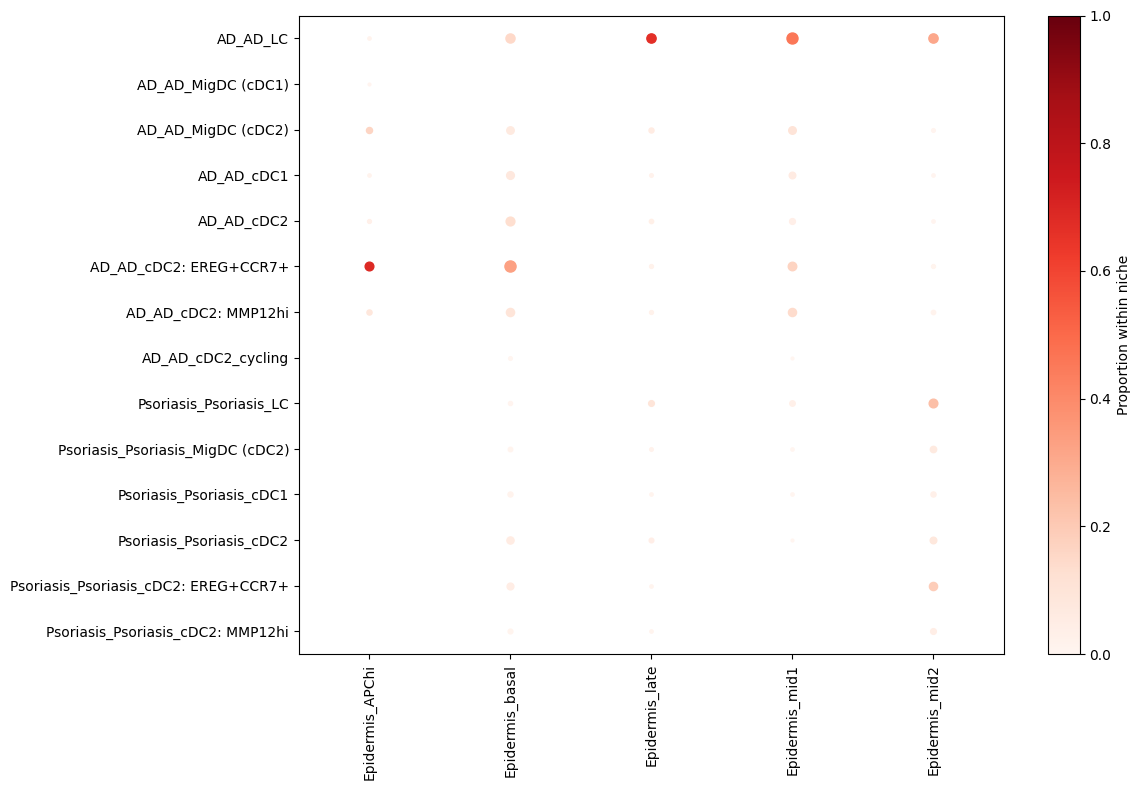

In [127]:

adata_5k_iii = adata_5k_ii
counts = (    adata_5k_iii.obs
    .groupby(["niche12", "NEW"])
    .size()
    .reset_index(name="count")
)

# --- pivot into matrix (annotations x niches) ---
heatmap_data = counts.pivot(
    index="NEW",
    columns="niche12",
    values="count"
).fillna(0)

# --- normalize by column (niche) to get proportions ---
prop_data = heatmap_data.div(heatmap_data.sum(axis=0), axis=1)

# --- flatten to long form for plotting ---
dot_data = prop_data.reset_index().melt(
    id_vars="NEW", var_name="niche12", value_name="prop"
)

# also keep raw counts for dot size
counts_long = heatmap_data.reset_index().melt(
    id_vars="NEW", var_name="niche12", value_name="count"
)
dot_data = dot_data.merge(counts_long, on=["NEW", "niche12"])

# --- plotting ---
fig, ax = plt.subplots(figsize=(12, 8))

for i, annot in enumerate(prop_data.index):
    for j, niche in enumerate(prop_data.columns):
        val = dot_data.query("NEW == @annot and niche12 == @niche")
        if not val.empty:
            prop = val["prop"].values[0]   # color
            count = val["count"].values[0] # size
            ax.scatter(
                j, i,
                s=(count**0.5)*4,     # dot size ~ sqrt(count)
                c=[[plt.cm.Reds(prop)]], # color ~ proportion
                marker="o"
            )

# --- aesthetics ---
ax.set_xticks(np.arange(len(prop_data.columns)))
ax.set_xticklabels(prop_data.columns, rotation=90, fontsize=10)
ax.set_yticks(np.arange(len(prop_data.index)))
ax.set_yticklabels(prop_data.index, fontsize=10)
ax.set_xlim(-0.5, len(prop_data.columns)-0.5)
ax.set_ylim(-0.5, len(prop_data.index)-0.5)
ax.invert_yaxis()

# colorbar for proportion
sm = plt.cm.ScalarMappable(cmap=plt.cm.Reds, norm=plt.Normalize(vmin=0, vmax=1))
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label("Proportion within niche")

plt.tight_layout()
plt.show()

/tmp/ipykernel_1987804/543545276.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["niche12", "lvl4_annotation"])
/tmp/ipykernel_1987804/543545276.py:86: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


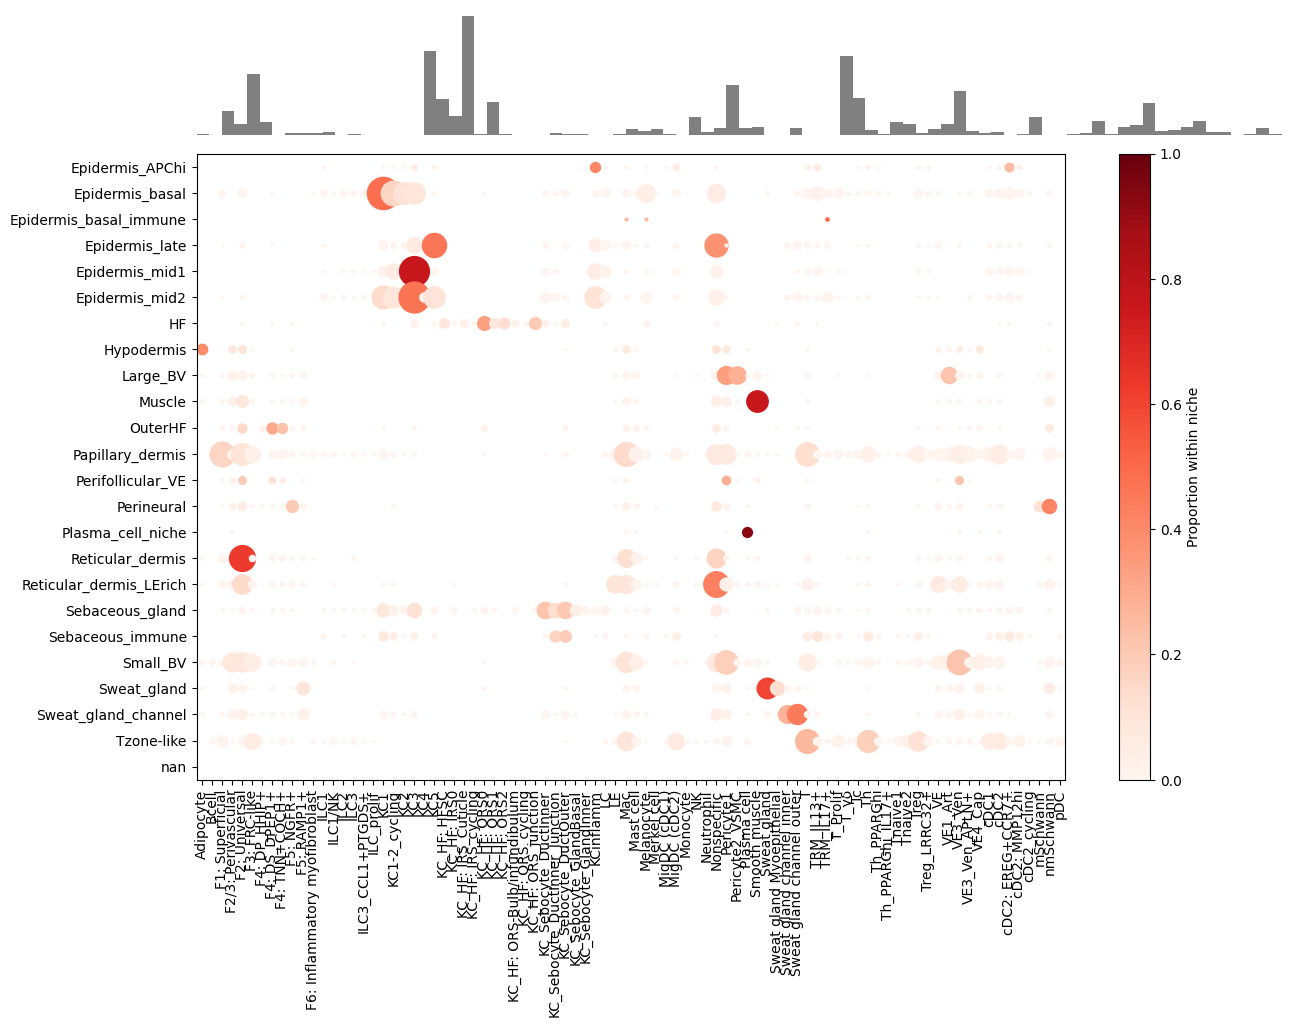

In [130]:
for x in adata_5k.obs["disease_overall"].unique():
    print(x)
    adata_5k_iii = adata_5k_ii[adata_5k_ii.obs["disease_overall"] == x].copy()
    counts = (    adata_5k_iii.obs
        .groupby(["niche12", "lvl4_annotation"])
        .size()
        .reset_index(name="count")
    )

    # --- pivot into matrix (annotations x niches) ---
    heatmap_data = counts.pivot(
        index="lvl4_annotation",
        columns="niche12",
        values="count"
    ).fillna(0)

    # --- normalize by column (niche) to get proportions ---
    prop_data = heatmap_data.div(heatmap_data.sum(axis=0), axis=1)

    # --- flatten to long form for plotting ---
    dot_data = prop_data.reset_index().melt(
        id_vars="lvl4_annotation", var_name="niche12", value_name="prop"
    )

    # also keep raw counts for dot size
    counts_long = heatmap_data.reset_index().melt(
        id_vars="lvl4_annotation", var_name="niche12", value_name="count"
    )
    dot_data = dot_data.merge(counts_long, on=["lvl4_annotation", "niche12"])

    # --- plotting ---
    fig, ax = plt.subplots(figsize=(4, 4))

    for i, annot in enumerate(prop_data.index):
        for j, niche in enumerate(prop_data.columns):
            val = dot_data.query("lvl4_annotation == @annot and niche12 == @niche")
            if not val.empty:
                prop = val["prop"].values[0]   # color
                count = val["count"].values[0] # size
                ax.scatter(
                    j, i,
                    s=(count**0.5)*4,     # dot size ~ sqrt(count)
                    c=[[plt.cm.Reds(prop)]], # color ~ proportion
                    marker="o"
                )

    # --- aesthetics ---
    ax.set_xticks(np.arange(len(prop_data.columns)))
    ax.set_xticklabels(prop_data.columns, rotation=90, fontsize=10)
    ax.set_yticks(np.arange(len(prop_data.index)))
    ax.set_yticklabels(prop_data.index, fontsize=10)
    ax.set_xlim(-0.5, len(prop_data.columns)-0.5)
    ax.set_ylim(-0.5, len(prop_data.index)-0.5)
    ax.invert_yaxis()

    # colorbar for proportion
    sm = plt.cm.ScalarMappable(cmap=plt.cm.Reds, norm=plt.Normalize(vmin=0, vmax=1))
    cbar = plt.colorbar(sm, ax=ax)
    cbar.set_label("Proportion within niche")

    plt.tight_layout()
    plt.show()

AD


/tmp/ipykernel_1987804/2140924610.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["niche12", "lvl4_annotation"])
/tmp/ipykernel_1987804/2140924610.py:88: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


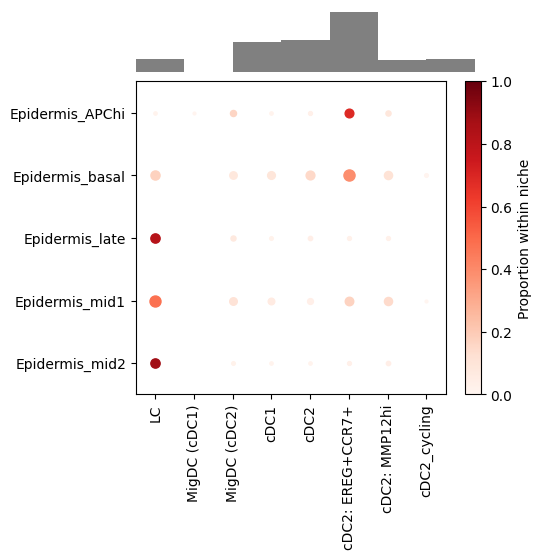

Psoriasis


/tmp/ipykernel_1987804/2140924610.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["niche12", "lvl4_annotation"])
/tmp/ipykernel_1987804/2140924610.py:88: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


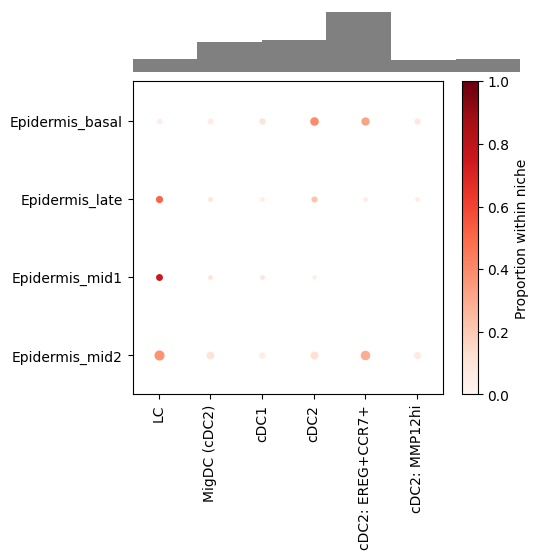

In [134]:

from matplotlib import gridspec
for x in adata_5k.obs["disease_overall"].unique():
    print(x)
    adata_5k_iii = adata_5k_ii[adata_5k_ii.obs["disease_overall"] == x].copy()



    # --- count cells per (niche, annotation) ---
    counts = (
        adata_5k_iii.obs
        .groupby(["niche12", "lvl4_annotation"])
        .size()
        .reset_index(name="count")
    )

    # --- pivot: niches as rows, annotations as cols ---
    heatmap_data = counts.pivot(
        index="niche12",
        columns="lvl4_annotation",
        values="count"
    ).fillna(0)

    # --- normalize per-row (per niche) to get proportions ---
    prop_data = heatmap_data.div(heatmap_data.sum(axis=1), axis=0)

    # --- flatten for plotting ---
    dot_data = prop_data.reset_index().melt(
        id_vars="niche12", var_name="lvl4_annotation", value_name="prop"
    )

    # also keep raw counts for dot size
    counts_long = heatmap_data.reset_index().melt(
        id_vars="niche12", var_name="lvl4_annotation", value_name="count"
    )
    dot_data = dot_data.merge(counts_long, on=["niche12", "lvl4_annotation"])

    # --- annotation abundance for top bar ---
    annotation_counts = adata_5k.obs["lvl4_annotation"].value_counts().reindex(heatmap_data.columns).fillna(0)

    # --- figure with gridspec ---
    fig = plt.figure(figsize=(5, 5))
    gs = gridspec.GridSpec(
        2, 1,
        height_ratios=[0.8, 4],  # top bar smaller
        hspace=0.05
    )

    ax_colbar = fig.add_subplot(gs[0])
    ax_heat   = fig.add_subplot(gs[1])

    # --- top barplot (cell abundance per annotation) ---
    xx = np.arange(len(annotation_counts))
    ax_colbar.bar(xx, annotation_counts.values, color="gray", width=1, align="edge")
    ax_colbar.set_xlim(0, len(annotation_counts))
    ax_colbar.set_xticks([])
    ax_colbar.set_yticks([])
    ax_colbar.axis("off")

    # --- dotplot ---
    for i, niche in enumerate(prop_data.index):
        for j, annot in enumerate(prop_data.columns):
            val = dot_data.query("niche12 == @niche and lvl4_annotation == @annot")
            if not val.empty:
                prop = val["prop"].values[0]   # color
                count = val["count"].values[0] # size
                ax_heat.scatter(
                    j+0.5, i+0.5,
                    s=(count**0.5)*4,         # dot size ~ sqrt(count)
                    c=[[plt.cm.Reds(prop)]],  # color ~ proportion
                    marker="o"
                )

    # --- aesthetics ---
    ax_heat.set_xticks(np.arange(len(prop_data.columns)) + 0.5)
    ax_heat.set_xticklabels(prop_data.columns, rotation=90, fontsize=10)
    ax_heat.set_yticks(np.arange(len(prop_data.index)) + 0.5)
    ax_heat.set_yticklabels(prop_data.index, fontsize=10)
    ax_heat.set_xlim(0, len(prop_data.columns))
    ax_heat.set_ylim(0, len(prop_data.index))
    ax_heat.invert_yaxis()
    ax_heat.grid(False)

    # colorbar for proportion
    sm = plt.cm.ScalarMappable(cmap=plt.cm.Reds, norm=plt.Normalize(vmin=0, vmax=1))
    cbar = plt.colorbar(sm, ax=ax_heat)
    cbar.set_label("Proportion within niche")

    plt.tight_layout()
    plt.show()

/tmp/ipykernel_1987804/4182996518.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["niche12", "lvl4_annotation"])
/tmp/ipykernel_1987804/4182996518.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["niche12", "lvl4_annotation"])
/tmp/ipykernel_1987804/4182996518.py:87: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


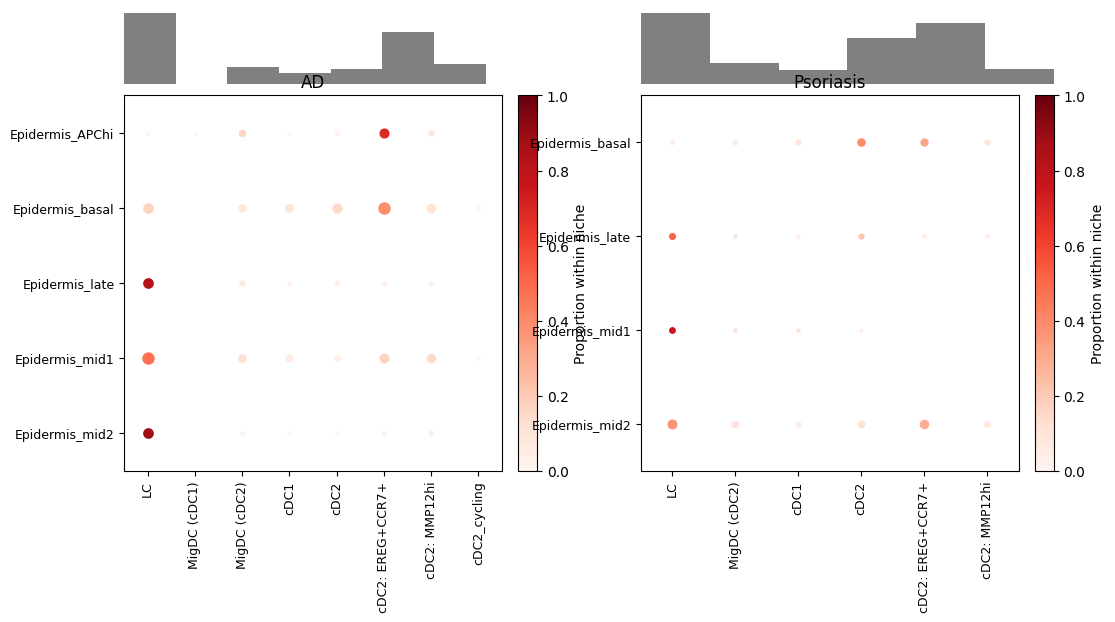

In [135]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

diseases = adata_5k.obs["disease_overall"].unique()

# --- create one big figure with N disease panels ---
fig = plt.figure(figsize=(6 * len(diseases), 6))  # width grows with number of diseases
outer_gs = gridspec.GridSpec(1, len(diseases), wspace=0.25)  # side by side

for idx, x in enumerate(diseases):
    adata_5k_iii = adata_5k_ii[adata_5k_ii.obs["disease_overall"] == x].copy()

    # --- counts ---
    counts = (
        adata_5k_iii.obs
        .groupby(["niche12", "lvl4_annotation"])
        .size()
        .reset_index(name="count")
    )

    heatmap_data = counts.pivot(
        index="niche12", columns="lvl4_annotation", values="count"
    ).fillna(0)
    prop_data = heatmap_data.div(heatmap_data.sum(axis=1), axis=0)

    dot_data = prop_data.reset_index().melt(
        id_vars="niche12", var_name="lvl4_annotation", value_name="prop"
    )
    counts_long = heatmap_data.reset_index().melt(
        id_vars="niche12", var_name="lvl4_annotation", value_name="count"
    )
    dot_data = dot_data.merge(counts_long, on=["niche12", "lvl4_annotation"])

    annotation_counts = (
        adata_5k_iii.obs["lvl4_annotation"]
        .value_counts()
        .reindex(heatmap_data.columns)
        .fillna(0)
    )

    # --- nested GridSpec for each disease block ---
    inner_gs = gridspec.GridSpecFromSubplotSpec(
        2, 1, subplot_spec=outer_gs[idx], height_ratios=[0.8, 4], hspace=0.05
    )
    ax_colbar = fig.add_subplot(inner_gs[0])
    ax_heat   = fig.add_subplot(inner_gs[1])

    # --- top barplot ---
    xx = np.arange(len(annotation_counts))
    ax_colbar.bar(xx, annotation_counts.values, color="gray", width=1, align="edge")
    ax_colbar.set_xlim(0, len(annotation_counts))
    ax_colbar.set_xticks([])
    ax_colbar.set_yticks([])
    ax_colbar.axis("off")

    # --- dotplot ---
    for i, niche in enumerate(prop_data.index):
        for j, annot in enumerate(prop_data.columns):
            val = dot_data.query("niche12 == @niche and lvl4_annotation == @annot")
            if not val.empty:
                prop = val["prop"].values[0]
                count = val["count"].values[0]
                ax_heat.scatter(
                    j+0.5, i+0.5,
                    s=(count**0.5)*4,
                    c=[[plt.cm.Reds(prop)]],
                    marker="o"
                )

    # aesthetics
    ax_heat.set_title(x, fontsize=12)  # label disease above
    ax_heat.set_xticks(np.arange(len(prop_data.columns)) + 0.5)
    ax_heat.set_xticklabels(prop_data.columns, rotation=90, fontsize=9)
    ax_heat.set_yticks(np.arange(len(prop_data.index)) + 0.5)
    ax_heat.set_yticklabels(prop_data.index, fontsize=9)
    ax_heat.set_xlim(0, len(prop_data.columns))
    ax_heat.set_ylim(0, len(prop_data.index))
    ax_heat.invert_yaxis()
    ax_heat.grid(False)

    # colorbar for each disease block
    sm = plt.cm.ScalarMappable(cmap=plt.cm.Reds, norm=plt.Normalize(vmin=0, vmax=1))
    cbar = plt.colorbar(sm, ax=ax_heat, fraction=0.046, pad=0.04)
    cbar.set_label("Proportion within niche")

plt.tight_layout()
plt.show()

/tmp/ipykernel_1987804/3025777127.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["niche12", "lvl4_annotation"])
/tmp/ipykernel_1987804/3025777127.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["niche12", "lvl4_annotation"])
/tmp/ipykernel_1987804/3025777127.py:87: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


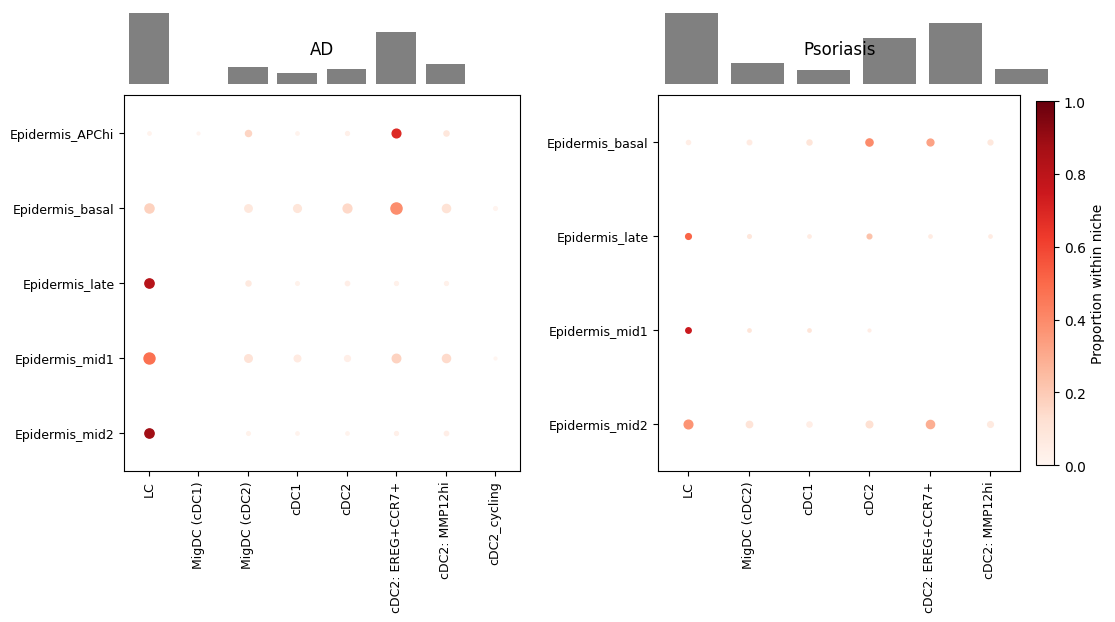

In [141]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

diseases = adata_5k.obs["disease_overall"].unique()

fig = plt.figure(figsize=(6 * len(diseases), 6))
outer_gs = gridspec.GridSpec(1, len(diseases), wspace=0.35)

for idx, x in enumerate(diseases):
    adata_5k_iii = adata_5k_ii[adata_5k_ii.obs["disease_overall"] == x].copy()

    # --- counts ---
    counts = (
        adata_5k_iii.obs
        .groupby(["niche12", "lvl4_annotation"])
        .size()
        .reset_index(name="count")
    )

    heatmap_data = counts.pivot(
        index="niche12", columns="lvl4_annotation", values="count"
    ).fillna(0)
    prop_data = heatmap_data.div(heatmap_data.sum(axis=1), axis=0)

    dot_data = prop_data.reset_index().melt(
        id_vars="niche12", var_name="lvl4_annotation", value_name="prop"
    )
    counts_long = heatmap_data.reset_index().melt(
        id_vars="niche12", var_name="lvl4_annotation", value_name="count"
    )
    dot_data = dot_data.merge(counts_long, on=["niche12", "lvl4_annotation"])

    annotation_counts = (
        adata_5k_iii.obs["lvl4_annotation"]
        .value_counts()
        .reindex(heatmap_data.columns)
        .fillna(0)
    )

    # --- nested gridspec ---
    inner_gs = gridspec.GridSpecFromSubplotSpec(
        2, 1, subplot_spec=outer_gs[idx], height_ratios=[0.8, 4], hspace=0.05
    )
    ax_colbar = fig.add_subplot(inner_gs[0])
    ax_heat   = fig.add_subplot(inner_gs[1])

    # --- top barplot (align with dotplot x axis) ---
    xx = np.arange(len(annotation_counts)) + 0.5  # center at tick positions
    ax_colbar.bar(xx, annotation_counts.values, color="gray", width=0.8, align="center")
    ax_colbar.set_xlim(0, len(annotation_counts))
    ax_colbar.set_xticks([])
    ax_colbar.set_yticks([])
    ax_colbar.axis("off")

    # --- dotplot ---
    for i, niche in enumerate(prop_data.index):
        for j, annot in enumerate(prop_data.columns):
            val = dot_data.query("niche12 == @niche and lvl4_annotation == @annot")
            if not val.empty:
                prop = val["prop"].values[0]
                count = val["count"].values[0]
                ax_heat.scatter(
                    j+0.5, i+0.5,
                    s=(count**0.5)*4,
                    c=[[plt.cm.Reds(prop)]],
                    marker="o"
                )

    # aesthetics
    ax_heat.set_title(x, fontsize=12, pad=30)  # pad pushes title up
    ax_heat.set_xticks(np.arange(len(prop_data.columns)) + 0.5)
    ax_heat.set_xticklabels(prop_data.columns, rotation=90, fontsize=9)
    ax_heat.set_yticks(np.arange(len(prop_data.index)) + 0.5)
    ax_heat.set_yticklabels(prop_data.index, fontsize=9)
    ax_heat.set_xlim(0, len(prop_data.columns))
    ax_heat.set_ylim(0, len(prop_data.index))
    ax_heat.invert_yaxis()
    ax_heat.grid(False)

    # only put colorbar on the *last* subplot
    if idx == len(diseases) - 1:
        sm = plt.cm.ScalarMappable(cmap=plt.cm.Reds, norm=plt.Normalize(vmin=0, vmax=1))
        cbar = plt.colorbar(sm, ax=ax_heat, fraction=0.046, pad=0.04)
        cbar.set_label("Proportion within niche")

plt.tight_layout()
plt.show()

/tmp/ipykernel_1987804/2056528218.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["niche12", "lvl4_annotation"])
/tmp/ipykernel_1987804/2056528218.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["niche12", "lvl4_annotation"])
/tmp/ipykernel_1987804/2056528218.py:118: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


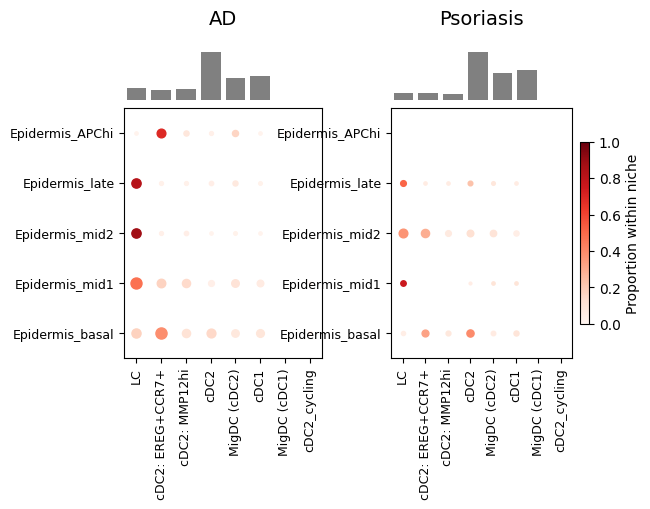

In [192]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

# desired orders
ytick_order = [
    'Epidermis_basal', 'Epidermis_mid1',
    'Epidermis_mid2', 'Epidermis_late', 'Epidermis_APChi'
]
ytick_order=ytick_order[::-1]

xtick_order = [
    'LC', 'cDC2: EREG+CCR7+', 'cDC2: MMP12hi',
    'cDC2', 'MigDC (cDC2)', 'cDC1','MigDC (cDC1)', 'cDC2_cycling'
]

diseases = adata_5k.obs["disease_overall"].unique()

fig = plt.figure(figsize=(3 * len(diseases), 4))
outer_gs = gridspec.GridSpec(1, len(diseases), wspace=0.35)

for idx, x in enumerate(diseases):
    adata_5k_iii = adata_5k_ii[adata_5k_ii.obs["disease_overall"] == x].copy()

    # --- counts ---
    counts = (
        adata_5k_iii.obs
        .groupby(["niche12", "lvl4_annotation"])
        .size()
        .reset_index(name="count")
    )

    heatmap_data = counts.pivot(
        index="niche12", columns="lvl4_annotation", values="count"
    ).fillna(0)

    # enforce desired orders
    heatmap_data = (
        heatmap_data
        .reindex(index=ytick_order)
        .reindex(columns=xtick_order)
        .fillna(0)
    )

    # proportions
    prop_data = heatmap_data.div(heatmap_data.sum(axis=1), axis=0).fillna(0)

    # long form
    dot_data = prop_data.reset_index().melt(
        id_vars="niche12", var_name="lvl4_annotation", value_name="prop"
    )
    counts_long = heatmap_data.reset_index().melt(
        id_vars="niche12", var_name="lvl4_annotation", value_name="count"
    )
    dot_data = dot_data.merge(counts_long, on=["niche12", "lvl4_annotation"])

    # --- annotation abundance (align with columns) ---
    annotation_counts = (
        adata_5k_iii.obs["lvl4_annotation"]
        .value_counts()
        .reindex(xtick_order)
        .fillna(0)
    )

    # --- nested gridspec ---
    inner_gs = gridspec.GridSpecFromSubplotSpec(
        2, 1, subplot_spec=outer_gs[idx], height_ratios=[0.8, 4], hspace=0.05
    )
    ax_colbar = fig.add_subplot(inner_gs[0])
    ax_heat   = fig.add_subplot(inner_gs[1])

    # --- top barplot ---
    xx = np.arange(len(annotation_counts)) + 0.5
    ax_colbar.bar(xx, annotation_counts.values, color="gray", width=0.8, align="center")
    ax_colbar.set_xlim(0, len(annotation_counts))
    ax_colbar.set_xticks([])
    ax_colbar.set_yticks([])
    ax_colbar.axis("off")

    # --- dotplot: iterate rows directly ---
    for _, row in dot_data.iterrows():
        niche = row["niche12"]
        annot = row["lvl4_annotation"]
        prop  = row["prop"]
        count = row["count"]

        if pd.isna(prop) or pd.isna(count):
            continue

        # x = annotation index, y = niche index
        j = xtick_order.index(annot)
        i = ytick_order.index(niche)

        ax_heat.scatter(
            j+0.5, i+0.5,
            s=(count**0.5)*4,
            c=[[plt.cm.Reds(prop)]],
            marker="o"
        )

    # aesthetics
    ax_heat.set_title(x, fontsize=14, pad=60)  # higher title
    ax_heat.set_xticks(np.arange(len(prop_data.columns)) + 0.5)
    ax_heat.set_xticklabels(prop_data.columns, rotation=90, fontsize=9)
    ax_heat.set_yticks(np.arange(len(prop_data.index)) + 0.5)
    ax_heat.set_yticklabels(prop_data.index, fontsize=9)
    ax_heat.set_xlim(0, len(prop_data.columns))
    ax_heat.set_ylim(0, len(prop_data.index))
    ax_heat.invert_yaxis()
    ax_heat.grid(False)

    # only put colorbar on the *last* subplot
    if idx == len(diseases) - 1:
        sm = plt.cm.ScalarMappable(cmap=plt.cm.Reds, norm=plt.Normalize(vmin=0, vmax=1))
        cbar = plt.colorbar(sm, ax=ax_heat, fraction=0.046, pad=0.04)
        cbar.set_label("Proportion within niche")

plt.tight_layout()
plt.show()

/tmp/ipykernel_1987804/1869182860.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["niche12", "lvl4_annotation"])
/tmp/ipykernel_1987804/1869182860.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["niche12", "lvl4_annotation"])
/tmp/ipykernel_1987804/1869182860.py:104: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


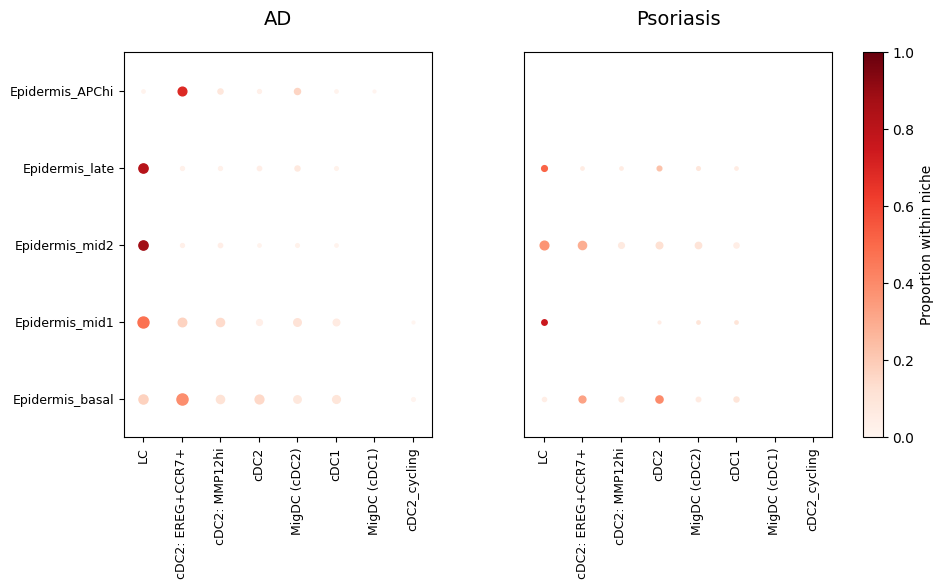

In [194]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

# Desired orders
ytick_order = [
    'Epidermis_basal', 'Epidermis_mid1',
    'Epidermis_mid2', 'Epidermis_late', 'Epidermis_APChi'
][::-1]

xtick_order = [
    'LC', 'cDC2: EREG+CCR7+', 'cDC2: MMP12hi',
    'cDC2', 'MigDC (cDC2)', 'cDC1','MigDC (cDC1)', 'cDC2_cycling'
]

diseases = adata_5k.obs["disease_overall"].unique()

# One row, two columns layout
fig = plt.figure(figsize=(10, 5))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1], wspace=0.3)

for idx, x in enumerate(diseases):
    adata_5k_iii = adata_5k_ii[adata_5k_ii.obs["disease_overall"] == x].copy()

    # --- counts ---
    counts = (
        adata_5k_iii.obs
        .groupby(["niche12", "lvl4_annotation"])
        .size()
        .reset_index(name="count")
    )

    heatmap_data = counts.pivot(
        index="niche12", columns="lvl4_annotation", values="count"
    ).fillna(0)

    # Enforce desired orders
    heatmap_data = (
        heatmap_data
        .reindex(index=ytick_order)
        .reindex(columns=xtick_order)
        .fillna(0)
    )

    # Proportions
    prop_data = heatmap_data.div(heatmap_data.sum(axis=1), axis=0).fillna(0)

    # Long form
    dot_data = prop_data.reset_index().melt(
        id_vars="niche12", var_name="lvl4_annotation", value_name="prop"
    )
    counts_long = heatmap_data.reset_index().melt(
        id_vars="niche12", var_name="lvl4_annotation", value_name="count"
    )
    dot_data = dot_data.merge(counts_long, on=["niche12", "lvl4_annotation"])

    # --- nested gridspec: one plot per disease ---
    ax_heat = fig.add_subplot(gs[idx])

    # --- dotplot ---
    for _, row in dot_data.iterrows():
        niche = row["niche12"]
        annot = row["lvl4_annotation"]
        prop  = row["prop"]
        count = row["count"]

        if pd.isna(prop) or pd.isna(count):
            continue

        j = xtick_order.index(annot)
        i = ytick_order.index(niche)

        ax_heat.scatter(
            j+0.5, i+0.5,
            s=(count**0.5)*4,
            c=[[plt.cm.Reds(prop)]],
            marker="o"
        )

    # Aesthetics
    ax_heat.set_title(x, fontsize=14, pad=20)
    ax_heat.set_xlim(0, len(prop_data.columns))
    ax_heat.set_ylim(0, len(prop_data.index))
    ax_heat.invert_yaxis()
    ax_heat.grid(False)

    # Left plot keeps y-axis labels, right plot hides them
    if idx == 0:
        ax_heat.set_yticks(np.arange(len(prop_data.index)) + 0.5)
        ax_heat.set_yticklabels(prop_data.index, fontsize=9)
        ax_heat.set_xticks(np.arange(len(prop_data.columns)) + 0.5)
        ax_heat.set_xticklabels(prop_data.columns, rotation=90, fontsize=9)
    else:
        ax_heat.set_yticks([])
        ax_heat.set_yticklabels([])
        ax_heat.set_xticks(np.arange(len(prop_data.columns)) + 0.5)
        ax_heat.set_xticklabels(prop_data.columns, rotation=90, fontsize=9)

# Shared colorbar on the right
sm = plt.cm.ScalarMappable(cmap=plt.cm.Reds, norm=plt.Normalize(vmin=0, vmax=1))
cbar = plt.colorbar(sm, ax=fig.get_axes(), fraction=0.046, pad=0.04)
cbar.set_label("Proportion within niche")

plt.tight_layout()
plt.show()

/tmp/ipykernel_1987804/2401484032.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["niche12", "lvl4_annotation"])
/tmp/ipykernel_1987804/2401484032.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["niche12", "lvl4_annotation"])
/tmp/ipykernel_1987804/2401484032.py:115: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # leave room for colorbar


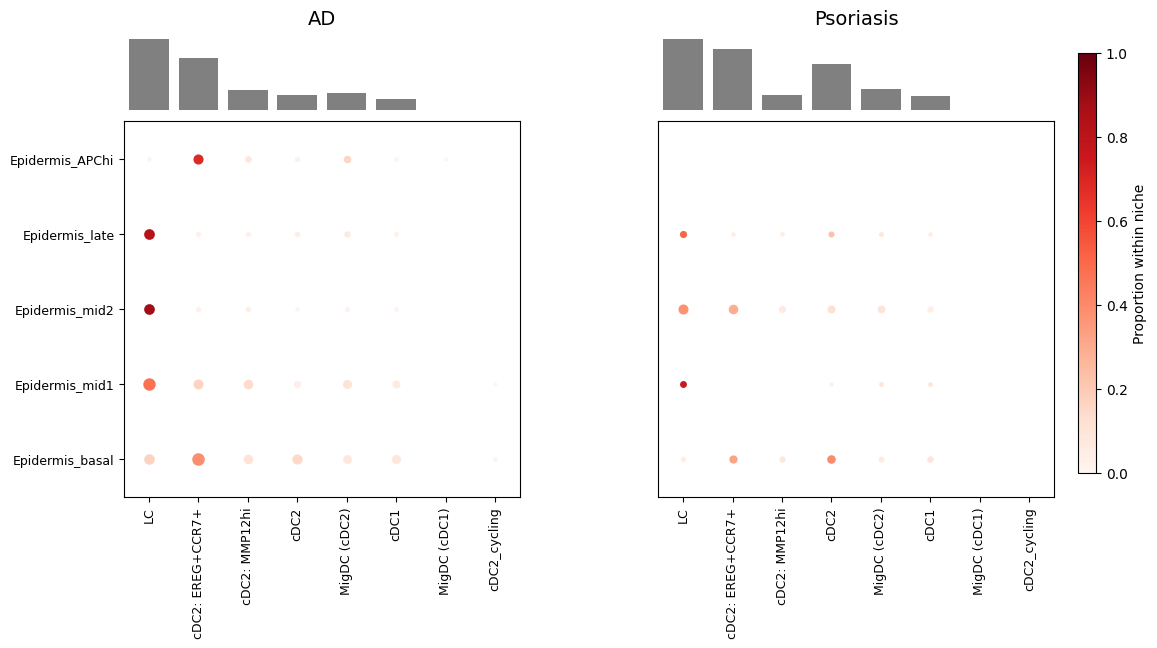

In [195]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec

# Desired orders
ytick_order = [
    'Epidermis_basal', 'Epidermis_mid1',
    'Epidermis_mid2', 'Epidermis_late', 'Epidermis_APChi'
][::-1]

xtick_order = [
    'LC', 'cDC2: EREG+CCR7+', 'cDC2: MMP12hi',
    'cDC2', 'MigDC (cDC2)', 'cDC1','MigDC (cDC1)', 'cDC2_cycling'
]

diseases = adata_5k.obs["disease_overall"].unique()

fig = plt.figure(figsize=(6 * len(diseases), 6))
outer_gs = gridspec.GridSpec(1, len(diseases), wspace=0.35)

for idx, x in enumerate(diseases):
    adata_5k_iii = adata_5k_ii[adata_5k_ii.obs["disease_overall"] == x].copy()

    # --- counts ---
    counts = (
        adata_5k_iii.obs
        .groupby(["niche12", "lvl4_annotation"])
        .size()
        .reset_index(name="count")
    )

    heatmap_data = counts.pivot(
        index="niche12", columns="lvl4_annotation", values="count"
    ).fillna(0)

    # enforce desired orders
    heatmap_data = (
        heatmap_data
        .reindex(index=ytick_order)
        .reindex(columns=xtick_order)
        .fillna(0)
    )

    # proportions
    prop_data = heatmap_data.div(heatmap_data.sum(axis=1), axis=0).fillna(0)

    # long form
    dot_data = prop_data.reset_index().melt(
        id_vars="niche12", var_name="lvl4_annotation", value_name="prop"
    )
    counts_long = heatmap_data.reset_index().melt(
        id_vars="niche12", var_name="lvl4_annotation", value_name="count"
    )
    dot_data = dot_data.merge(counts_long, on=["niche12", "lvl4_annotation"])

    # --- nested gridspec ---
    inner_gs = gridspec.GridSpecFromSubplotSpec(
        2, 1, subplot_spec=outer_gs[idx], height_ratios=[0.8, 4], hspace=0.05
    )
    ax_colbar = fig.add_subplot(inner_gs[0])
    ax_heat   = fig.add_subplot(inner_gs[1])

    # --- top barplot ---
    xx = np.arange(len(xtick_order)) + 0.5
    ax_colbar.bar(xx, heatmap_data.sum(axis=0).values, color="gray", width=0.8, align="center")
    ax_colbar.set_xlim(0, len(xtick_order))
    ax_colbar.set_xticks([])
    ax_colbar.set_yticks([])
    ax_colbar.axis("off")

    # --- dotplot ---
    for _, row in dot_data.iterrows():
        niche = row["niche12"]
        annot = row["lvl4_annotation"]
        prop  = row["prop"]
        count = row["count"]

        if pd.isna(prop) or pd.isna(count):
            continue

        j = xtick_order.index(annot)
        i = ytick_order.index(niche)

        ax_heat.scatter(
            j+0.5, i+0.5,
            s=(count**0.5)*4,
            c=[[plt.cm.Reds(prop)]],
            marker="o"
        )

    # aesthetics
    ax_heat.set_title(x, fontsize=14, pad=70)  # higher title
    ax_heat.set_xticks(np.arange(len(prop_data.columns)) + 0.5)
    ax_heat.set_xticklabels(prop_data.columns, rotation=90, fontsize=9)
    ax_heat.set_xlim(0, len(prop_data.columns))
    ax_heat.set_ylim(0, len(prop_data.index))
    ax_heat.invert_yaxis()
    ax_heat.grid(False)

    # Remove y-axis labels/ticks for right plots (all except first)
    if idx == 0:
        ax_heat.set_yticks(np.arange(len(prop_data.index)) + 0.5)
        ax_heat.set_yticklabels(prop_data.index, fontsize=9)
    else:
        ax_heat.set_yticks([])
        ax_heat.set_yticklabels([])

# Shared colorbar
cax = fig.add_axes([0.92, 0.15, 0.015, 0.7])
sm = plt.cm.ScalarMappable(cmap=plt.cm.Reds, norm=plt.Normalize(vmin=0, vmax=1))
cbar = fig.colorbar(sm, cax=cax)
cbar.set_label("Proportion within niche")

plt.tight_layout(rect=[0, 0, 0.9, 1])  # leave room for colorbar
plt.show()

/tmp/ipykernel_1987804/2355204515.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["niche12", "lvl4_annotation"])
/tmp/ipykernel_1987804/2355204515.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["niche12", "lvl4_annotation"])
/tmp/ipykernel_1987804/2355204515.py:128: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.93, 1])


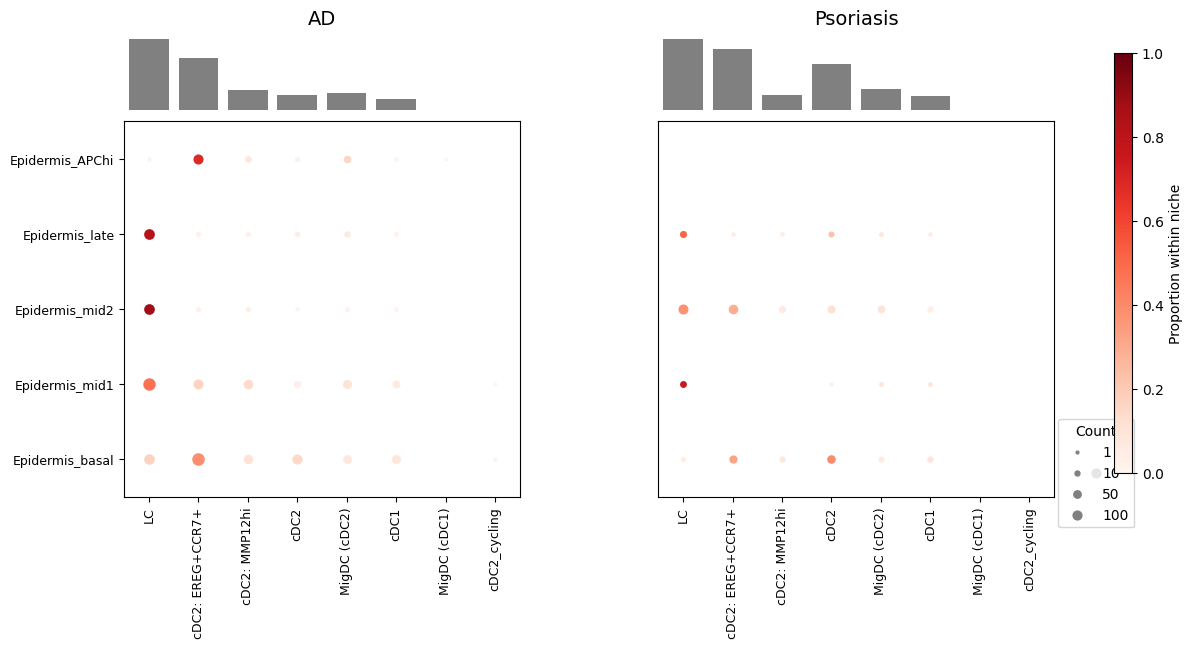

In [196]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec

# Desired orders
ytick_order = [
    'Epidermis_basal', 'Epidermis_mid1',
    'Epidermis_mid2', 'Epidermis_late', 'Epidermis_APChi'
][::-1]

xtick_order = [
    'LC', 'cDC2: EREG+CCR7+', 'cDC2: MMP12hi',
    'cDC2', 'MigDC (cDC2)', 'cDC1','MigDC (cDC1)', 'cDC2_cycling'
]

diseases = adata_5k.obs["disease_overall"].unique()

fig = plt.figure(figsize=(6 * len(diseases), 6))
outer_gs = gridspec.GridSpec(1, len(diseases), wspace=0.35)

for idx, x in enumerate(diseases):
    adata_5k_iii = adata_5k_ii[adata_5k_ii.obs["disease_overall"] == x].copy()

    # --- counts ---
    counts = (
        adata_5k_iii.obs
        .groupby(["niche12", "lvl4_annotation"])
        .size()
        .reset_index(name="count")
    )

    heatmap_data = counts.pivot(
        index="niche12", columns="lvl4_annotation", values="count"
    ).fillna(0)

    # enforce desired orders
    heatmap_data = (
        heatmap_data
        .reindex(index=ytick_order)
        .reindex(columns=xtick_order)
        .fillna(0)
    )

    # proportions
    prop_data = heatmap_data.div(heatmap_data.sum(axis=1), axis=0).fillna(0)

    # long form
    dot_data = prop_data.reset_index().melt(
        id_vars="niche12", var_name="lvl4_annotation", value_name="prop"
    )
    counts_long = heatmap_data.reset_index().melt(
        id_vars="niche12", var_name="lvl4_annotation", value_name="count"
    )
    dot_data = dot_data.merge(counts_long, on=["niche12", "lvl4_annotation"])

    # --- nested gridspec ---
    inner_gs = gridspec.GridSpecFromSubplotSpec(
        2, 1, subplot_spec=outer_gs[idx], height_ratios=[0.8, 4], hspace=0.05
    )
    ax_colbar = fig.add_subplot(inner_gs[0])
    ax_heat   = fig.add_subplot(inner_gs[1])

    # --- top barplot ---
    xx = np.arange(len(xtick_order)) + 0.5
    ax_colbar.bar(xx, heatmap_data.sum(axis=0).values, color="gray", width=0.8, align="center")
    ax_colbar.set_xlim(0, len(xtick_order))
    ax_colbar.set_xticks([])
    ax_colbar.set_yticks([])
    ax_colbar.axis("off")

    # --- dotplot ---
    for _, row in dot_data.iterrows():
        niche = row["niche12"]
        annot = row["lvl4_annotation"]
        prop  = row["prop"]
        count = row["count"]

        if pd.isna(prop) or pd.isna(count):
            continue

        j = xtick_order.index(annot)
        i = ytick_order.index(niche)

        ax_heat.scatter(
            j+0.5, i+0.5,
            s=(count**0.5)*4,
            c=[[plt.cm.Reds(prop)]],
            marker="o"
        )

    # aesthetics
    ax_heat.set_title(x, fontsize=14, pad=70)
    ax_heat.set_xticks(np.arange(len(prop_data.columns)) + 0.5)
    ax_heat.set_xticklabels(prop_data.columns, rotation=90, fontsize=9)
    ax_heat.set_xlim(0, len(prop_data.columns))
    ax_heat.set_ylim(0, len(prop_data.index))
    ax_heat.invert_yaxis()
    ax_heat.grid(False)

    # Remove y-axis labels/ticks for right plots (all except first)
    if idx == 0:
        ax_heat.set_yticks(np.arange(len(prop_data.index)) + 0.5)
        ax_heat.set_yticklabels(prop_data.index, fontsize=9)
    else:
        ax_heat.set_yticks([])
        ax_heat.set_yticklabels([])

# --- add dot size legend ---
# pick representative counts
example_counts = [1, 10, 50, 100]  # adjust to your data range
sizes = [(c**0.5)*4 for c in example_counts]
labels = [str(c) for c in example_counts]

# place outside the heatmaps
ax_size_legend = fig.add_axes([0.92, 0.05, 0.03, 0.2])  # [left, bottom, width, height]
for s, l in zip(sizes, labels):
    ax_size_legend.scatter([0], [0], s=s, c='gray', label=l)
ax_size_legend.legend(title="Count", loc='center', fontsize=10)
ax_size_legend.axis('off')

# Shared colorbar
cax = fig.add_axes([0.95, 0.15, 0.015, 0.7])
sm = plt.cm.ScalarMappable(cmap=plt.cm.Reds, norm=plt.Normalize(vmin=0, vmax=1))
cbar = fig.colorbar(sm, cax=cax)
cbar.set_label("Proportion within niche")

plt.tight_layout(rect=[0, 0, 0.93, 1])
plt.show()



/tmp/ipykernel_1987804/2204249229.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["niche12", "lvl4_annotation"])
/tmp/ipykernel_1987804/2204249229.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["niche12", "lvl4_annotation"])
/tmp/ipykernel_1987804/2204249229.py:119: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.93, 1])


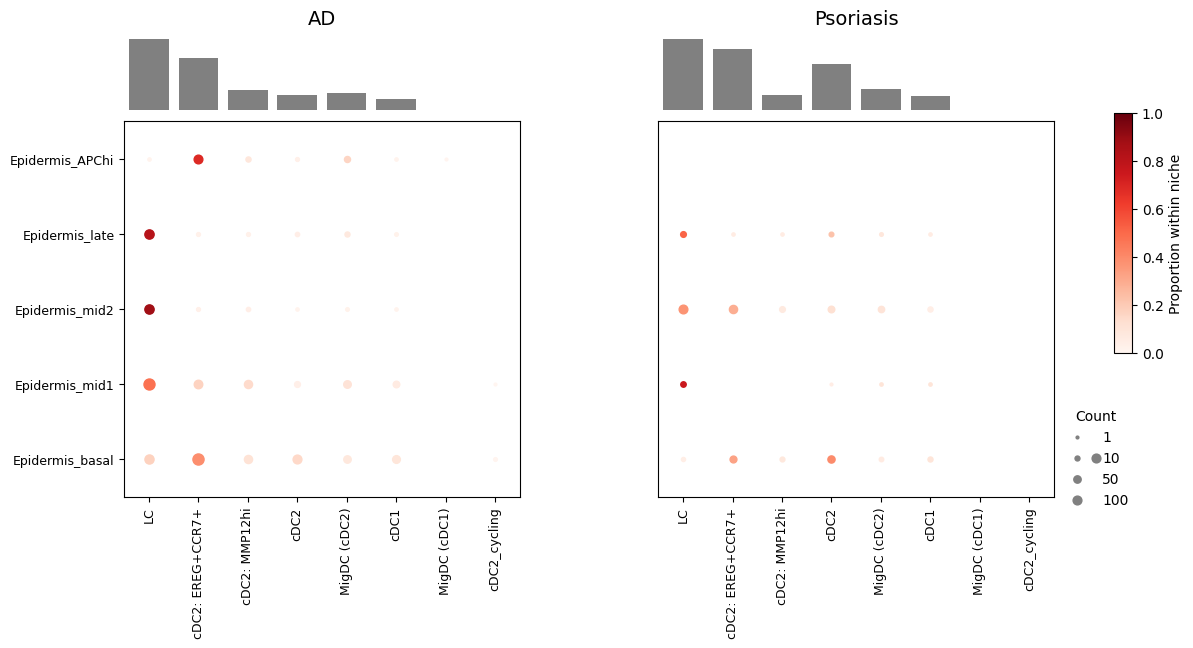

In [197]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec

# Desired orders
ytick_order = [
    'Epidermis_basal', 'Epidermis_mid1',
    'Epidermis_mid2', 'Epidermis_late', 'Epidermis_APChi'
][::-1]

xtick_order = [
    'LC', 'cDC2: EREG+CCR7+', 'cDC2: MMP12hi',
    'cDC2', 'MigDC (cDC2)', 'cDC1','MigDC (cDC1)', 'cDC2_cycling'
]

diseases = adata_5k.obs["disease_overall"].unique()

fig = plt.figure(figsize=(6 * len(diseases), 6))
outer_gs = gridspec.GridSpec(1, len(diseases), wspace=0.35)

for idx, x in enumerate(diseases):
    adata_5k_iii = adata_5k_ii[adata_5k_ii.obs["disease_overall"] == x].copy()

    # --- counts ---
    counts = (
        adata_5k_iii.obs
        .groupby(["niche12", "lvl4_annotation"])
        .size()
        .reset_index(name="count")
    )

    heatmap_data = counts.pivot(
        index="niche12", columns="lvl4_annotation", values="count"
    ).fillna(0)

    heatmap_data = (
        heatmap_data
        .reindex(index=ytick_order)
        .reindex(columns=xtick_order)
        .fillna(0)
    )

    prop_data = heatmap_data.div(heatmap_data.sum(axis=1), axis=0).fillna(0)

    dot_data = prop_data.reset_index().melt(
        id_vars="niche12", var_name="lvl4_annotation", value_name="prop"
    )
    counts_long = heatmap_data.reset_index().melt(
        id_vars="niche12", var_name="lvl4_annotation", value_name="count"
    )
    dot_data = dot_data.merge(counts_long, on=["niche12", "lvl4_annotation"])

    inner_gs = gridspec.GridSpecFromSubplotSpec(
        2, 1, subplot_spec=outer_gs[idx], height_ratios=[0.8, 4], hspace=0.05
    )
    ax_colbar = fig.add_subplot(inner_gs[0])
    ax_heat   = fig.add_subplot(inner_gs[1])

    # --- top barplot ---
    xx = np.arange(len(xtick_order)) + 0.5
    ax_colbar.bar(xx, heatmap_data.sum(axis=0).values, color="gray", width=0.8, align="center")
    ax_colbar.set_xlim(0, len(xtick_order))
    ax_colbar.axis("off")

    # --- dotplot ---
    for _, row in dot_data.iterrows():
        niche = row["niche12"]
        annot = row["lvl4_annotation"]
        prop  = row["prop"]
        count = row["count"]

        if pd.isna(prop) or pd.isna(count):
            continue

        j = xtick_order.index(annot)
        i = ytick_order.index(niche)

        ax_heat.scatter(
            j+0.5, i+0.5,
            s=(count**0.5)*4,
            c=[[plt.cm.Reds(prop)]],
            marker="o"
        )

    # aesthetics
    ax_heat.set_title(x, fontsize=14, pad=70)
    ax_heat.set_xticks(np.arange(len(prop_data.columns)) + 0.5)
    ax_heat.set_xticklabels(prop_data.columns, rotation=90, fontsize=9)
    ax_heat.set_xlim(0, len(prop_data.columns))
    ax_heat.set_ylim(0, len(prop_data.index))
    ax_heat.invert_yaxis()
    ax_heat.grid(False)

    if idx == 0:
        ax_heat.set_yticks(np.arange(len(prop_data.index)) + 0.5)
        ax_heat.set_yticklabels(prop_data.index, fontsize=9)
    else:
        ax_heat.set_yticks([])
        ax_heat.set_yticklabels([])

# --- dot size legend ---
example_counts = [1, 10, 50, 100]
sizes = [(c**0.5)*4 for c in example_counts]
labels = [str(c) for c in example_counts]

ax_size_legend = fig.add_axes([0.92, 0.1, 0.03, 0.15])  # adjusted position
for s, l in zip(sizes, labels):
    ax_size_legend.scatter([0], [0], s=s, c='gray', label=l)
ax_size_legend.legend(title="Count", loc='center', fontsize=10, frameon=False)  # no box
ax_size_legend.axis('off')

# --- smaller colorbar ---
cax = fig.add_axes([0.95, 0.35, 0.015, 0.4])  # reduced height and moved up
sm = plt.cm.ScalarMappable(cmap=plt.cm.Reds, norm=plt.Normalize(vmin=0, vmax=1))
cbar = fig.colorbar(sm, cax=cax)
cbar.set_label("Proportion within niche")

plt.tight_layout(rect=[0, 0, 0.93, 1])
plt.show()

/tmp/ipykernel_1987804/4044106809.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["niche12", "lvl4_annotation"])
/tmp/ipykernel_1987804/4044106809.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["niche12", "lvl4_annotation"])
/tmp/ipykernel_1987804/4044106809.py:127: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.93, 1])


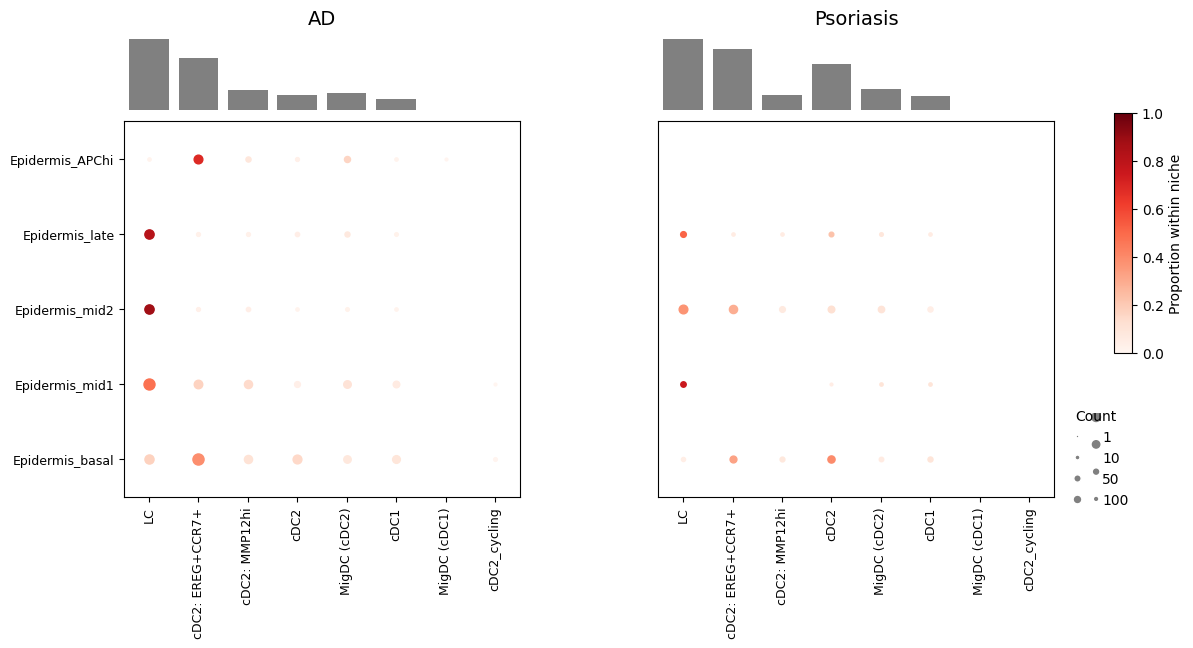

In [198]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib.lines import Line2D

# Desired orders
ytick_order = [
    'Epidermis_basal', 'Epidermis_mid1',
    'Epidermis_mid2', 'Epidermis_late', 'Epidermis_APChi'
][::-1]

xtick_order = [
    'LC', 'cDC2: EREG+CCR7+', 'cDC2: MMP12hi',
    'cDC2', 'MigDC (cDC2)', 'cDC1','MigDC (cDC1)', 'cDC2_cycling'
]

diseases = adata_5k.obs["disease_overall"].unique()

fig = plt.figure(figsize=(6 * len(diseases), 6))
outer_gs = gridspec.GridSpec(1, len(diseases), wspace=0.35)

for idx, x in enumerate(diseases):
    adata_5k_iii = adata_5k_ii[adata_5k_ii.obs["disease_overall"] == x].copy()

    # --- counts ---
    counts = (
        adata_5k_iii.obs
        .groupby(["niche12", "lvl4_annotation"])
        .size()
        .reset_index(name="count")
    )

    heatmap_data = counts.pivot(
        index="niche12", columns="lvl4_annotation", values="count"
    ).fillna(0)

    heatmap_data = (
        heatmap_data
        .reindex(index=ytick_order)
        .reindex(columns=xtick_order)
        .fillna(0)
    )

    prop_data = heatmap_data.div(heatmap_data.sum(axis=1), axis=0).fillna(0)

    dot_data = prop_data.reset_index().melt(
        id_vars="niche12", var_name="lvl4_annotation", value_name="prop"
    )
    counts_long = heatmap_data.reset_index().melt(
        id_vars="niche12", var_name="lvl4_annotation", value_name="count"
    )
    dot_data = dot_data.merge(counts_long, on=["niche12", "lvl4_annotation"])

    inner_gs = gridspec.GridSpecFromSubplotSpec(
        2, 1, subplot_spec=outer_gs[idx], height_ratios=[0.8, 4], hspace=0.05
    )
    ax_colbar = fig.add_subplot(inner_gs[0])
    ax_heat   = fig.add_subplot(inner_gs[1])

    # --- top barplot ---
    xx = np.arange(len(xtick_order)) + 0.5
    ax_colbar.bar(xx, heatmap_data.sum(axis=0).values, color="gray", width=0.8, align="center")
    ax_colbar.set_xlim(0, len(xtick_order))
    ax_colbar.axis("off")

    # --- dotplot ---
    for _, row in dot_data.iterrows():
        niche = row["niche12"]
        annot = row["lvl4_annotation"]
        prop  = row["prop"]
        count = row["count"]

        if pd.isna(prop) or pd.isna(count):
            continue

        j = xtick_order.index(annot)
        i = ytick_order.index(niche)

        ax_heat.scatter(
            j+0.5, i+0.5,
            s=(count**0.5)*4,
            c=[[plt.cm.Reds(prop)]],
            marker="o"
        )

    # aesthetics
    ax_heat.set_title(x, fontsize=14, pad=70)
    ax_heat.set_xticks(np.arange(len(prop_data.columns)) + 0.5)
    ax_heat.set_xticklabels(prop_data.columns, rotation=90, fontsize=9)
    ax_heat.set_xlim(0, len(prop_data.columns))
    ax_heat.set_ylim(0, len(prop_data.index))
    ax_heat.invert_yaxis()
    ax_heat.grid(False)

    # y-axis labels only on first plot
    if idx == 0:
        ax_heat.set_yticks(np.arange(len(prop_data.index)) + 0.5)
        ax_heat.set_yticklabels(prop_data.index, fontsize=9)
    else:
        ax_heat.set_yticks([])
        ax_heat.set_yticklabels([])

# --- dot size legend ---
example_counts = [1, 10, 50, 100]
sizes = [(c**0.5)*4 for c in example_counts]
labels = [str(c) for c in example_counts]
y_positions = np.arange(len(sizes))

ax_size_legend = fig.add_axes([0.92, 0.1, 0.03, 0.15])
ax_size_legend.scatter(
    np.zeros(len(sizes)), y_positions,
    s=sizes, c='gray'
)
handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor='gray',
                  markersize=np.sqrt(sz), label=lbl) 
           for sz, lbl in zip(sizes, labels)]
ax_size_legend.legend(handles=handles, title="Count", loc='center', fontsize=10, frameon=False)
ax_size_legend.axis('off')

# --- smaller colorbar ---
cax = fig.add_axes([0.95, 0.35, 0.015, 0.4])
sm = plt.cm.ScalarMappable(cmap=plt.cm.Reds, norm=plt.Normalize(vmin=0, vmax=1))
cbar = plt.colorbar(sm, cax=cax)
cbar.set_label("Proportion within niche")

plt.tight_layout(rect=[0, 0, 0.93, 1])
plt.show()

/tmp/ipykernel_1987804/3736538783.py:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["niche12", "lvl4_annotation"])
/tmp/ipykernel_1987804/3736538783.py:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["niche12", "lvl4_annotation"])
/tmp/ipykernel_1987804/3736538783.py:132: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.93, 1])


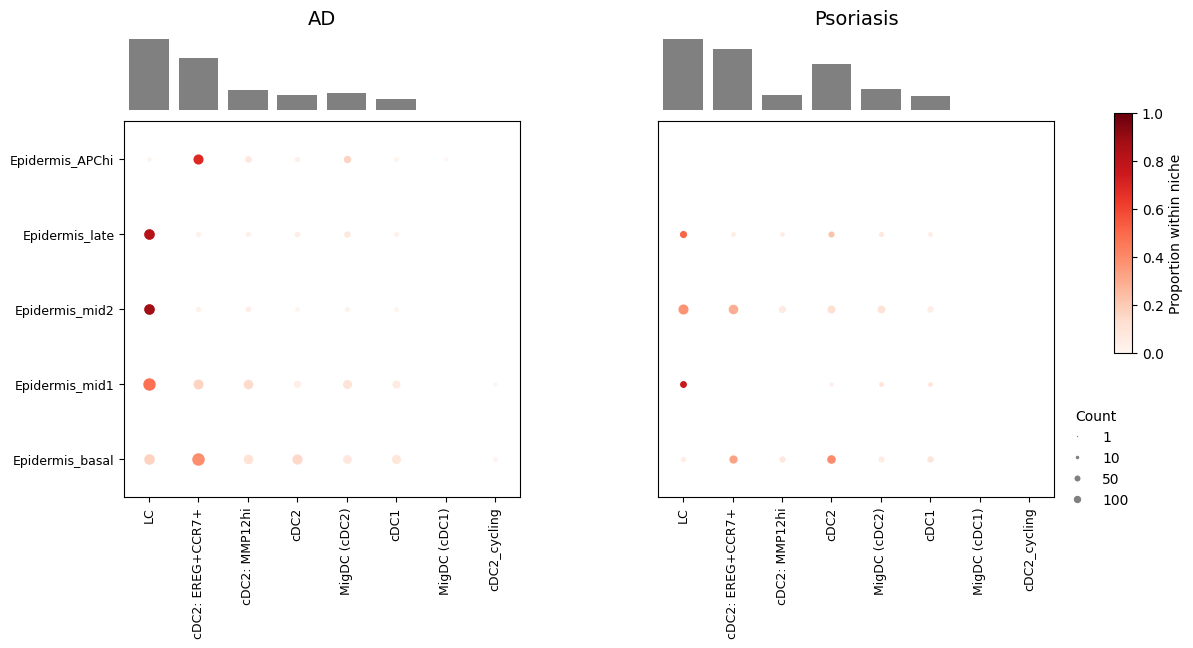

In [201]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib.lines import Line2D

# Desired orders
ytick_order = [
    'Epidermis_basal', 'Epidermis_mid1',
    'Epidermis_mid2', 'Epidermis_late', 'Epidermis_APChi'
][::-1]

xtick_order = [
    'LC', 'cDC2: EREG+CCR7+', 'cDC2: MMP12hi',
    'cDC2', 'MigDC (cDC2)', 'cDC1','MigDC (cDC1)', 'cDC2_cycling'
]

diseases = adata_5k.obs["disease_overall"].unique()

# Figure
fig = plt.figure(figsize=(6 * len(diseases), 6))
outer_gs = gridspec.GridSpec(1, len(diseases), wspace=0.35)

# Track max count across all subplots for legend scaling
all_counts = []

for idx, x in enumerate(diseases):
    adata_5k_iii = adata_5k_ii[adata_5k_ii.obs["disease_overall"] == x].copy()

    # --- counts ---
    counts = (
        adata_5k_iii.obs
        .groupby(["niche12", "lvl4_annotation"])
        .size()
        .reset_index(name="count")
    )

    heatmap_data = counts.pivot(
        index="niche12", columns="lvl4_annotation", values="count"
    ).fillna(0)

    heatmap_data = (
        heatmap_data
        .reindex(index=ytick_order)
        .reindex(columns=xtick_order)
        .fillna(0)
    )

    prop_data = heatmap_data.div(heatmap_data.sum(axis=1), axis=0).fillna(0)

    dot_data = prop_data.reset_index().melt(
        id_vars="niche12", var_name="lvl4_annotation", value_name="prop"
    )
    counts_long = heatmap_data.reset_index().melt(
        id_vars="niche12", var_name="lvl4_annotation", value_name="count"
    )
    dot_data = dot_data.merge(counts_long, on=["niche12", "lvl4_annotation"])

    # Keep track of counts
    all_counts.extend(dot_data["count"].values)

    # --- nested gridspec ---
    inner_gs = gridspec.GridSpecFromSubplotSpec(
        2, 1, subplot_spec=outer_gs[idx], height_ratios=[0.8, 4], hspace=0.05
    )
    ax_colbar = fig.add_subplot(inner_gs[0])
    ax_heat   = fig.add_subplot(inner_gs[1])

    # --- top barplot ---
    xx = np.arange(len(xtick_order)) + 0.5
    ax_colbar.bar(xx, heatmap_data.sum(axis=0).values, color="gray", width=0.8, align="center")
    ax_colbar.set_xlim(0, len(xtick_order))
    ax_colbar.axis("off")

    # --- dotplot ---
    for _, row in dot_data.iterrows():
        niche = row["niche12"]
        annot = row["lvl4_annotation"]
        prop  = row["prop"]
        count = row["count"]

        if pd.isna(prop) or pd.isna(count):
            continue

        j = xtick_order.index(annot)
        i = ytick_order.index(niche)

        ax_heat.scatter(
            j+0.5, i+0.5,
            s=(count**0.5)*4,   # area
            c=[[plt.cm.Reds(prop)]],
            marker="o"
        )

    # aesthetics
    ax_heat.set_title(x, fontsize=14, pad=70)
    ax_heat.set_xticks(np.arange(len(prop_data.columns)) + 0.5)
    ax_heat.set_xticklabels(prop_data.columns, rotation=90, fontsize=9)
    ax_heat.set_xlim(0, len(prop_data.columns))
    ax_heat.set_ylim(0, len(prop_data.index))
    ax_heat.invert_yaxis()
    ax_heat.grid(False)

    # y-axis labels only on first plot
    if idx == 0:
        ax_heat.set_yticks(np.arange(len(prop_data.index)) + 0.5)
        ax_heat.set_yticklabels(prop_data.index, fontsize=9)
    else:
        ax_heat.set_yticks([])
        ax_heat.set_yticklabels([])

# --- dot size legend ---
example_counts = [1, 10, 50, 100]
sizes = [(c**0.5)*4 for c in example_counts]  # match scatter
diameters = [np.sqrt(s) for s in sizes]       # convert area -> marker diameter

ax_size_legend = fig.add_axes([0.92, 0.1, 0.03, 0.15])
handles = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='gray',
           markersize=d, label=str(c))
    for d, c in zip(diameters, example_counts)
]
ax_size_legend.legend(handles=handles, title="Count", loc='center', fontsize=10, frameon=False)
ax_size_legend.axis('off')

# --- smaller colorbar ---
cax = fig.add_axes([0.95, 0.35, 0.015, 0.4])
sm = plt.cm.ScalarMappable(cmap=plt.cm.Reds, norm=plt.Normalize(vmin=0, vmax=1))
cbar = plt.colorbar(sm, cax=cax)
cbar.set_label("Proportion within niche")

plt.tight_layout(rect=[0, 0, 0.93, 1])
plt.show()

In [203]:
adata_5k_ii.obs.lvl4_annotation.value_counts()

lvl4_annotation
cDC2                4020
cDC1                2161
MigDC (cDC2)        2008
TRM_IL13+           1081
LC                   871
cDC2: MMP12hi        852
cDC2: EREG+CCR7+     776
T_Prolif             587
TRM_IL17+            435
ILC3                  54
T_γδ                  48
ILC2                  48
ILC1                  40
ILC3_CCL1+PTGDS+      36
ILC_prolif            11
Monocyte               9
MigDC (cDC1)           9
cDC2_cycling           7
Name: count, dtype: int64

/tmp/ipykernel_1987804/3959200161.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["niche12", "lvl4_annotation"])
/tmp/ipykernel_1987804/3959200161.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["niche12", "lvl4_annotation"])
/tmp/ipykernel_1987804/3959200161.py:79: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


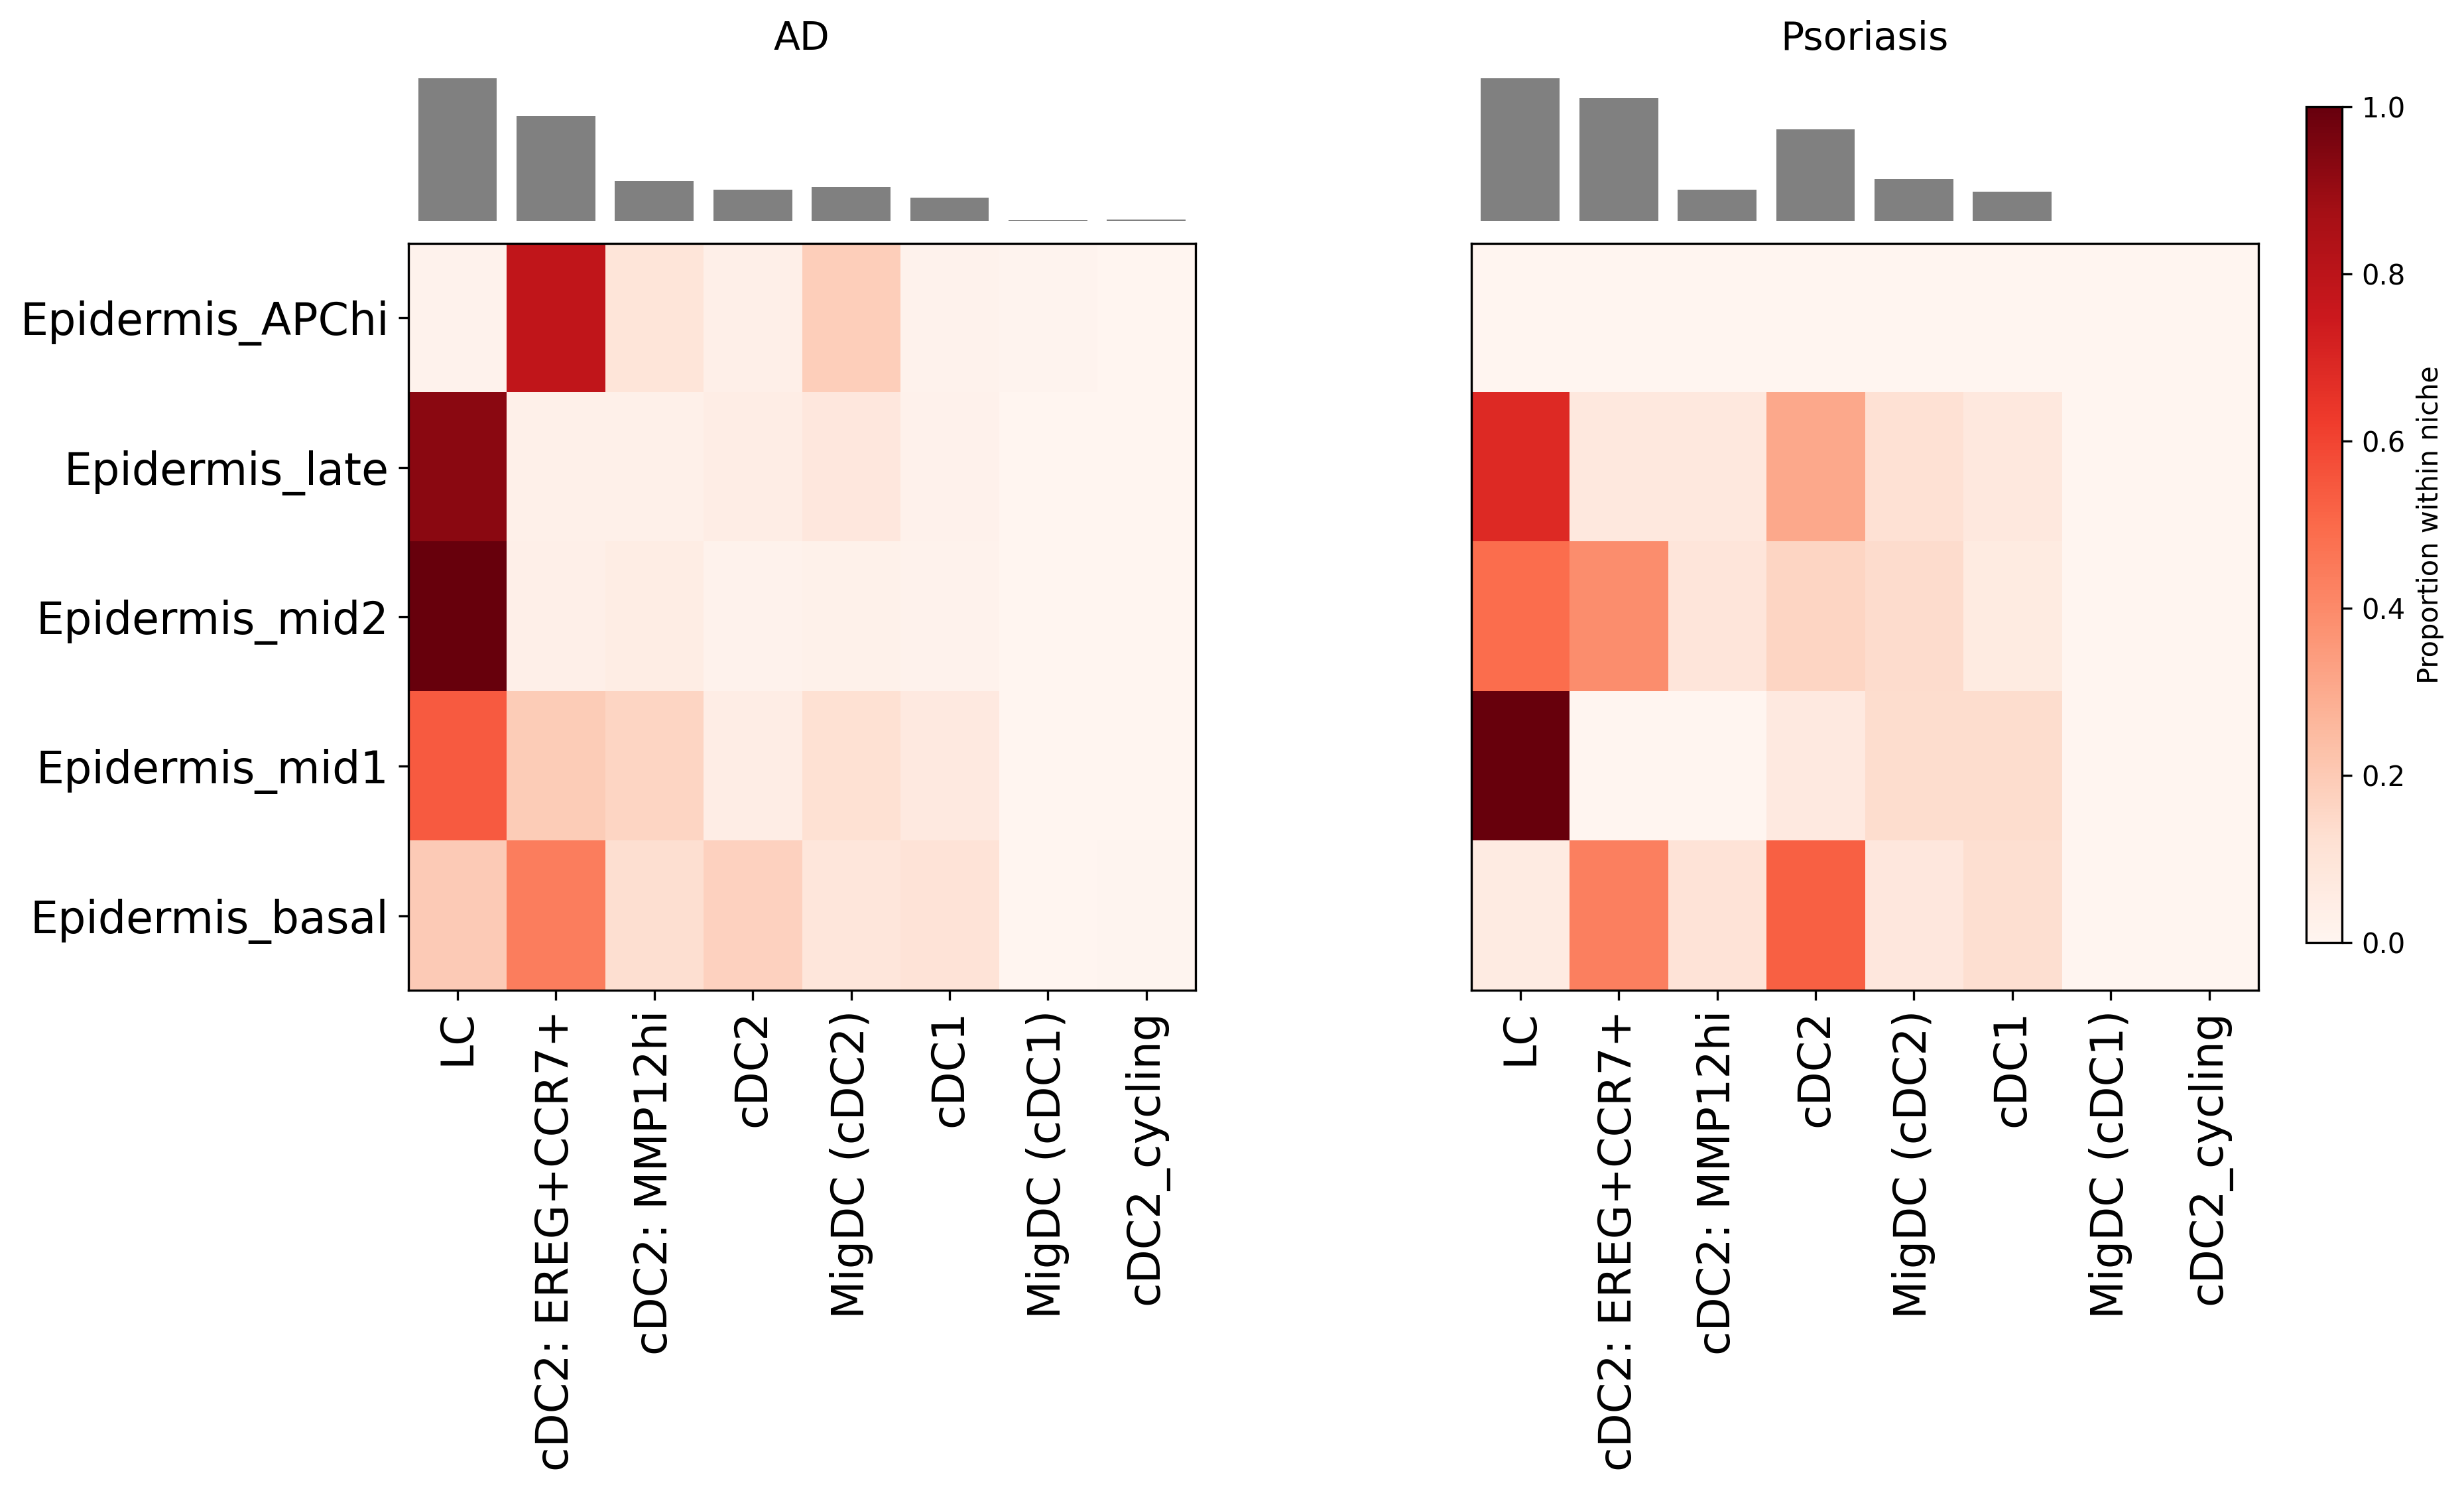

In [205]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec

# Desired orders
ytick_order = [
    'Epidermis_basal', 'Epidermis_mid1',
    'Epidermis_mid2', 'Epidermis_late', 'Epidermis_APChi'
][::-1]

xtick_order = [
    'LC', 'cDC2: EREG+CCR7+', 'cDC2: MMP12hi',
    'cDC2', 'MigDC (cDC2)', 'cDC1','MigDC (cDC1)', 'cDC2_cycling'
]

diseases = adata_5k.obs["disease_overall"].unique()

# --- Create figure with 300 DPI ---
fig = plt.figure(figsize=(6 * len(diseases), 6), dpi=300)
outer_gs = gridspec.GridSpec(1, len(diseases), wspace=0.35)

for idx, x in enumerate(diseases):
    adata_5k_iii = adata_5k_ii[adata_5k_ii.obs["disease_overall"] == x].copy()

    # --- counts ---
    counts = (
        adata_5k_iii.obs
        .groupby(["niche12", "lvl4_annotation"])
        .size()
        .reset_index(name="count")
    )

    heatmap_data = counts.pivot(
        index="niche12", columns="lvl4_annotation", values="count"
    ).fillna(0)

    heatmap_data = (
        heatmap_data
        .reindex(index=ytick_order)
        .reindex(columns=xtick_order)
        .fillna(0)
    )

    prop_data = heatmap_data.div(heatmap_data.sum(axis=1), axis=0).fillna(0)

    # --- nested gridspec ---
    inner_gs = gridspec.GridSpecFromSubplotSpec(
        2, 1, subplot_spec=outer_gs[idx], height_ratios=[0.8, 4], hspace=0.05
    )
    ax_colbar = fig.add_subplot(inner_gs[0])
    ax_heat   = fig.add_subplot(inner_gs[1])

    # --- top barplot ---
    xx = np.arange(len(xtick_order)) + 0.5
    ax_colbar.bar(xx, heatmap_data.sum(axis=0).values, color="gray", width=0.8, align="center")
    ax_colbar.set_xlim(0, len(xtick_order))
    ax_colbar.axis("off")

    # --- heatmap ---
    im = ax_heat.imshow(prop_data.values, cmap='Reds', aspect='auto', interpolation='nearest')

    ax_heat.set_title(x, fontsize=14, pad=70)
    ax_heat.set_xticks(np.arange(len(prop_data.columns)))
    ax_heat.set_xticklabels(prop_data.columns, rotation=90, fontsize=16)
    ax_heat.set_yticks(np.arange(len(prop_data.index)) if idx==0 else [])
    ax_heat.set_yticklabels(prop_data.index if idx==0 else [], fontsize=16)
    ax_heat.set_xlim(-0.5, len(prop_data.columns)-0.5)
    ax_heat.set_ylim(-0.5, len(prop_data.index)-0.5)
    ax_heat.invert_yaxis()
    ax_heat.grid(False)

# --- colorbar ---
cax = fig.add_axes([0.92, 0.15, 0.015, 0.7])
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=0, vmax=1))
cbar = plt.colorbar(sm, cax=cax)
cbar.set_label("Proportion within niche")

plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()

In [211]:
list(adata_5k_ii.obs.lvl4_annotation.unique())

['cDC2',
 'LC',
 'cDC1',
 'T_Prolif',
 'MigDC (cDC2)',
 'ILC3',
 'cDC2: MMP12hi',
 'T_γδ',
 'cDC2: EREG+CCR7+',
 'TRM_IL13+',
 'ILC2',
 'ILC_prolif',
 'ILC3_CCL1+PTGDS+',
 'ILC1',
 'cDC2_cycling',
 'MigDC (cDC1)',
 'Monocyte',
 'TRM_IL17+']

In [ ]:
# ANNOTATION_ORDER3=[
#     #'AD_Bcell',
#   'AD_ILC1',
#   'AD_ILC2',
#   'AD_ILC3',
#   'AD_ILC3_CCL1+PTGDS+',
#   'AD_ILC_prolif',
#  'AD_LC',
#     'Psoriasis_LC',
    
#  # 'AD_Mac',
#  # 'AD_Mast cell',
#  'AD_MigDC (cDC2)',

#  # 'AD_NK',
#  # 'AD_Neutrophil',
#  # 'AD_Plasma cell',
#   'AD_T',
#   'AD_TRM_IL13+',
#   'AD_T_Prolif',
#   'AD_T_γδ',
#  'AD_Tc',
#  'AD_Th',
#  'AD_Th_PPARGhi',
#  'AD_Treg',
#  'AD_Treg_LRRC32+',



#  # 'AD_pDC',
#  # 'Psoriasis_Bcell',
#  # 'Psoriasis_ILC1',
#  # 'Psoriasis_ILC2',
#  # 'Psoriasis_ILC3',
#  # 'Psoriasis_ILC3_CCL1+PTGDS+',
# #'Psoriasis_Mac',
#  # 'Psoriasis_Mast cell',
#  'Psoriasis_MigDC (cDC2)',
#      'AD_Monocyte',
#  'Psoriasis_Monocyte',
#  # 'Psoriasis_NK',
#  # 'Psoriasis_Neutrophil',
#  # 'Psoriasis_Plasma cell',
#   'Psoriasis_T',
#   'Psoriasis_TRM_IL17+',
#   'Psoriasis_T_Prolif',
#   'Psoriasis_T_γδ',
#  'Psoriasis_Tc',
#  'Psoriasis_Th',
#  'Psoriasis_Th_PPARGhi',
#  'Psoriasis_Treg',
#  'Psoriasis_Treg_LRRC32+',
#      'AD_cDC1',

#  'Psoriasis_cDC1',
    
#      'AD_cDC2',
#  'Psoriasis_cDC2',
    
#      'AD_cDC2: EREG+CCR7+',
#  'Psoriasis_cDC2: EREG+CCR7+',
    
    
#      'AD_cDC2: MMP12hi',
#  'Psoriasis_cDC2: MMP12hi',
    
    
#      'AD_MigDC (cDC1)',
#  #'Psoriasis_pDC'
#      'AD_cDC2_cycling',

# ]
# adata_5k_ii=adata_5k_i[adata_5k_i.obs[ANNOTATION].isin(ANNOTATION_ORDER3)]
# adata_5k_ii.obs[ANNOTATION].value_counts()

In [214]:
adata_5k_ii=adata_5k_i[(adata_5k_i.obs["lvl4_annotation"].str.startswith("T"))|
                       (adata_5k_i.obs["lvl4_annotation"].str.startswith("T"))]
adata_5k_ii.obs["lvl4_annotation"].value_counts()

lvl4_annotation
T               12492
Th               5027
Treg             3885
TRM_IL13+        1081
T_Prolif          676
TRM_IL17+         435
Tc                350
Treg_LRRC32+      223
Th_PPARGhi         97
T_γδ               48
Name: count, dtype: int64

/tmp/ipykernel_1987804/1373264726.py:50: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["niche12", "lvl4_annotation"])
/tmp/ipykernel_1987804/1373264726.py:50: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["niche12", "lvl4_annotation"])
/tmp/ipykernel_1987804/1373264726.py:100: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


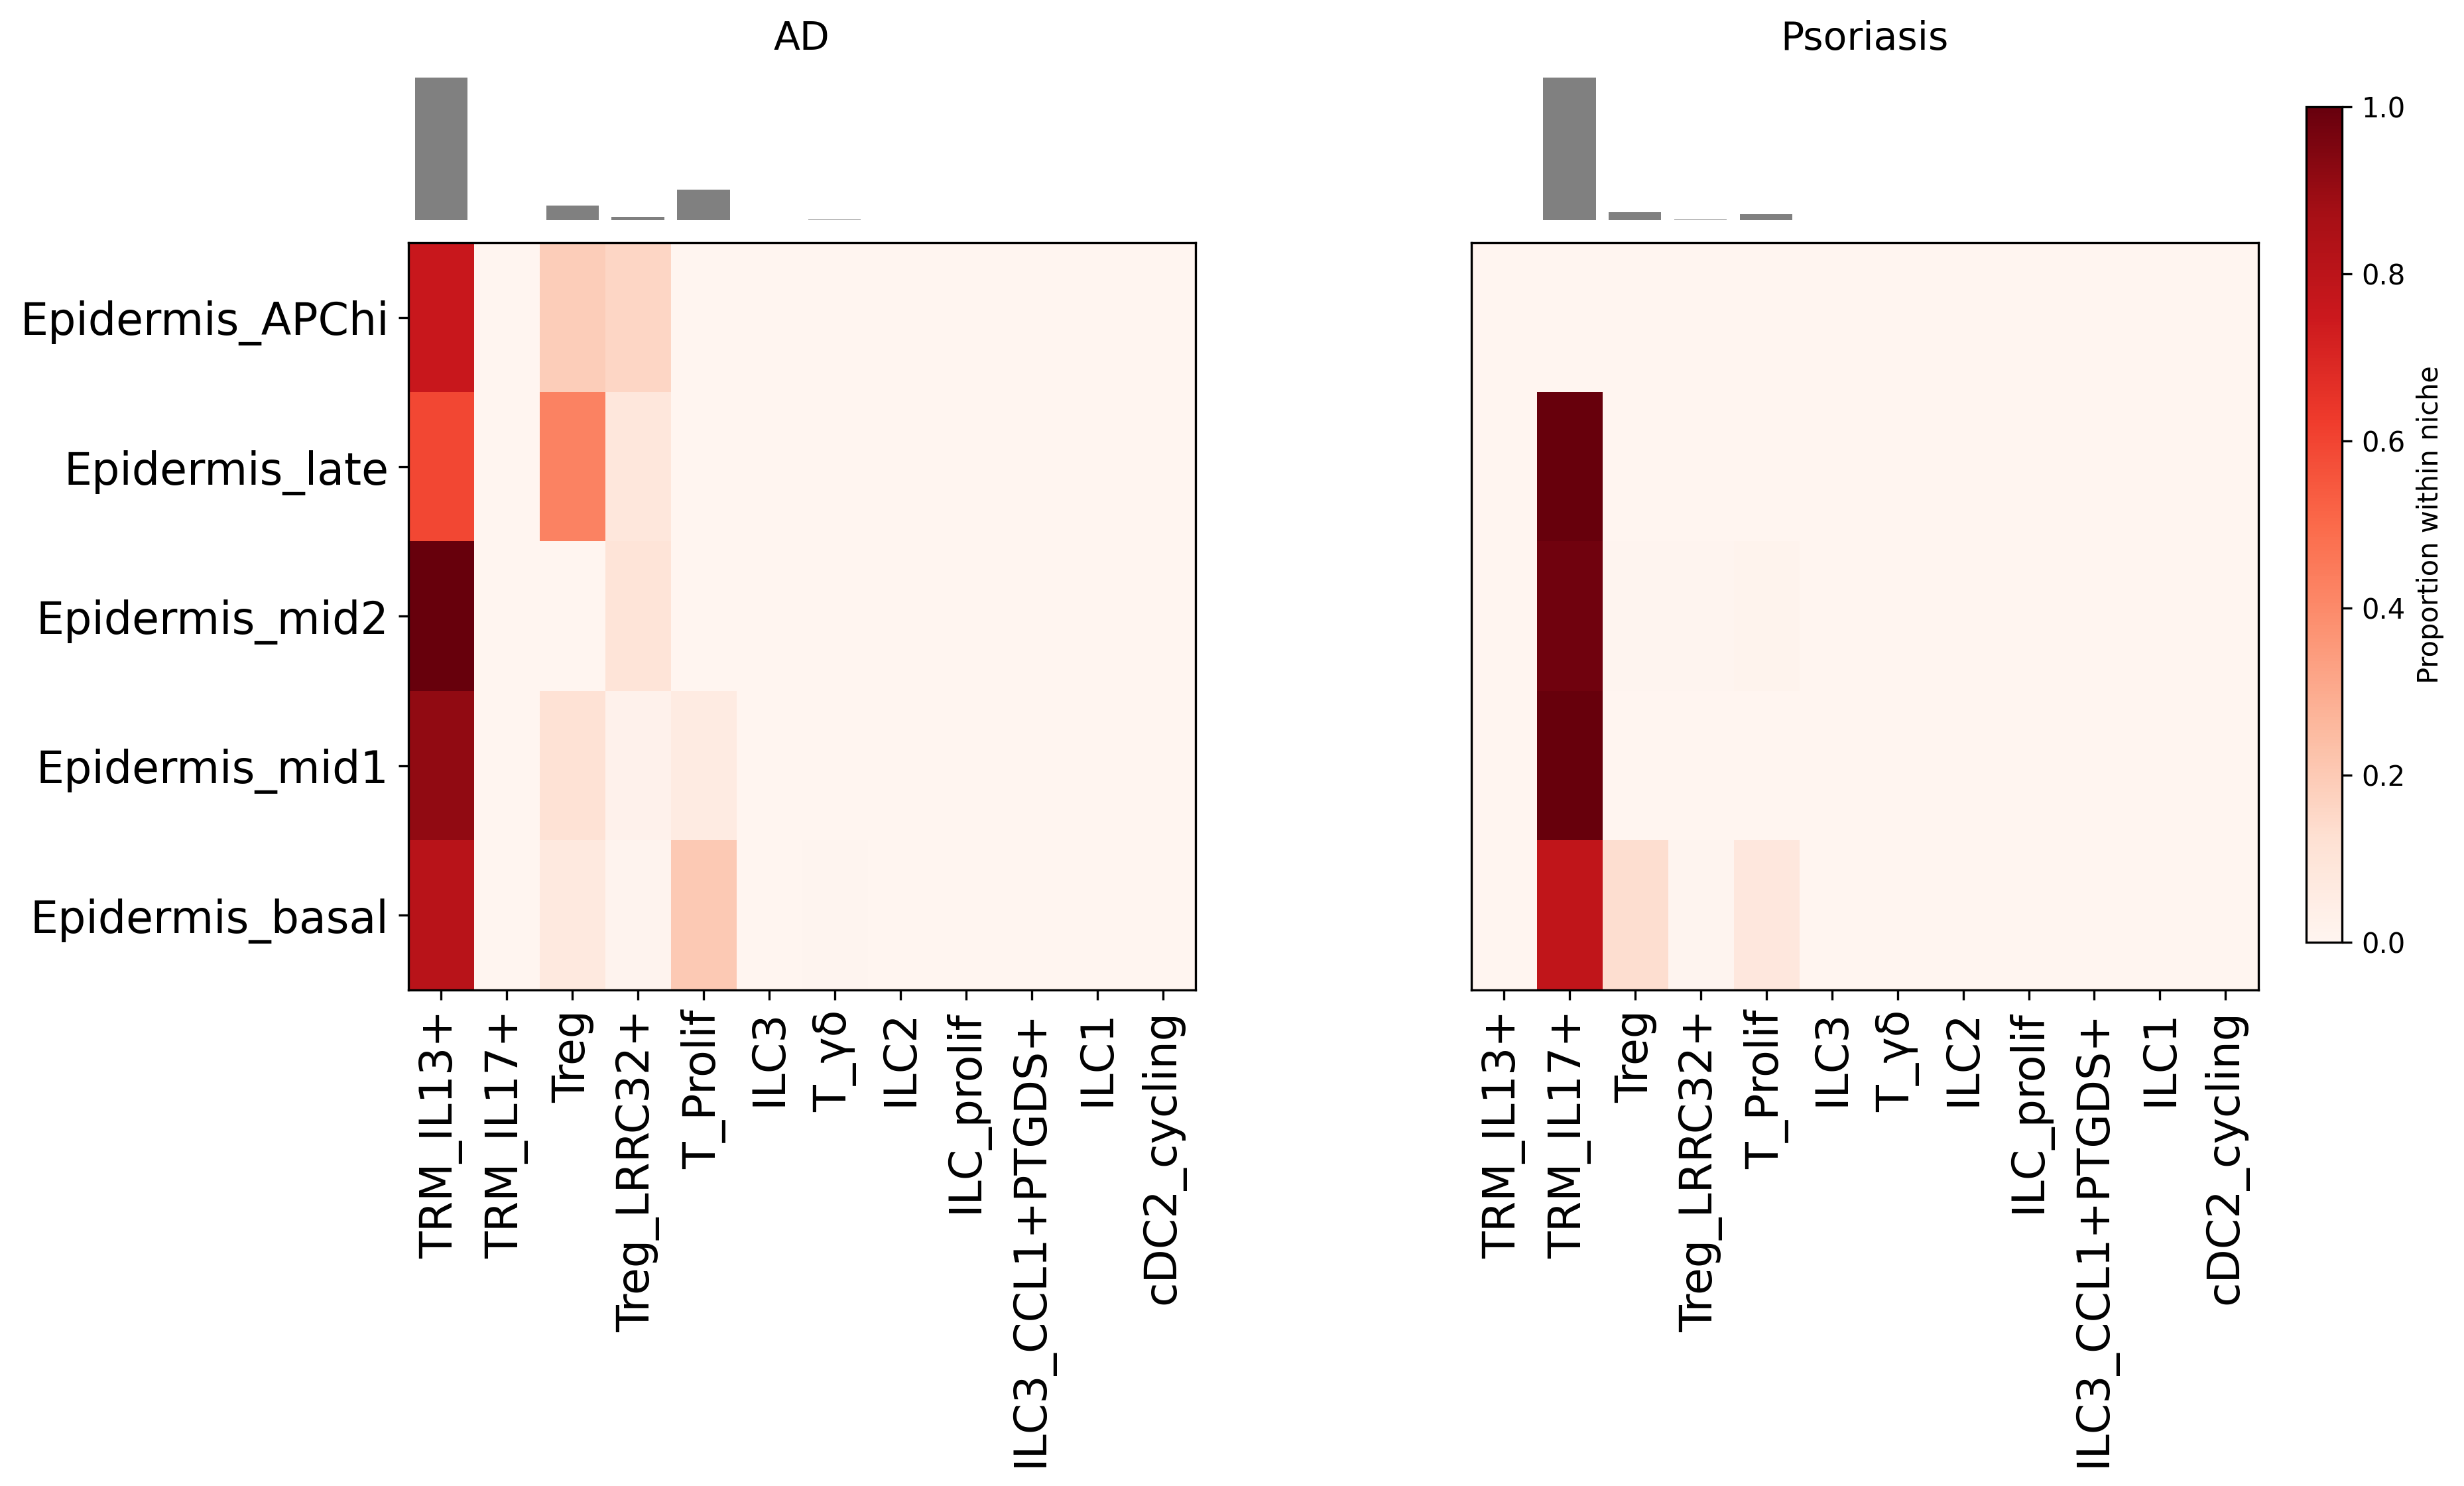

In [216]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec

# Desired orders
ytick_order = [
    'Epidermis_basal', 'Epidermis_mid1',
    'Epidermis_mid2', 'Epidermis_late', 'Epidermis_APChi'
][::-1]

xtick_order = [#'cDC2',
     'TRM_IL13+',
     'TRM_IL17+',
 #'AD_Treg',
 #'AD_Treg_LRRC32+',
     'Treg',
 'Treg_LRRC32+',
 #'LC',
 #'cDC1',
 'T_Prolif',
 #'MigDC (cDC2)',
 'ILC3',
 #'cDC2: MMP12hi',
 'T_γδ',
 #'cDC2: EREG+CCR7+',

 'ILC2',
 'ILC_prolif',
 'ILC3_CCL1+PTGDS+',
 'ILC1',
 'cDC2_cycling',
 #'MigDC (cDC1)',
 #'Monocyte',

]

diseases = adata_5k.obs["disease_overall"].unique()

# --- Create figure with 300 DPI ---
fig = plt.figure(figsize=(6 * len(diseases), 6), dpi=300)
outer_gs = gridspec.GridSpec(1, len(diseases), wspace=0.35)

for idx, x in enumerate(diseases):
    adata_5k_iii = adata_5k_ii[adata_5k_ii.obs["disease_overall"] == x].copy()

    # --- counts ---
    counts = (
        adata_5k_iii.obs
        .groupby(["niche12", "lvl4_annotation"])
        .size()
        .reset_index(name="count")
    )

    heatmap_data = counts.pivot(
        index="niche12", columns="lvl4_annotation", values="count"
    ).fillna(0)

    heatmap_data = (
        heatmap_data
        .reindex(index=ytick_order)
        .reindex(columns=xtick_order)
        .fillna(0)
    )

    prop_data = heatmap_data.div(heatmap_data.sum(axis=1), axis=0).fillna(0)

    # --- nested gridspec ---
    inner_gs = gridspec.GridSpecFromSubplotSpec(
        2, 1, subplot_spec=outer_gs[idx], height_ratios=[0.8, 4], hspace=0.05
    )
    ax_colbar = fig.add_subplot(inner_gs[0])
    ax_heat   = fig.add_subplot(inner_gs[1])

    # --- top barplot ---
    xx = np.arange(len(xtick_order)) + 0.5
    ax_colbar.bar(xx, heatmap_data.sum(axis=0).values, color="gray", width=0.8, align="center")
    ax_colbar.set_xlim(0, len(xtick_order))
    ax_colbar.axis("off")

    # --- heatmap ---
    im = ax_heat.imshow(prop_data.values, cmap='Reds', aspect='auto', interpolation='nearest')

    ax_heat.set_title(x, fontsize=14, pad=70)
    ax_heat.set_xticks(np.arange(len(prop_data.columns)))
    ax_heat.set_xticklabels(prop_data.columns, rotation=90, fontsize=16)
    ax_heat.set_yticks(np.arange(len(prop_data.index)) if idx==0 else [])
    ax_heat.set_yticklabels(prop_data.index if idx==0 else [], fontsize=16)
    ax_heat.set_xlim(-0.5, len(prop_data.columns)-0.5)
    ax_heat.set_ylim(-0.5, len(prop_data.index)-0.5)
    ax_heat.invert_yaxis()
    ax_heat.grid(False)

# --- colorbar ---
cax = fig.add_axes([0.92, 0.15, 0.015, 0.7])
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=0, vmax=1))
cbar = plt.colorbar(sm, cax=cax)
cbar.set_label("Proportion within niche")

plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()

In [156]:
ANNOTATION_ORDER3=[
    #'AD_Bcell',
  'AD_ILC1',
  'AD_ILC2',
  'AD_ILC3',
  'AD_ILC3_CCL1+PTGDS+',
  'AD_ILC_prolif',
 'AD_LC',
    'Psoriasis_LC',
    
 # 'AD_Mac',
 # 'AD_Mast cell',
 'AD_MigDC (cDC2)',

 # 'AD_NK',
 # 'AD_Neutrophil',
 # 'AD_Plasma cell',
 # 'AD_T',
  'AD_TRM_IL13+',
  'AD_T_Prolif',
  'AD_T_γδ',
 # 'AD_Tc',
 # 'AD_Th',
 # 'AD_Th_PPARGhi',
 # 'AD_Treg',
 # 'AD_Treg_LRRC32+',



 # 'AD_pDC',
 # 'Psoriasis_Bcell',
 # 'Psoriasis_ILC1',
 # 'Psoriasis_ILC2',
 # 'Psoriasis_ILC3',
 # 'Psoriasis_ILC3_CCL1+PTGDS+',
#'Psoriasis_Mac',
 # 'Psoriasis_Mast cell',
 'Psoriasis_MigDC (cDC2)',
     'AD_Monocyte',
 'Psoriasis_Monocyte',
 # 'Psoriasis_NK',
 # 'Psoriasis_Neutrophil',
 # 'Psoriasis_Plasma cell',
 # 'Psoriasis_T',
  'Psoriasis_TRM_IL17+',
 # 'Psoriasis_T_Prolif',
  'Psoriasis_T_γδ',
 # 'Psoriasis_Tc',
 # 'Psoriasis_Th',
 # 'Psoriasis_Th_PPARGhi',
 # 'Psoriasis_Treg',
 # 'Psoriasis_Treg_LRRC32+',
     'AD_cDC1',

 'Psoriasis_cDC1',
    
     'AD_cDC2',
 'Psoriasis_cDC2',
    
     'AD_cDC2: EREG+CCR7+',
 'Psoriasis_cDC2: EREG+CCR7+',
    
    
     'AD_cDC2: MMP12hi',
 'Psoriasis_cDC2: MMP12hi',
    
    
     'AD_MigDC (cDC1)',
 #'Psoriasis_pDC'
     'AD_cDC2_cycling',

]
adata_5k_ii=adata_5k_i[adata_5k_i.obs[ANNOTATION].isin(ANNOTATION_ORDER3)]
adata_5k_ii.obs[ANNOTATION].value_counts()

NEW
AD_cDC2                       2911
AD_cDC1                       1459
AD_MigDC (cDC2)               1379
Psoriasis_cDC2                1109
AD_TRM_IL13+                  1081
AD_LC                          712
AD_cDC2: MMP12hi               703
Psoriasis_cDC1                 702
Psoriasis_MigDC (cDC2)         629
AD_cDC2: EREG+CCR7+            605
AD_T_Prolif                    587
Psoriasis_TRM_IL17+            435
Psoriasis_cDC2: EREG+CCR7+     171
Psoriasis_LC                   159
Psoriasis_cDC2: MMP12hi        149
AD_ILC3                         54
AD_ILC2                         48
AD_ILC1                         40
AD_ILC3_CCL1+PTGDS+             36
AD_T_γδ                         32
Psoriasis_T_γδ                  16
AD_ILC_prolif                   11
AD_MigDC (cDC1)                  9
AD_cDC2_cycling                  7
Psoriasis_Monocyte               5
AD_Monocyte                      4
Name: count, dtype: int64

In [157]:
xtick_order = list(adata_5k_ii.obs[ANNOTATION].unique())
xtick_order

['AD_cDC2',
 'AD_LC',
 'AD_cDC1',
 'AD_T_Prolif',
 'AD_MigDC (cDC2)',
 'AD_ILC3',
 'AD_cDC2: MMP12hi',
 'AD_T_γδ',
 'AD_cDC2: EREG+CCR7+',
 'AD_TRM_IL13+',
 'AD_ILC2',
 'AD_ILC_prolif',
 'AD_ILC3_CCL1+PTGDS+',
 'AD_ILC1',
 'AD_cDC2_cycling',
 'AD_MigDC (cDC1)',
 'AD_Monocyte',
 'Psoriasis_LC',
 'Psoriasis_cDC1',
 'Psoriasis_TRM_IL17+',
 'Psoriasis_cDC2',
 'Psoriasis_MigDC (cDC2)',
 'Psoriasis_cDC2: EREG+CCR7+',
 'Psoriasis_T_γδ',
 'Psoriasis_cDC2: MMP12hi',
 'Psoriasis_Monocyte']

In [160]:
heatmap_data = counts.pivot(
        index="niche12", columns="lvl4_annotation", values="count"
    ).fillna(0)
heatmap_data.columns

CategoricalIndex(['LC', 'MigDC (cDC2)', 'Monocyte', 'TRM_IL17+', 'T_γδ',
                  'cDC1', 'cDC2', 'cDC2: EREG+CCR7+', 'cDC2: MMP12hi'],
                 categories=['LC', 'MigDC (cDC2)', 'Monocyte', 'TRM_IL17+', ..., 'cDC1', 'cDC2', 'cDC2: EREG+CCR7+', 'cDC2: MMP12hi'], ordered=False, dtype='category', name='lvl4_annotation')

/tmp/ipykernel_1987804/1494038593.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["niche12", "lvl4_annotation"])
/tmp/ipykernel_1987804/1494038593.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["niche12", "lvl4_annotation"])
/tmp/ipykernel_1987804/1494038593.py:114: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


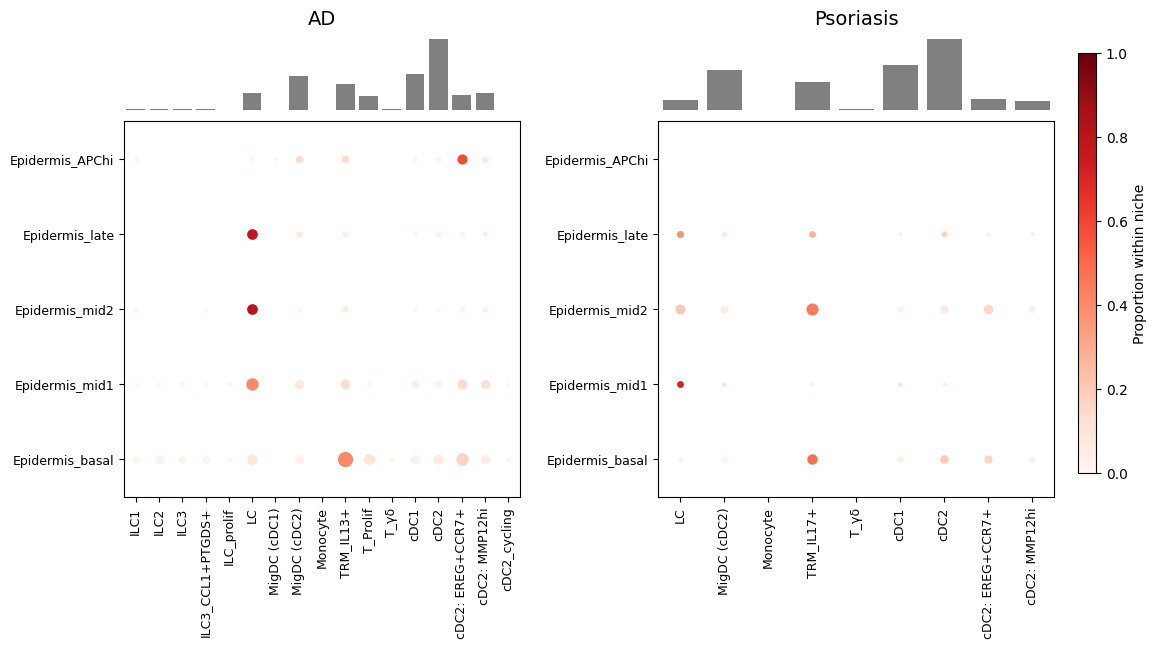

In [161]:
# desired orders
ytick_order = [
    'Epidermis_basal', 'Epidermis_mid1',
    'Epidermis_mid2', 'Epidermis_late', 'Epidermis_APChi'
][::-1]

# xtick_order = [
#     'LC', 'cDC2: EREG+CCR7+', 'cDC2: MMP12hi',
#     'cDC2', 'MigDC (cDC2)', 'cDC1','MigDC (cDC1)', 'cDC2_cycling'
# ]
xtick_order = list(adata_5k_ii.obs[ANNOTATION].unique())
xtick_order
diseases = adata_5k.obs["disease_overall"].unique()

fig = plt.figure(figsize=(6 * len(diseases), 6))
outer_gs = gridspec.GridSpec(1, len(diseases), wspace=0.35)

for idx, x in enumerate(diseases):
    adata_5k_iii = adata_5k_ii[adata_5k_ii.obs["disease_overall"] == x].copy()

    # --- counts ---
    counts = (
        adata_5k_iii.obs
        .groupby(["niche12", "lvl4_annotation"])
        .size()
        .reset_index(name="count")
    )

    heatmap_data = counts.pivot(
        index="niche12", columns="lvl4_annotation", values="count"
    ).fillna(0)
    xtick_order = list(heatmap_data.columns)

    # enforce desired orders
    heatmap_data = (
        heatmap_data
        .reindex(index=ytick_order)
        .reindex(columns=xtick_order)
        .fillna(0)
    )

    # proportions
    prop_data = heatmap_data.div(heatmap_data.sum(axis=1), axis=0).fillna(0)

    # long form
    dot_data = prop_data.reset_index().melt(
        id_vars="niche12", var_name="lvl4_annotation", value_name="prop"
    )
    counts_long = heatmap_data.reset_index().melt(
        id_vars="niche12", var_name="lvl4_annotation", value_name="count"
    )
    dot_data = dot_data.merge(counts_long, on=["niche12", "lvl4_annotation"])

    # --- annotation abundance (align with columns) ---
    annotation_counts = (
        adata_5k_iii.obs["lvl4_annotation"]
        .value_counts()
        .reindex(xtick_order)
        .fillna(0)
    )

    # --- nested gridspec ---
    inner_gs = gridspec.GridSpecFromSubplotSpec(
        2, 1, subplot_spec=outer_gs[idx], height_ratios=[0.8, 4], hspace=0.05
    )
    ax_colbar = fig.add_subplot(inner_gs[0])
    ax_heat   = fig.add_subplot(inner_gs[1])

    # --- top barplot ---
    xx = np.arange(len(annotation_counts)) + 0.5
    ax_colbar.bar(xx, annotation_counts.values, color="gray", width=0.8, align="center")
    ax_colbar.set_xlim(0, len(annotation_counts))
    ax_colbar.set_xticks([])
    ax_colbar.set_yticks([])
    ax_colbar.axis("off")

    # --- dotplot ---
    for _, row in dot_data.iterrows():
        niche = row["niche12"]
        annot = row["lvl4_annotation"]
        prop  = row["prop"]
        count = row["count"]

        if pd.isna(prop) or pd.isna(count):
            continue

        j = xtick_order.index(annot)
        i = ytick_order.index(niche)

        ax_heat.scatter(
            j+0.5, i+0.5,
            s=(count**0.5)*4,
            c=[[plt.cm.Reds(prop)]],
            marker="o"
        )

    # aesthetics
    ax_heat.set_title(x, fontsize=14, pad=70)  # higher title
    ax_heat.set_xticks(np.arange(len(prop_data.columns)) + 0.5)
    ax_heat.set_xticklabels(prop_data.columns, rotation=90, fontsize=9)
    ax_heat.set_yticks(np.arange(len(prop_data.index)) + 0.5)
    ax_heat.set_yticklabels(prop_data.index, fontsize=9)
    ax_heat.set_xlim(0, len(prop_data.columns))
    ax_heat.set_ylim(0, len(prop_data.index))
    ax_heat.invert_yaxis()
    ax_heat.grid(False)

# Add ONE shared colorbar axis outside the gridspec
cax = fig.add_axes([0.92, 0.15, 0.015, 0.7])  # [left, bottom, width, height]
sm = plt.cm.ScalarMappable(cmap=plt.cm.Reds, norm=plt.Normalize(vmin=0, vmax=1))
cbar = fig.colorbar(sm, cax=cax)
cbar.set_label("Proportion within niche")

plt.tight_layout(rect=[0, 0, 0.9, 1])   
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec

# desired orders
ytick_order = [
    'Epidermis_basal', 'Epidermis_mid1',
    'Epidermis_mid2', 'Epidermis_late', 'Epidermis_APChi'
][::-1]

xtick_order = [
    'LC', 'cDC2: EREG+CCR7+', 'cDC2: MMP12hi',
    'cDC2', 'MigDC (cDC2)', 'cDC1','MigDC (cDC1)', 'cDC2_cycling'
]

diseases = adata_5k.obs["disease_overall"].unique()

fig = plt.figure(figsize=(6 * len(diseases), 6))
outer_gs = gridspec.GridSpec(1, len(diseases), wspace=0.35)

for idx, x in enumerate(diseases):
    adata_5k_iii = adata_5k_ii[adata_5k_ii.obs["disease_overall"] == x].copy()

    # --- counts ---
    counts = (
        adata_5k_iii.obs
        .groupby(["niche12", "lvl4_annotation"])
        .size()
        .reset_index(name="count")
    )

    heatmap_data = counts.pivot(
        index="niche12", columns="lvl4_annotation", values="count"
    ).fillna(0)

    # enforce desired orders
    heatmap_data = (
        heatmap_data
        .reindex(index=ytick_order)
        .reindex(columns=xtick_order)
        .fillna(0)
    )

    # proportions
    prop_data = heatmap_data.div(heatmap_data.sum(axis=1), axis=0).fillna(0)

    # long form
    dot_data = prop_data.reset_index().melt(
        id_vars="niche12", var_name="lvl4_annotation", value_name="prop"
    )
    counts_long = heatmap_data.reset_index().melt(
        id_vars="niche12", var_name="lvl4_annotation", value_name="count"
    )
    dot_data = dot_data.merge(counts_long, on=["niche12", "lvl4_annotation"])

    # --- annotation abundance (align with columns) ---
    annotation_counts = (
        adata_5k_iii.obs["lvl4_annotation"]
        .value_counts()
        .reindex(xtick_order)
        .fillna(0)
    )

    # --- nested gridspec ---
    inner_gs = gridspec.GridSpecFromSubplotSpec(
        2, 1, subplot_spec=outer_gs[idx], height_ratios=[0.8, 4], hspace=0.05
    )
    ax_colbar = fig.add_subplot(inner_gs[0])
    ax_heat   = fig.add_subplot(inner_gs[1])

    # --- top barplot ---
    xx = np.arange(len(annotation_counts)) + 0.5
    ax_colbar.bar(xx, annotation_counts.values, color="gray", width=0.8, align="center")
    ax_colbar.set_xlim(0, len(annotation_counts))
    ax_colbar.set_xticks([])
    ax_colbar.set_yticks([])
    ax_colbar.axis("off")

    # --- dotplot ---
    for _, row in dot_data.iterrows():
        niche = row["niche12"]
        annot = row["lvl4_annotation"]
        prop  = row["prop"]
        count = row["count"]

        if pd.isna(prop) or pd.isna(count):
            continue

        j = xtick_order.index(annot)
        i = ytick_order.index(niche)

        ax_heat.scatter(
            j+0.5, i+0.5,
            s=(count**0.5)*4,
            c=[[plt.cm.Reds(prop)]],
            marker="o"
        )

    # aesthetics
    ax_heat.set_title(x, fontsize=14, pad=70)  # higher title
    ax_heat.set_xticks(np.arange(len(prop_data.columns)) + 0.5)
    ax_heat.set_xticklabels(prop_data.columns, rotation=90, fontsize=9)
    ax_heat.set_yticks(np.arange(len(prop_data.index)) + 0.5)
    ax_heat.set_yticklabels(prop_data.index, fontsize=9)
    ax_heat.set_xlim(0, len(prop_data.columns))
    ax_heat.set_ylim(0, len(prop_data.index))
    ax_heat.invert_yaxis()
    ax_heat.grid(False)

# Add ONE shared colorbar axis outside the gridspec
cax = fig.add_axes([0.92, 0.15, 0.015, 0.7])  # [left, bottom, width, height]
sm = plt.cm.ScalarMappable(cmap=plt.cm.Reds, norm=plt.Normalize(vmin=0, vmax=1))
cbar = fig.colorbar(sm, cax=cax)
cbar.set_label("Proportion within niche")

plt.tight_layout(rect=[0, 0, 0.9, 1])  # leave room for colorbar
plt.show()

In [139]:
adata_5k_iii.obs["lvl4_annotation"].unique()

['LC', 'cDC1', 'cDC2', 'cDC2: EREG+CCR7+', 'cDC2: MMP12hi', 'MigDC (cDC2)']
Categories (6, object): ['LC', 'MigDC (cDC2)', 'cDC1', 'cDC2', 'cDC2: EREG+CCR7+', 'cDC2: MMP12hi']

In [138]:
adata_5k_iii.obs["niche12"].unique()

['Epidermis_late', 'Epidermis_basal', 'Epidermis_mid2', 'Epidermis_mid1']
Categories (4, object): ['Epidermis_basal', 'Epidermis_late', 'Epidermis_mid1', 'Epidermis_mid2']

In [116]:

cmap = mpl.cm.Reds.copy()
cmap.set_bad(color='lightgrey')

# subset for disease
for x in adata_5k.obs["disease_overall"].unique():
    print(x)
    adata_5k_iii = adata_5k[adata_5k.obs["disease_overall"] == x].copy()
    
    # counts
    counts = (
        adata_5k_iii.obs
        .groupby(["niche12", ANNOTATION])
        .size()
        .reset_index(name="count")
    )

    # pivot with niche on rows, annotation on cols
    heatmap_data = counts.pivot(index="niche12", columns=ANNOTATION, values="count")

    # filter/reindex columns to annotation order
    heatmap_data = heatmap_data.loc[:, heatmap_data.columns.isin(ANNOTATION_ORDER3)]
    heatmap_data = heatmap_data.reindex(columns=ANNOTATION_ORDER3).fillna(0)

    # reorder niches if you have desired_order
    heatmap_data = heatmap_data.reindex(index=desired_order).fillna(np.nan)

    # normalize per-row to get proportions
    heatmap_data = heatmap_data.div(heatmap_data.sum(axis=1), axis=0)

    # Flatten to long format
    dot_data = heatmap_data.reset_index().melt(
        id_vars="niche12", var_name=ANNOTATION, value_name="prop"
    )

    # Add counts for dot size
    counts_matrix = counts.pivot(index="niche12", columns=ANNOTATION, values="count").fillna(0)
    counts_long = counts_matrix.reset_index().melt(
        id_vars="niche12", var_name=ANNOTATION, value_name="count"
    )
    dot_data = dot_data.merge(counts_long, on=["niche12", ANNOTATION])

    # --- plotting ---
    fig, ax_heat = plt.subplots(figsize=(12, 6))

    for i, niche in enumerate(heatmap_data.index):
        for j, ct in enumerate(heatmap_data.columns):
            val = dot_data.query(f"niche12 == @niche and {ANNOTATION} == @ct")
            if not val.empty:
                prop = val["prop"].values[0]
                count = val["count"].values[0]
                ax_heat.scatter(
                    j+0.5, i+0.5,
                    s=(count**0.5)*5,  # dot size ~ sqrt(count)
                    c=[cmap(prop)],    # color ~ proportion
                    marker="o"
                )

    # axis aesthetics
    ax_heat.set_xticks(np.arange(len(heatmap_data.columns)) + 0.5)
    ax_heat.set_xticklabels(heatmap_data.columns, rotation=90, fontsize=12)
    ax_heat.set_yticks(np.arange(len(heatmap_data.index)) + 0.5)
    ax_heat.set_yticklabels(heatmap_data.index, fontsize=12)
    ax_heat.set_xlim(0, len(heatmap_data.columns))
    ax_heat.set_ylim(0, len(heatmap_data.index))
    ax_heat.invert_yaxis()
    ax_heat.grid(False)

    # --- add proper color legend ---
    norm = mpl.colors.Normalize(vmin=0, vmax=1)
    sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])  # dummy
    cbar = fig.colorbar(sm, ax=ax_heat, fraction=0.046, pad=0.04)
    cbar.set_label("Proportion within niche", fontsize=12)

    plt.tight_layout()
    plt.show()

AD


KeyboardInterrupt: 

/tmp/ipykernel_1987804/2911460391.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["niche12", "NEW"])


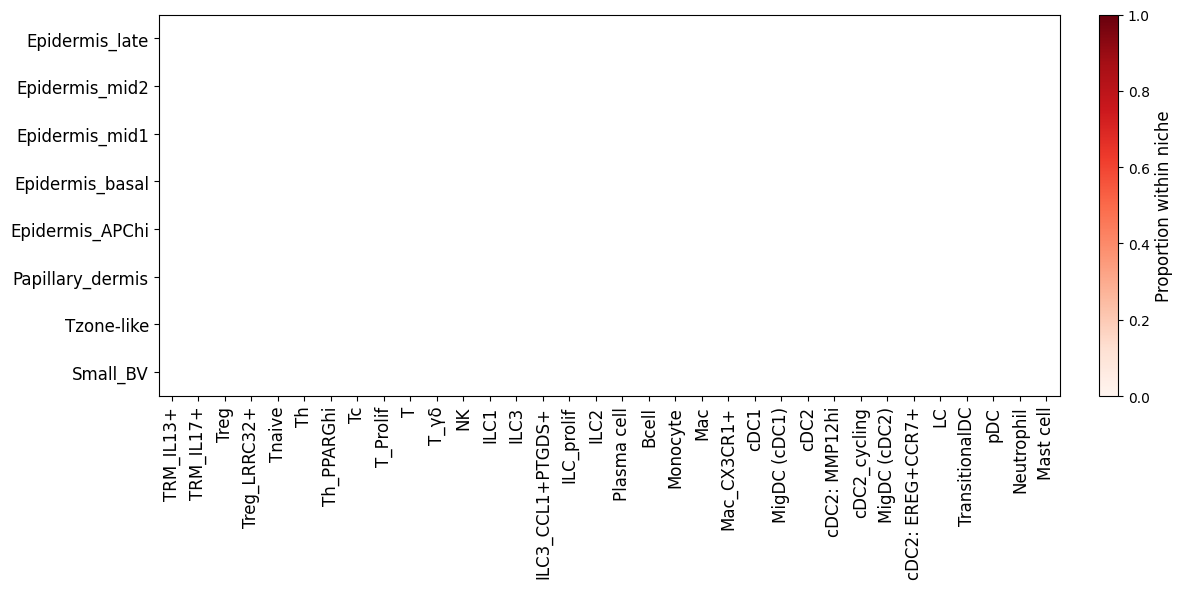

In [67]:
# cmap = mpl.cm.Reds.copy()
# cmap.set_bad(color='lightgrey')

# # counts
# counts = (
#     adata_5k.obs
#     .groupby(["niche12", "NEW"])
#     .size()
#     .reset_index(name="count")
# )

# # pivot with niche on rows, annotation on cols
# heatmap_data = counts.pivot(index="niche12", columns=ANNOTATION, values="count")

# # filter/reindex columns to annotation order
# heatmap_data = heatmap_data.loc[:, heatmap_data.columns.isin(ANNOTATION_ORDER)]
# heatmap_data = heatmap_data.reindex(columns=ANNOTATION_ORDER).fillna(0)

# # reorder niches if you have desired_order
# heatmap_data = heatmap_data.reindex(index=desired_order).fillna(np.nan)

# # normalize per-row to get proportions
# heatmap_data = heatmap_data.div(heatmap_data.sum(axis=1), axis=0)

# # Flatten to long format
# dot_data = heatmap_data.reset_index().melt(
#     id_vars="niche12", var_name=ANNOTATION, value_name="prop"
# )

# # Add counts for dot size
# counts_matrix = counts.pivot(index="niche12", columns=ANNOTATION, values="count").fillna(0)
# counts_long = counts_matrix.reset_index().melt(
#     id_vars="niche12", var_name=ANNOTATION, value_name="count"
# )
# dot_data = dot_data.merge(counts_long, on=["niche12", ANNOTATION])

# # --- plotting ---
# fig, ax_heat = plt.subplots(figsize=(12, 6))

# for i, niche in enumerate(heatmap_data.index):
#     for j, ct in enumerate(heatmap_data.columns):
#         val = dot_data.query(f"niche12 == @niche and {ANNOTATION} == @ct")
#         if not val.empty:
#             prop = val["prop"].values[0]
#             count = val["count"].values[0]
#             ax_heat.scatter(
#                 j+0.5, i+0.5,
#                 s=(count**0.5)*5,  # dot size ~ sqrt(count)
#                 c=[cmap(prop)],    # color ~ proportion
#                 marker="o"
#             )

# # axis aesthetics
# ax_heat.set_xticks(np.arange(len(heatmap_data.columns)) + 0.5)
# ax_heat.set_xticklabels(heatmap_data.columns, rotation=90, fontsize=12)
# ax_heat.set_yticks(np.arange(len(heatmap_data.index)) + 0.5)
# ax_heat.set_yticklabels(heatmap_data.index, fontsize=12)
# ax_heat.set_xlim(0, len(heatmap_data.columns))
# ax_heat.set_ylim(0, len(heatmap_data.index))
# ax_heat.invert_yaxis()
# ax_heat.grid(False)

# # --- add proper color legend ---
# norm = mpl.colors.Normalize(vmin=0, vmax=1)
# sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
# sm.set_array([])  # dummy
# cbar = fig.colorbar(sm, ax=ax_heat, fraction=0.046, pad=0.04)
# cbar.set_label("Proportion within niche", fontsize=12)

# plt.tight_layout()
# plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

# --- setup colormap ---
cmap = mpl.cm.Reds.copy()
cmap.set_bad(color='lightgrey')

# subset for disease
for x in adata_5k.obs["disease_overall"].unique():
    print(x)
    adata_5k_iii = adata_5k[adata_5k.obs["disease_overall"] == x].copy()
    
    # counts
    counts = (
        adata_5k_iii.obs
        .groupby(["niche12", ANNOTATION])
        .size()
        .reset_index(name="count")
    )

    # pivot with niche on rows, annotation on cols
    heatmap_data = counts.pivot(index="niche12", columns=ANNOTATION, values="count")

    # filter/reindex columns to annotation order
    heatmap_data = heatmap_data.loc[:, heatmap_data.columns.isin(ANNOTATION_ORDER)]
    heatmap_data = heatmap_data.reindex(columns=ANNOTATION_ORDER).fillna(0)

    # reorder niches if you have desired_order
    heatmap_data = heatmap_data.reindex(index=desired_order).fillna(np.nan)

    # normalize per-row to get proportions
    heatmap_data = heatmap_data.div(heatmap_data.sum(axis=1), axis=0)

    # Flatten to long format
    dot_data = heatmap_data.reset_index().melt(
        id_vars="niche12", var_name=ANNOTATION, value_name="prop"
    )

    # Add counts for dot size
    counts_matrix = counts.pivot(index="niche12", columns=ANNOTATION, values="count").fillna(0)
    counts_long = counts_matrix.reset_index().melt(
        id_vars="niche12", var_name=ANNOTATION, value_name="count"
    )
    dot_data = dot_data.merge(counts_long, on=["niche12", ANNOTATION])

    # --- plotting ---
    fig, ax_heat = plt.subplots(figsize=(12, 6))

    for i, niche in enumerate(heatmap_data.index):
        for j, ct in enumerate(heatmap_data.columns):
            val = dot_data.query(f"niche12 == @niche and {ANNOTATION} == @ct")
            if not val.empty:
                prop = val["prop"].values[0]
                count = val["count"].values[0]
                ax_heat.scatter(
                    j+0.5, i+0.5,
                    s=(count**0.5)*5,  # dot size ~ sqrt(count)
                    c=[cmap(prop)],    # color ~ proportion
                    marker="o"
                )

    # axis aesthetics
    ax_heat.set_xticks(np.arange(len(heatmap_data.columns)) + 0.5)
    ax_heat.set_xticklabels(heatmap_data.columns, rotation=90, fontsize=12)
    ax_heat.set_yticks(np.arange(len(heatmap_data.index)) + 0.5)
    ax_heat.set_yticklabels(heatmap_data.index, fontsize=12)
    ax_heat.set_xlim(0, len(heatmap_data.columns))
    ax_heat.set_ylim(0, len(heatmap_data.index))
    ax_heat.invert_yaxis()
    ax_heat.grid(False)

    # --- add proper color legend ---
    norm = mpl.colors.Normalize(vmin=0, vmax=1)
    sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])  # dummy
    cbar = fig.colorbar(sm, ax=ax_heat, fraction=0.046, pad=0.04)
    cbar.set_label("Proportion within niche", fontsize=12)

    plt.tight_layout()
    plt.show()

AD


/tmp/ipykernel_1987804/3620212760.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["niche12", ANNOTATION])
/tmp/ipykernel_1987804/3620212760.py:105: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


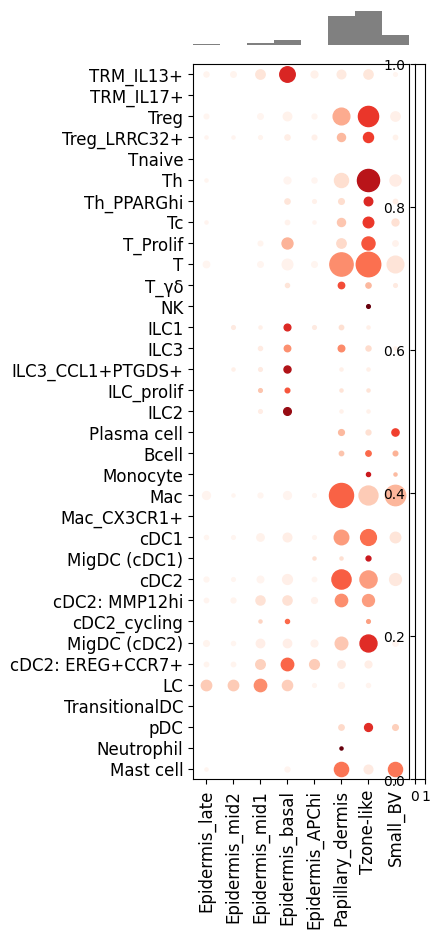

Psoriasis


/tmp/ipykernel_1987804/3620212760.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["niche12", ANNOTATION])
/tmp/ipykernel_1987804/3620212760.py:105: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


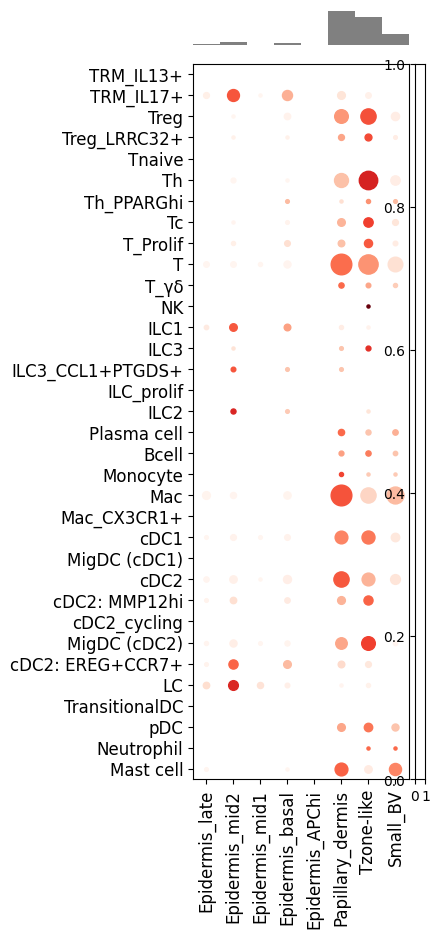

In [47]:
cmap = mpl.cm.Reds.copy()
cmap.set_bad(color='lightgrey')
for x in adata_5k.obs["disease_overall"].unique():
    print(x)
    adata_5k_iii = adata_5k_i[adata_5k_i.obs["disease_overall"] == x].copy()
    
    counts = (
        adata_5k_iii.obs
        .groupby(["niche12", ANNOTATION])
        .size()
        .reset_index(name="count")
    )

    heatmap_data = counts.pivot(index=ANNOTATION, columns="niche12", values="count")
    
    # filter to only cell types in your order
    heatmap_data = heatmap_data[heatmap_data.index.isin(ANNOTATION_ORDER)]
    
    # reindex in desired row order
    heatmap_data = heatmap_data.reindex(index=ANNOTATION_ORDER).fillna(0)

    # also reorder columns if needed
    heatmap_data = heatmap_data.reindex(columns=desired_order).fillna(np.nan)

    heatmap_data = heatmap_data.div(heatmap_data.sum(axis=1), axis=0)

   

    # assume heatmap_data, cmap, adata_5k_iii are defined

    # raw counts
    col_counts = (
        adata_5k_iii.obs['niche12']
        .value_counts()
        .reindex(heatmap_data.columns)
        .fillna(0)
    )
    row_counts = (
        adata_5k_iii.obs[ANNOTATION]
        .value_counts()
        .reindex(heatmap_data.index)
        .fillna(0)
    )

    # figure + grid
    fig = plt.figure(figsize=(3,10))
    gs = gridspec.GridSpec(
        2, 2,
        height_ratios=[0.2, 4],  # First value controls top bar height (was 1), make it smaller
        width_ratios=[4, 0.2],   # Second value controls right bar width (was 1), make it smaller
        hspace=0.05, wspace=0.05
    )

    ax_colbar = fig.add_subplot(gs[0,0])
    ax_empty  = fig.add_subplot(gs[0,1])
    ax_heat   = fig.add_subplot(gs[1,0])
    ax_rowbar = fig.add_subplot(gs[1,1])

    ax_empty.axis('off')

    # 1) niche12 bar (top), no text
    xx = np.arange(len(col_counts))
    ax_colbar.bar(xx, col_counts.values, color='gray', width=1, align='edge')
    ax_colbar.set_xlim(0, len(col_counts))
    ax_colbar.axis('off')


    # Flatten into long-form for scatter plotting
    dot_data = heatmap_data.reset_index().melt(
        id_vars=ANNOTATION, var_name="niche12", value_name="prop"
    )

    # Merge with raw counts for dot sizes
    counts_matrix = counts.pivot(index=ANNOTATION, columns="niche12", values="count").fillna(0)
    counts_long = counts_matrix.reset_index().melt(
        id_vars=ANNOTATION, var_name="niche12", value_name="count"
    )

    dot_data = dot_data.merge(counts_long, on=[ANNOTATION, "niche12"])

    # Scatter plot in the same ax_heat
    ax_heat.clear()
    for i, ct in enumerate(heatmap_data.index):
        for j, niche in enumerate(heatmap_data.columns):
            val = dot_data.query(f"{ANNOTATION} == @ct and niche12 == @niche")
            if not val.empty:
                prop = val["prop"].values[0]
                count = val["count"].values[0]
                ax_heat.scatter(
                    j+0.5, i+0.5,
                    s=(count**0.5)*5,  # size scaling, tweak multiplier
                    c=[cmap(prop)],    # color = proportion
                    marker="o"
                )

    # aesthetics
    ax_heat.set_xticks(np.arange(len(heatmap_data.columns)) + 0.5)
    ax_heat.set_xticklabels(heatmap_data.columns, rotation=90, fontsize=12)
    ax_heat.set_yticks(np.arange(len(heatmap_data.index)) + 0.5)
    ax_heat.set_yticklabels(heatmap_data.index, fontsize=12)
    ax_heat.set_xlim(0, len(heatmap_data.columns))
    ax_heat.set_ylim(0, len(heatmap_data.index))
    ax_heat.invert_yaxis()
    ax_heat.grid(False)
    plt.tight_layout()
    plt.show()

In [23]:
STOP

NameError: name 'STOP' is not defined

AD


/tmp/ipykernel_1987804/3521618163.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["niche12", ANNOTATION])
/tmp/ipykernel_1987804/3521618163.py:48: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax_dot.scatter(
/tmp/ipykernel_1987804/3521618163.py:76: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


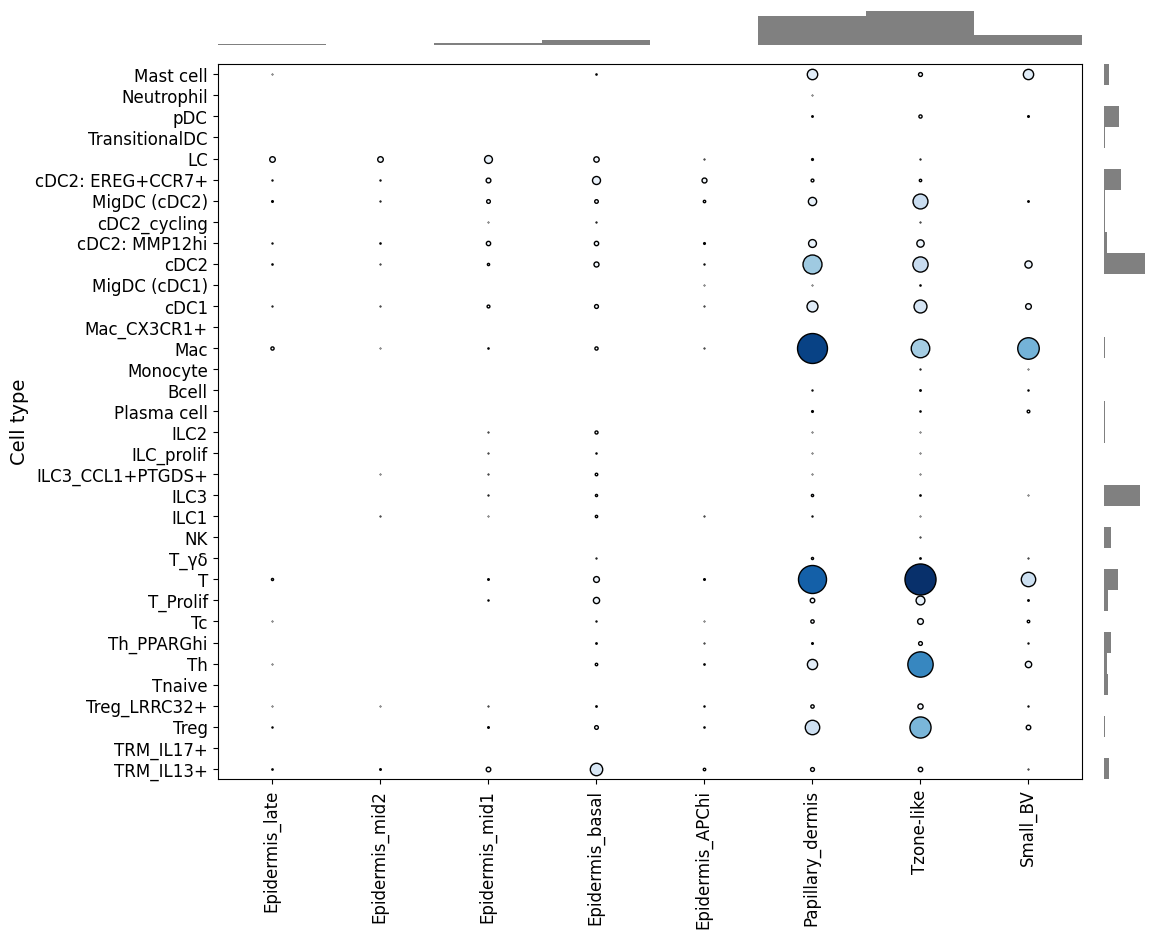

Psoriasis


/tmp/ipykernel_1987804/3521618163.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["niche12", ANNOTATION])
/tmp/ipykernel_1987804/3521618163.py:48: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax_dot.scatter(
/tmp/ipykernel_1987804/3521618163.py:76: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


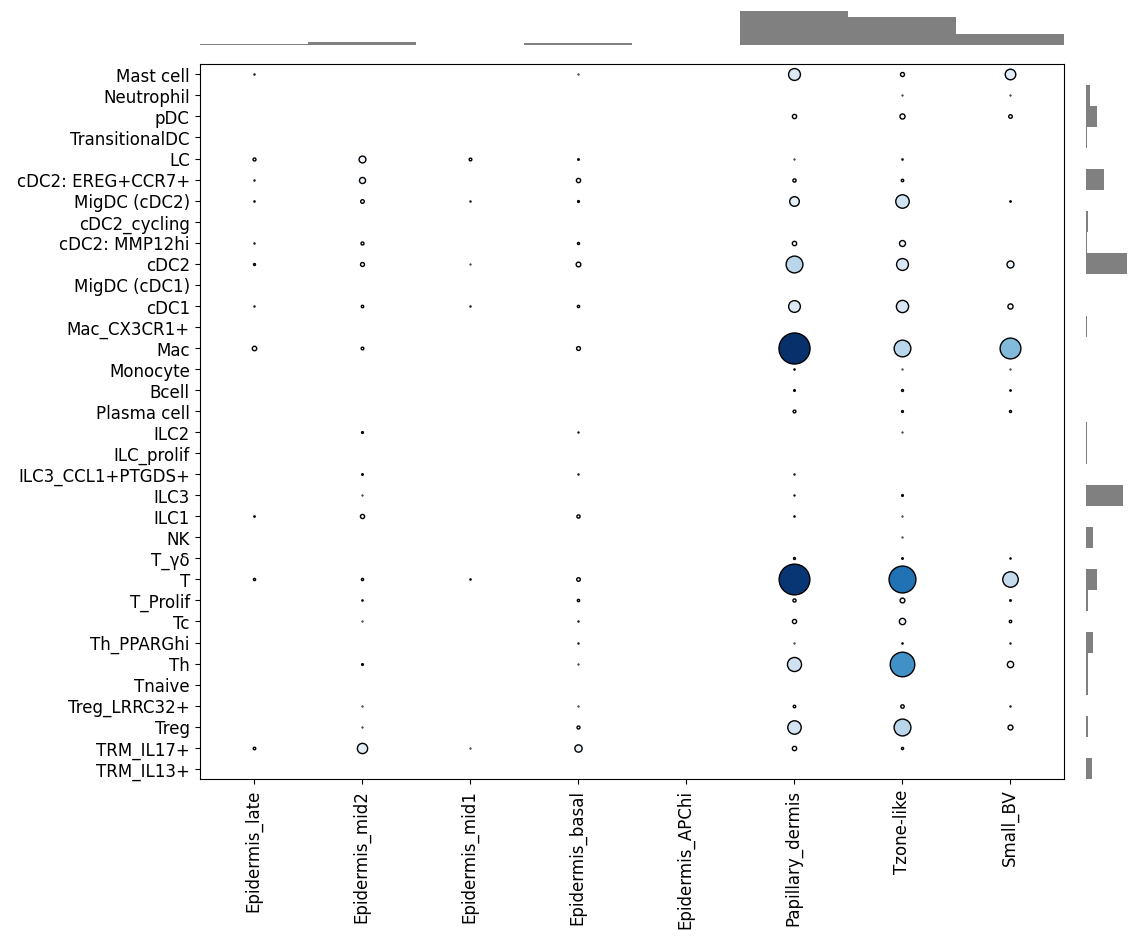

In [45]:
for disease in adata_5k.obs["disease_overall"].unique():
    print(disease)
    adata_5k_iii = adata_5k_i[adata_5k_i.obs["disease_overall"] == disease]
    
    counts = (
        adata_5k_iii.obs
        .groupby(["niche12", ANNOTATION])
        .size()
        .reset_index(name="count")
    )

    data = counts.pivot(index=ANNOTATION, columns="niche12", values="count")
    data = data[data.index.isin(ANNOTATION_ORDER)]
    data = data.reindex(index=ANNOTATION_ORDER).fillna(0)
    data = data.reindex(columns=desired_order).fillna(0)

    # normalize by row if desired (optional)
    data_prop = data.div(data.sum(axis=1), axis=0)

    # melt into long-form for plotting
    plot_df = data.reset_index().melt(id_vars=ANNOTATION, 
                                      var_name="niche12", 
                                      value_name="count")

    fig = plt.figure(figsize=(12,10))
    gs = gridspec.GridSpec(2, 2, height_ratios=[0.2, 4], width_ratios=[4, 0.2],
                           hspace=0.05, wspace=0.05)

    ax_colbar = fig.add_subplot(gs[0,0])
    ax_empty  = fig.add_subplot(gs[0,1])
    ax_dot    = fig.add_subplot(gs[1,0])
    ax_rowbar = fig.add_subplot(gs[1,1])

    ax_empty.axis('off')

    # top bar (total per niche)
    col_counts = data.sum(axis=0)
    xx = np.arange(len(col_counts))
    ax_colbar.bar(xx, col_counts.values, color='gray', width=1, align='edge')
    ax_colbar.set_xlim(0, len(col_counts))
    ax_colbar.axis('off')

    # dotplot
    for i, celltype in enumerate(data.index):
        for j, niche in enumerate(data.columns):
            val = data.loc[celltype, niche]
            if val > 0:
                ax_dot.scatter(
                    j+0.5, i+0.5,
                    s=val/np.max(data.values)*500,   # scale dot size
                    c=plt.cm.Blues(val/np.max(data.values)),  # color scale
                    edgecolor="k"
                )

    ax_dot.set_xticks(xx+0.5)
    ax_dot.set_xticklabels(data.columns, rotation=90, fontsize=12)
    ax_dot.set_yticks(np.arange(len(data.index))+0.5)
    ax_dot.set_yticklabels(data.index, fontsize=12)
    ax_dot.invert_yaxis()  # so row order matches heatmap style
    ax_dot.set_xlim(0, len(data.columns))
    ax_dot.set_ylim(0, len(data.index))

    if disease == "AD":
        ax_dot.set_ylabel("Cell type", fontsize=14)
    else:
        ax_dot.set_ylabel(" ", fontsize=1)

    # side bar (total per cell type)
    row_counts = data.sum(axis=1)
    yvals = np.arange(len(row_counts))
    ax_rowbar.barh(yvals, row_counts.values, color='gray', height=1, align='edge')
    ax_rowbar.set_ylim(0, len(row_counts))
    ax_rowbar.invert_yaxis()
    ax_rowbar.axis('off')

    plt.tight_layout()
    plt.savefig(f"fig3_{disease}_dotplot.pdf", dpi=300)
    plt.show()

/tmp/ipykernel_1987804/2757183524.py:41: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = mpl.cm.get_cmap("bwr").copy()
/tmp/ipykernel_1987804/2757183524.py:53: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby([CATEGORY_CELL, CATEGORY_NICHE]).size()
/tmp/ipykernel_1987804/2757183524.py:53: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby([CATEGORY_CELL, CATEGORY_NICHE]).size()
/tmp/ipykernel_1987804/2757183524.py:73: F

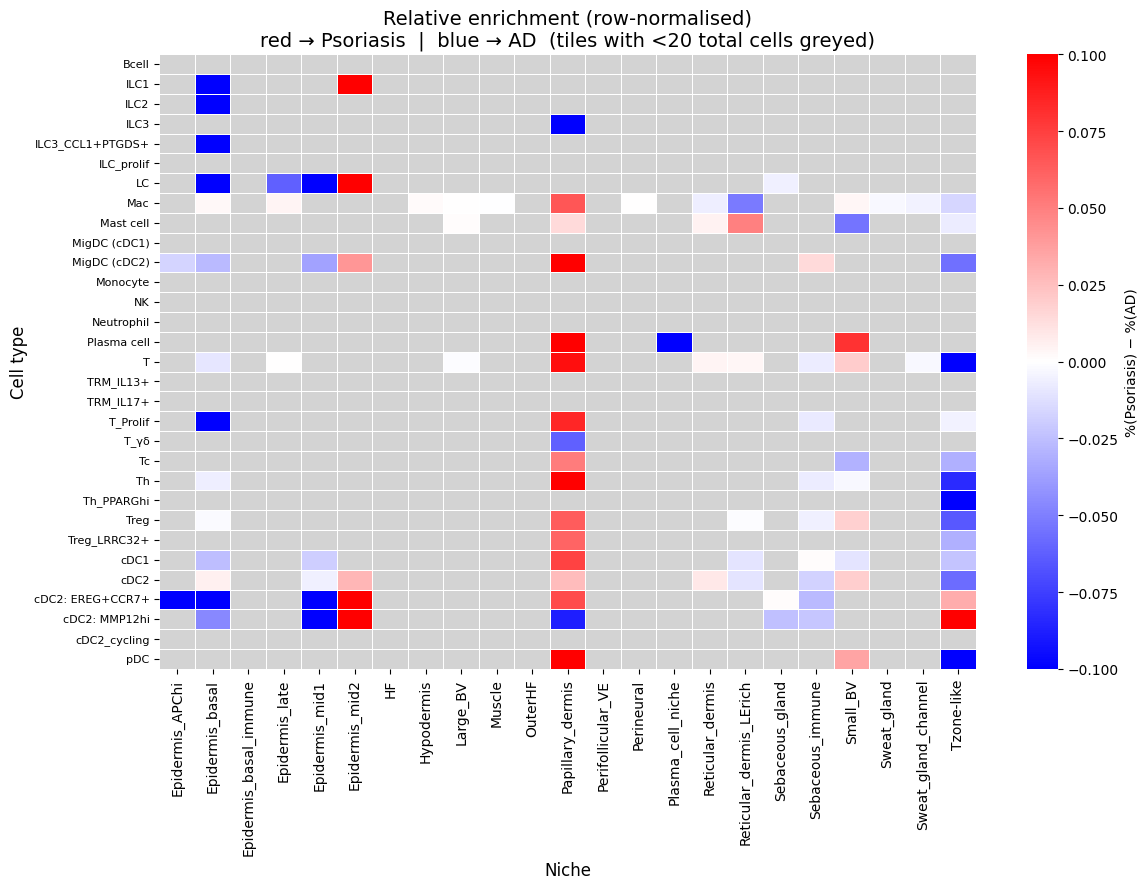

In [46]:
"""
One diverging heat-map:

    •  red  → enriched in **Psoriasis**
    •  blue → enriched in **AD** (atopic dermatitis)
    •  grey → fewer than `min_total` cells in both diseases

No side/top bar-plots.
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

# ---------------------------------------------------------------
# CONFIG
# ---------------------------------------------------------------
CATEGORY_CELL  =ANNOTATION
CATEGORY_NICHE = "niche12"
CATEGORY_DIS   = "disease_overall"

min_total = 20           # hide tiles with < min_total total cells

# names must match exactly what is stored in adata.obs["disease_overall"]
DISEASE_PSOR = "Psoriasis"
DISEASE_AD   = "AD"            # atopic dermatitis

# ----------------------------------------------------------------
# 0   safety check
# ----------------------------------------------------------------
present = set(adata_5k_i.obs[CATEGORY_DIS].unique())
if {DISEASE_PSOR, DISEASE_AD} - present:
    raise ValueError(
        f"Diseases not found in '{CATEGORY_DIS}': "
        f"{ {DISEASE_PSOR, DISEASE_AD} - present }"
    )

# diverging cmap (blue-white-red) with grey for NaNs
cmap = mpl.cm.get_cmap("bwr").copy()
cmap.set_bad("lightgrey")

cell_types = sorted(adata_5k_i.obs[CATEGORY_CELL ].unique())
niches     = sorted(adata_5k_i.obs[CATEGORY_NICHE].unique())

# ---------------------------------------------------------------
# 1   helper → row-wise percentages for a single disease
# ---------------------------------------------------------------
def row_percent(adata, disease):
    tbl = (
        adata.obs.loc[adata.obs[CATEGORY_DIS] == disease]
        .groupby([CATEGORY_CELL, CATEGORY_NICHE]).size()
        .unstack(fill_value=0)
        .reindex(index=cell_types, columns=niches, fill_value=0)
    )
    return tbl.div(tbl.sum(axis=1), axis=0)      # row-normalise

prop_psor = row_percent(adata_5k_i, DISEASE_PSOR)
prop_ad   = row_percent(adata_5k_i, DISEASE_AD)

# ---------------------------------------------------------------
# 2   difference matrix  (positive = Psoriasis)
# ---------------------------------------------------------------
diff      = prop_psor - prop_ad
max_abs   = np.abs(diff.values).max() or 1

# ---------------------------------------------------------------
# 3   mask low-count tiles
# ---------------------------------------------------------------
totals = (
    adata_5k_i.obs
    .groupby([CATEGORY_CELL, CATEGORY_NICHE]).size()
    .unstack(fill_value=0)
    .reindex(index=cell_types, columns=niches, fill_value=0)
)

diff_masked = diff.mask(totals < min_total)

# ---------------------------------------------------------------
# 4   plot
# ---------------------------------------------------------------
plt.figure(figsize=(12, 9))
sns.heatmap(
    diff_masked,
    cmap=cmap,
    vmin=-max_abs,
    vmax= max_abs,
    linewidths=.5,
    linecolor="white",
    cbar_kws=dict(label=f"%({DISEASE_PSOR}) − %({DISEASE_AD})"),
)
plt.xlabel("Niche", fontsize=12)
plt.ylabel("Cell type", fontsize=12)
plt.xticks(rotation=90)
plt.yticks(rotation=0, fontsize=8)
plt.title(
    f"Relative enrichment (row-normalised)\n"
    f"red → {DISEASE_PSOR}  |  blue → {DISEASE_AD}  "
    f"(tiles with <{min_total} total cells greyed)",
    fontsize=14,
)
plt.tight_layout()
plt.show()

In [ ]:
"""
Heat-map only – no side/top bar-plots – and we suppress cells where the
total number of observations (across both diseases) is below a chosen
threshold so that tiny, noisy categories don’t shout in bright red/blue.
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

# ---------------------------------------------------------------
# CONFIG
# ---------------------------------------------------------------
CATEGORY_CELL  = "lvl5_annotation"
CATEGORY_NICHE = "niche12"
CATEGORY_DIS   = "disease_overall"

disease_A, disease_B = sorted(adata_5k_i.obs[CATEGORY_DIS].unique())

min_total = 20           # << hide tiles with < min_total cells
cmap      = mpl.cm.get_cmap("bwr").copy()
cmap.set_bad("lightgrey")

cell_types = sorted(adata_5k_i.obs[CATEGORY_CELL ].unique())
niches     = sorted(adata_5k_i.obs[CATEGORY_NICHE].unique())

# ---------------------------------------------------------------
# 1.  per-disease row-wise % tables
# ---------------------------------------------------------------
def row_percent(adata, disease):
    tbl = (
        adata.obs.loc[adata.obs[CATEGORY_DIS] == disease]
        .groupby([CATEGORY_CELL, CATEGORY_NICHE]).size()
        .unstack(fill_value=0)
        .reindex(index=cell_types, columns=niches, fill_value=0)
    )
    return tbl.div(tbl.sum(axis=1), axis=0)

prop_A = row_percent(adata_5k_i, disease_A)
prop_B = row_percent(adata_5k_i, disease_B)

# difference matrix
diff = prop_A - prop_B
max_abs = np.abs(diff.values).max() or 1

# ---------------------------------------------------------------
# 2.  mask low-count tiles to avoid “rare-cell-type noise”
# ---------------------------------------------------------------
total_counts = (
    adata_5k_i.obs
    .groupby([CATEGORY_CELL, CATEGORY_NICHE]).size()
    .unstack(fill_value=0)
    .reindex(index=cell_types, columns=niches, fill_value=0)
)

diff_masked = diff.mask(total_counts < min_total)

# ---------------------------------------------------------------
# 3.  plot
# ---------------------------------------------------------------
plt.figure(figsize=(12, 10))
sns.heatmap(
    diff_masked,
    cmap=cmap,
    vmin=-1,
    vmax= 1,
    linewidths=.5,
    linecolor="white",
    cbar_kws=dict(label=f"%({disease_A}) − %({disease_B})"),
)
plt.xlabel("Niche", fontsize=12)
plt.ylabel("Cell type", fontsize=12)
plt.xticks(rotation=90)
plt.yticks(rotation=0, fontsize=8)
plt.title(f"Enrichment: {disease_A} (red) vs {disease_B} (blue)\n"
          f"tiles with <{min_total} cells hidden", fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:

adata_5k_i = adata_5k[#(adata_5k.obs["lvl0"].str.startswith("KC"))|
                     #(adata_5k.obs[CATEGORY].str.startswith("Plasm"))|
                        (adata_5k.obs["lvl0"].str.startswith("VE"))|
                     (adata_5k.obs["lvl0"].str.startswith("Fibr"))|
                     #    (adata_5k.obs["lvl0"]=="KC_Ap") |
                      (adata_5k.obs["lvl0"]=="Other") 
                      

#                (adata_5k.obs["lvl0"]=="Melanocyte")|
 #               (adata_5k.obs["lvl0"]=="Adipocyte")|
  #             (adata_5k.obs["lvl0"]=="Mast cell")|
   #                (adata_5k.obs["lvl0"]=="Plasma cell/Bcell")
               ]
adata_5k_i=adata_5k_i[adata_5k_i.obs[CATEGORY]!="Plasma cell"]
adata_5k_i=adata_5k_i[adata_5k_i.obs[CATEGORY]!="Bcell"]
#adata_5k_i.obs
counts = adata_5k_i.obs['niche12'].value_counts()
keep_niches = counts[counts >= 10].index.tolist()

# 3. Subset your AnnData
adata_5k_i = adata_5k_i[adata_5k_i.obs['niche12'].isin(keep_niches)].copy()

# 4. (Optional) If you want nuisance categories removed entirely:
adata_5k_i.obs['niche12'] = adata_5k_i.obs['niche12'].cat.remove_unused_categories()
adata_5k_i.obs['niche12'].value_counts()


In [ ]:


# ---- Desired row and column order ----
all_cell_types = sorted(adata_5k_i.obs["lvl5_annotation"].unique().tolist())

# desired_order = ["NicheA", "NicheC", "NicheB", "NicheZ"]  # your column order

# Set colormap with grey for NaNs
cmap = mpl.cm.Reds.copy()
cmap.set_bad(color='lightgrey')

for x in adata_5k.obs["disease_overall"].unique():
    print(x)
    adata_5k_iii = adata_5k_i[adata_5k_i.obs["disease_overall"] == x]
    
    counts = (
        adata_5k_iii.obs
        .groupby(["niche12", "lvl5_annotation"])
        .size()
        .reset_index(name="count")
    )
    heatmap_data = counts.pivot(index="lvl5_annotation", columns="niche12", values="count")
    heatmap_data = heatmap_data.reindex(index=all_cell_types, columns=desired_order).fillna(np.nan)
    

    heatmap_data = heatmap_data.div(heatmap_data.sum(axis=1), axis=0)


    # assume heatmap_data, cmap, adata_5k_iii are defined

    # raw counts
    col_counts = (
        adata_5k_iii.obs['niche12']
        .value_counts()
        .reindex(heatmap_data.columns)
        .fillna(0)
    )
    row_counts = (
        adata_5k_iii.obs['lvl5_annotation']
        .value_counts()
        .reindex(heatmap_data.index)
        .fillna(0)
    )

    # figure + grid
    fig = plt.figure(figsize=(12,10))
    gs = gridspec.GridSpec(
        2, 2,
        height_ratios=[1,4],
        width_ratios=[4,1],
        hspace=0.05, wspace=0.05
    )

    ax_colbar = fig.add_subplot(gs[0,0])
    ax_empty  = fig.add_subplot(gs[0,1])
    ax_heat   = fig.add_subplot(gs[1,0])
    ax_rowbar = fig.add_subplot(gs[1,1])

    ax_empty.axis('off')

    # 1) niche12 bar (top), no text
    x = np.arange(len(col_counts))
    ax_colbar.bar(x, col_counts.values, color='gray', width=1, align='edge')
    ax_colbar.set_xlim(0, len(col_counts))
    ax_colbar.axis('off')

    # 2) heatmap (no colorbar)
    sns.heatmap(
        heatmap_data,
        cmap=cmap,
        ax=ax_heat,
        cbar=False,
        linewidths=1, linecolor='white'
    )
    ax_heat.set_xlabel('Niche', fontsize=14)
    ax_heat.set_ylabel('Cell type', fontsize=14)
    ax_heat.set_xticks(x+0.5)
    ax_heat.set_xticklabels(heatmap_data.columns, rotation=90, fontsize=12)
    ax_heat.set_yticks(np.arange(len(heatmap_data.index))+0.5)
    ax_heat.set_yticklabels(heatmap_data.index, fontsize=12)

    # 3) lvl5_annotation bar (right), no text, aligned
    y = np.arange(len(row_counts))
    ax_rowbar.barh(y, row_counts.values, color='gray', height=1, align='edge')
    ax_rowbar.set_ylim(0, len(row_counts))
    ax_rowbar.invert_yaxis()
    ax_rowbar.axis('off')

    plt.tight_layout()
    plt.show()

In [ ]:


# # ---- Desired row and column order ----
# all_cell_types = sorted(adata_5k_i.obs["lvl5_annotation"].unique().tolist())

# # desired_order = ["NicheA", "NicheC", "NicheB", "NicheZ"]  # your column order

# # Set colormap with grey for NaNs
# cmap = mpl.cm.Reds.copy()
# cmap.set_bad(color='lightgrey')

# for x in adata_5k.obs["disease_overall"].unique():
#     print(x)
#     adata_5k_iii = adata_5k_i[adata_5k_i.obs["disease_overall"] == x]
    
#     counts = (
#         adata_5k_iii.obs
#         .groupby(["niche12", "lvl5_annotation"])
#         .size()
#         .reset_index(name="count")
#     )
#     heatmap_data = counts.pivot(index="lvl5_annotation", columns="niche12", values="count")
#     heatmap_data = heatmap_data.reindex(index=all_cell_types, columns=desired_order).fillna(np.nan)
    
#     # ---- Min-max normalization per row ----
#     heatmap_data = (heatmap_data - heatmap_data.min(axis=1).values[:, None]) / (
#         heatmap_data.max(axis=1).values[:, None] - heatmap_data.min(axis=1).values[:, None]
#     )
    
#     plt.figure(figsize=(len(heatmap_data.columns)*0.4, len(heatmap_data)*0.2 + 4))
#     ax = sns.heatmap(
#         heatmap_data,
#         cmap=cmap,
#         annot=False,
#         cbar_kws={"label": "Row Min-Max Normalized"},
#         vmin=0,
#         vmax=1,
#         linewidths=1,
#         linecolor='white',
#     )
#     plt.title(x, fontsize=18)
#     plt.xlabel("Niche", fontsize=16)
#     plt.ylabel("Cell Type", fontsize=16)
#     ax.set_xticklabels(ax.get_xticklabels(), fontsize=14, rotation=90)
#     ax.set_yticklabels(ax.get_yticklabels(), fontsize=14)
#     plt.tight_layout()
#     plt.grid(False)
#     plt.show()

# Lesional only

In [ ]:
# adata_5k_i = adata_5k[(adata_5k.obs["lvl0"].str.startswith("T"))|
#                      (adata_5k.obs[CATEGORY].str.startswith("Plasm"))|
#                         (adata_5k.obs[CATEGORY].str.startswith("Bcell"))|
#                      (adata_5k.obs["lvl0"]=="Myeloid")|
#                          (adata_5k.obs[CATEGORY]=="Mast cell") |
#                       (adata_5k.obs[CATEGORY]=="LC_ALOX15hi") 
                      

# #                (adata_5k.obs["lvl0"]=="Melanocyte")|
#  #               (adata_5k.obs["lvl0"]=="Adipocyte")|
#   #             (adata_5k.obs["lvl0"]=="Mast cell")|
#    #                (adata_5k.obs["lvl0"]=="Plasma cell/Bcell")
#                ]
# adata_5k_i.shape

# desired_order2 =  ['Treg','Treg_LRRC32','Treg_LRRC32+', 'TR1', 'Tnaive','Tnaive/T_cm', 'Tnaive/Tcm', 'T_polarized_CCR6+','Th', 'Tc',
#                  'Tc_IFNGhi',"Tc_ZNF683+",
#             'Tc_IL13','TRM_IL13',"TRM_IL13+",
# 'TRM_IL17', "TRM_IL17+", 'T','T_polarized',
                
                 







                
#                  'T_Prolif','T_prolif',
#                   "NK", "ILC1/NK","ILC_prolif","ILC2/3",
              
#                   "Monocyte",
#                   'Monocyte?', 'Mac','Macint','Mac_TREM2+LPL+',
#  'Mac2_CCL14hi','Mac_CCL14hi','MacCCL14_hi','Mac_LPLhi', 'Mac LPLhi (P2RY12-)',
#                   'Mac LPLhi','Mac_TREM+','Mac_Perineural?',"Mac_CX3CR1+",
#                   'Mac_prolif/PreDC', 'TransitionalDC',
#                    "Mac_prolif/preDC",
# 'Mac_prolif',

















#  'cDC1',
#  'cDC2', 'cDC2_MMP12',   'cDC2: MMP12+', 'cDC2: MMP12hi', "cDC2: MMP12+IL1B+",'cDC2: THBS1+',
#                   'MoDC/cDC2','MoDC','cDC2_MoDC(C1QTNF1+KDR+)','cDC2_MoDC (THBS1+)', 'cDC2_THBS1+','LC/MoDC_MMP12+/CXCL9+',
#                   'cMoDC/cDC (C1QTNF1+KDR+)','MoDC?','MoDC_lowqithink?',

#                    'LC_CCR7+','LC_SLC18A2+',
#  'LC','LC_ALOX15hi',
# 'cDC2_MMP12hi (Mig)','cDC: MMP12+/CXCL9+',
#  'MigDC','MigDC_T_doublet',
#  'pDC',"Mast cell", "Neutrophil",
                 
#                   'DC2/Mac',
#                   "Bcell",  'Plasma cell',



 

# ]


# # Ensure 'lvl3_annotation' is categorical
# if not pd.api.types.is_categorical_dtype(adata_5k_i.obs[CATEGORY]):
#     adata_5k_i.obs[CATEGORY] = adata_5k_i.obs[CATEGORY].astype('category')

    
# if not pd.api.types.is_categorical_dtype(adata_5k_i.obs[CATEGORY]):
#     adata_5k_i.obs[CATEGORY] = adata_5k_i.obs[CATEGORY].astype('category')

# missing_data = 0
# for x in list(adata_5k_i.obs[CATEGORY].unique()):
#     if x not in desired_order2:
#         print(x)
#         missing_data +=1
# if missing_data != 0:
#     stop
        
        
# # Set the categories in the desired order
# adata_5k_i.obs[CATEGORY] = pd.Categorical(
#     adata_5k_i.obs[CATEGORY],
#     categories=desired_order2,
#     ordered=True
# )
 
    




In [ ]:
adata_5k_ii=adata_5k_i[adata_5k_i.obs["Site_status"]=="Lesional"]

In [ ]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# import numpy as np
# import matplotlib as mpl

# # Define column (niche) order manually if you want consistent x-axis
# #desired_order = ["NicheA", "NicheC", "NicheB", "NicheZ"]  # Replace with your actual column order

# # Get all unique cell types once, before the loop
# all_cell_types = adata_5k_i.obs["final_annotation_lvl4"].unique().tolist()

# # Use a custom Reds colormap with grey for missing data
# cmap = mpl.cm.Reds.copy()
# cmap.set_bad(color='lightgrey')

# for x in adata_5k_i.obs["disease_overall"].unique():
#     print(x)
    
#     # Subset for this disease
#     adata_5k_ii = adata_5k_i[adata_5k_i.obs["disease_overall"] == x]
    
#     # Step 1: Count of each cell type per niche
#     counts = (
#         adata_5k_ii.obs
#         .groupby(["niche11", "final_annotation_lvl4"])
#         .size()
#         .reset_index(name="count")
#     )
    
#     # Step 2: Pivot to wide format
#     heatmap_data = counts.pivot(index="final_annotation_lvl4", columns="niche11", values="count")
    
#     # Step 3: Reindex to include all cell types (missing ones become NaN)
#     all_cell_types = sorted(adata_5k_i.obs["final_annotation_lvl4"].unique().tolist())

#     # Then in the loop:
#     heatmap_data = heatmap_data.reindex(all_cell_types).fillna(np.nan)    
#     # Step 4: Normalize by column (niche-wise)
#     heatmap_data = heatmap_data.div(heatmap_data.sum(axis=0), axis=1)
    
#     # Step 5: Reorder columns, filter for niches present in this disease
#     desired_order2 = [n for n in desired_order if n in heatmap_data.columns]
#     heatmap_data = heatmap_data[desired_order2]
    
#     # Step 6: Plot
#     plt.figure(figsize=(len(heatmap_data.columns)*0.7, len(heatmap_data)*0.4 + 4))
#     sns.heatmap(
#         heatmap_data,
#         cmap=cmap,
#         annot=False,
#         cbar_kws={"label": "Column-normalized Proportion"},
#         vmin=0,
#         vmax=1,
#         linewidths=1,
#         linecolor='white',
#     )
    
#     plt.title(x)
#     plt.xlabel("Niche")
#     plt.ylabel("Cell Type")
#     plt.xticks(rotation=90)
#     plt.tight_layout()
#     plt.grid(False)
#     plt.show()


In [ ]:
adata_5k_ii

In [ ]:
adata_5k_ii.obs["disease_overall"].unique()

In [ ]:
adata_5k_i.obs["niche12"].value_counts()

In [ ]:
# 1. Compute counts per niche
counts = adata_5k_i.obs['niche12'].value_counts()

# 2. Keep only niches with ≥10 cells
keep_niches = counts[counts >= 10].index.tolist()

# 3. Subset your AnnData
adata_5k_i = adata_5k_i[adata_5k_i.obs['niche12'].isin(keep_niches)].copy()

# 4. (Optional) If you want nuisance categories removed entirely:
adata_5k_i.obs['niche12'] = adata_5k_i.obs['niche12'].cat.remove_unused_categories()
adata_5k_i.obs['niche12'].value_counts()

In [ ]:

desired_order2 =  ['Treg','Treg_LRRC32','Treg_LRRC32+', 'TR1', 'Tnaive','Tnaive/T_cm', 'Tnaive/Tcm', 'T_polarized_CCR6+','Th', 'Tc',
                 'Tc_IFNGhi',"Tc_ZNF683+",
            'Tc_IL13','TRM_IL13',"TRM_IL13+",
'TRM_IL17', "TRM_IL17+", 'T','T_polarized',
                
                 







                
                 'T_Prolif','T_prolif',
                  "NK", "ILC1/NK","ILC_prolif","ILC2/3",
              
                  "Monocyte",
                  'Monocyte?', 'Mac','Macint','Mac_TREM2+LPL+',
 'Mac2_CCL14hi','Mac_CCL14hi','MacCCL14_hi','Mac_LPLhi', 'Mac LPLhi (P2RY12-)',
                  'Mac LPLhi','Mac_TREM+','Mac_Perineural?',"Mac_CX3CR1+",
                  'Mac_prolif/PreDC', 'TransitionalDC',
                   "Mac_prolif/preDC",
'Mac_prolif',

















 'cDC1',
 'cDC2', 'cDC2_MMP12',   'cDC2: MMP12+', 'cDC2: MMP12hi', "cDC2: MMP12+IL1B+",'cDC2: THBS1+',
                  'MoDC/cDC2','MoDC','cDC2_MoDC(C1QTNF1+KDR+)','cDC2_MoDC (THBS1+)', 'cDC2_THBS1+','LC/MoDC_MMP12+/CXCL9+',
                  'cMoDC/cDC (C1QTNF1+KDR+)','MoDC?','MoDC_lowqithink?',

                   'LC_CCR7+','LC_SLC18A2+',
 'LC','LC_ALOX15hi',
'cDC2_MMP12hi (Mig)','cDC: MMP12+/CXCL9+',
 'MigDC','MigDC_T_doublet',
 'pDC',"Mast cell", "Neutrophil",
                 
                  'DC2/Mac',
                  "Bcell",  'Plasma cell',



 

]
 
desired_order2=[x for x in adata_5k_ii.obs[CATEGORY].unique()]
    
if not pd.api.types.is_categorical_dtype(adata_5k_ii.obs[CATEGORY]):
    adata_5k_ii.obs[CATEGORY] = adata_5k_ii.obs[CATEGORY].astype('category')

missing_data = 0
for x in list(adata_5k_ii.obs[CATEGORY].unique()):
    if x not in desired_order2:
        print(x)
        missing_data +=1
if missing_data != 0:
    stop
        
        
# Set the categories in the desired order
adata_5k_ii.obs[CATEGORY] = pd.Categorical(
    adata_5k_ii.obs[CATEGORY],
    categories=desired_order2,
    ordered=True
)
 
    




In [ ]:

# ---- Desired row and column order ----
all_cell_types = sorted(adata_5k_ii.obs["lvl5_annotation"].unique().tolist())
# desired_order = ["NicheA", "NicheC", "NicheB", "NicheZ"]  # your column order

# Set colormap with grey for NaNs
cmap = mpl.cm.Reds.copy()
cmap.set_bad(color='lightgrey')

for x in adata_5k_i.obs["disease_overall"].unique():
    print(x)
    adata_5k_iii = adata_5k_i[adata_5k_i.obs["disease_overall"] == x]
    
    counts = (
        adata_5k_iii.obs
        .groupby(["niche12", "lvl5_annotation"])
        .size()
        .reset_index(name="count")
    )
    heatmap_data = counts.pivot(index="lvl5_annotation", columns="niche12", values="count")
    #heatmap_data = heatmap_data.reindex(index=all_cell_types, columns=desired_order).fillna(np.nan)
    # after pivot…
    heatmap_data = counts.pivot(
    index="lvl5_annotation",
    columns="niche12",
    values="count"
).reindex(
    index=desired_order2,   # ← use your custom order here
    columns=desired_order   # (assuming you’ve already defined desired_order)
).fillna(0)

# then normalize, plot, etc.
    # ---- Min-max normalization per row ----
    heatmap_data = (heatmap_data - heatmap_data.min(axis=1).values[:, None]) / (
        heatmap_data.max(axis=1).values[:, None] - heatmap_data.min(axis=1).values[:, None]
    )
    
    plt.figure(figsize=(len(heatmap_data.columns)*0.4, len(heatmap_data)*0.2 + 4))
    ax = sns.heatmap(
        heatmap_data,
        cmap=cmap,
        annot=False,
        cbar_kws={"label": "Row Min-Max Normalized"},
        vmin=0,
        vmax=1,
        linewidths=1,
        linecolor='white',
    )
    plt.title(x, fontsize=18)
    plt.xlabel("Niche", fontsize=16)
    plt.ylabel("Cell Type", fontsize=16)
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=14, rotation=90)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=14)
    plt.tight_layout()
    plt.grid(False)
    plt.show()

In [ ]:
for x in all_cell_types:
    if x not in desired_order2:
        print(x)

In [ ]:
for x in desired_order2 :
    if x not in all_cell_types:
        print(x)

In [ ]:


# ---- Desired row and column order ----
all_cell_types = sorted(adata_5k_i.obs["lvl5_annotation"].unique().tolist())

# desired_order = ["NicheA", "NicheC", "NicheB", "NicheZ"]  # your column order

# Set colormap with grey for NaNs
cmap = mpl.cm.Reds.copy()
cmap.set_bad(color='lightgrey')

for x in adata_5k.obs["disease_overall"].unique():
    print(x)
    adata_5k_iii = adata_5k_i[adata_5k_i.obs["disease_overall"] == x]
    
    counts = (
        adata_5k_iii.obs
        .groupby(["niche12", "lvl5_annotation"])
        .size()
        .reset_index(name="count")
    )
    heatmap_data = counts.pivot(index="lvl5_annotation", columns="niche12", values="count")
    heatmap_data = heatmap_data.reindex(index=all_cell_types, columns=desired_order).fillna(np.nan)
    

    heatmap_data = heatmap_data.div(heatmap_data.sum(axis=1), axis=0)


    # assume heatmap_data, cmap, adata_5k_iii are defined

    # raw counts
    col_counts = (
        adata_5k_iii.obs['niche12']
        .value_counts()
        .reindex(heatmap_data.columns)
        .fillna(0)
    )
    row_counts = (
        adata_5k_iii.obs['lvl5_annotation']
        .value_counts()
        .reindex(heatmap_data.index)
        .fillna(0)
    )

    # figure + grid
    fig = plt.figure(figsize=(12,10))
    gs = gridspec.GridSpec(
        2, 2,
        height_ratios=[1,4],
        width_ratios=[4,1],
        hspace=0.05, wspace=0.05
    )

    ax_colbar = fig.add_subplot(gs[0,0])
    ax_empty  = fig.add_subplot(gs[0,1])
    ax_heat   = fig.add_subplot(gs[1,0])
    ax_rowbar = fig.add_subplot(gs[1,1])

    ax_empty.axis('off')

    # 1) niche12 bar (top), no text
    x = np.arange(len(col_counts))
    ax_colbar.bar(x, col_counts.values, color='gray', width=1, align='edge')
    ax_colbar.set_xlim(0, len(col_counts))
    ax_colbar.axis('off')

    # 2) heatmap (no colorbar)
    sns.heatmap(
        heatmap_data,
        cmap=cmap,
        ax=ax_heat,
        cbar=False,
        linewidths=1, linecolor='white'
    )
    ax_heat.set_xlabel('Niche', fontsize=14)
    ax_heat.set_ylabel('Cell type', fontsize=14)
    ax_heat.set_xticks(x+0.5)
    ax_heat.set_xticklabels(heatmap_data.columns, rotation=90, fontsize=12)
    ax_heat.set_yticks(np.arange(len(heatmap_data.index))+0.5)
    ax_heat.set_yticklabels(heatmap_data.index, fontsize=12)

    # 3) lvl5_annotation bar (right), no text, aligned
    y = np.arange(len(row_counts))
    ax_rowbar.barh(y, row_counts.values, color='gray', height=1, align='edge')
    ax_rowbar.set_ylim(0, len(row_counts))
    ax_rowbar.invert_yaxis()
    ax_rowbar.axis('off')

    plt.tight_layout()
    plt.show()

In [ ]:
adata_5k_ii[adata_5k_ii.obs["disease_overall"]=="Psoriasis"].obs.info_id2.value_counts()

In [ ]:

adata_5k_i = adata_5k[#(adata_5k.obs["lvl0"].str.startswith("KC"))|
                     #(adata_5k.obs[CATEGORY].str.startswith("Plasm"))|
                        (adata_5k.obs["lvl0"].str.startswith("VE"))|
                     (adata_5k.obs["lvl0"].str.startswith("Fibr"))|
                     #    (adata_5k.obs["lvl0"]=="KC_Ap") |
                      (adata_5k.obs["lvl0"]=="Other") 
                      

#                (adata_5k.obs["lvl0"]=="Melanocyte")|
 #               (adata_5k.obs["lvl0"]=="Adipocyte")|
  #             (adata_5k.obs["lvl0"]=="Mast cell")|
   #                (adata_5k.obs["lvl0"]=="Plasma cell/Bcell")
               ]
adata_5k_i=adata_5k_i[adata_5k_i.obs[CATEGORY]!="Plasma cell"]
adata_5k_i=adata_5k_i[adata_5k_i.obs[CATEGORY]!="Bcell"]
#adata_5k_i.obs


In [ ]:
counts = adata_5k_i.obs['niche12'].value_counts()
keep_niches = counts[counts >= 10].index.tolist()

# 3. Subset your AnnData
adata_5k_i = adata_5k_i[adata_5k_i.obs['niche12'].isin(keep_niches)].copy()

# 4. (Optional) If you want nuisance categories removed entirely:
adata_5k_i.obs['niche12'] = adata_5k_i.obs['niche12'].cat.remove_unused_categories()
adata_5k_i.obs['niche12'].value_counts()


In [ ]:
# ---- Desired row and column order ----
all_cell_types = sorted(adata_5k_i.obs["lvl5_annotation"].unique().tolist())

# desired_order = ["NicheA", "NicheC", "NicheB", "NicheZ"]  # your column order

# Set colormap with grey for NaNs
cmap = mpl.cm.Reds.copy()
cmap.set_bad(color='lightgrey')

for x in adata_5k.obs["disease_overall"].unique():
    print(x)
    adata_5k_iii = adata_5k_i[adata_5k_i.obs["disease_overall"] == x]
    
    counts = (
        adata_5k_iii.obs
        .groupby(["niche12", "lvl5_annotation"])
        .size()
        .reset_index(name="count")
    )
    heatmap_data = counts.pivot(index="lvl5_annotation", columns="niche12", values="count")
    heatmap_data = heatmap_data.reindex(index=all_cell_types, columns=desired_order).fillna(np.nan)
    

    heatmap_data = heatmap_data.div(heatmap_data.sum(axis=1), axis=0)

    plt.figure(figsize=(len(heatmap_data.columns)*0.8, len(heatmap_data)*0.2 + 4))
    ax = sns.heatmap(
        heatmap_data,
        cmap=cmap,
        annot=False,
        cbar_kws={"label": "Row Normalized"},
        vmin=0,
        vmax=1,
        linewidths=1,
        linecolor='white',
    )
    plt.title(x, fontsize=18)
    plt.xlabel("Niche", fontsize=16)
    plt.ylabel("Cell Type", fontsize=16)
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=14, rotation=90)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=14)
    plt.tight_layout()
    plt.grid(False)
    plt.show()

In [ ]:


# ---- Desired row and column order ----
all_cell_types = sorted(adata_5k_i.obs["lvl5_annotation"].unique().tolist())

# desired_order = ["NicheA", "NicheC", "NicheB", "NicheZ"]  # your column order

# Set colormap with grey for NaNs
cmap = mpl.cm.Reds.copy()
cmap.set_bad(color='lightgrey')

for x in adata_5k.obs["disease_overall"].unique():
    print(x)
    adata_5k_iii = adata_5k_i[adata_5k_i.obs["disease_overall"] == x]
    
    counts = (
        adata_5k_iii.obs
        .groupby(["niche12", "lvl5_annotation"])
        .size()
        .reset_index(name="count")
    )
    heatmap_data = counts.pivot(index="lvl5_annotation", columns="niche12", values="count")
    heatmap_data = heatmap_data.reindex(index=all_cell_types, columns=desired_order).fillna(np.nan)
    

    heatmap_data = heatmap_data.div(heatmap_data.sum(axis=1), axis=0)


    # assume heatmap_data, cmap, adata_5k_iii are defined

    # raw counts
    col_counts = (
        adata_5k_iii.obs['niche12']
        .value_counts()
        .reindex(heatmap_data.columns)
        .fillna(0)
    )
    row_counts = (
        adata_5k_iii.obs['lvl5_annotation']
        .value_counts()
        .reindex(heatmap_data.index)
        .fillna(0)
    )

    # figure + grid
    fig = plt.figure(figsize=(12,10))
    gs = gridspec.GridSpec(
        2, 2,
        height_ratios=[1,4],
        width_ratios=[4,1],
        hspace=0.05, wspace=0.05
    )

    ax_colbar = fig.add_subplot(gs[0,0])
    ax_empty  = fig.add_subplot(gs[0,1])
    ax_heat   = fig.add_subplot(gs[1,0])
    ax_rowbar = fig.add_subplot(gs[1,1])

    ax_empty.axis('off')

    # 1) niche12 bar (top), no text
    x = np.arange(len(col_counts))
    ax_colbar.bar(x, col_counts.values, color='gray', width=1, align='edge')
    ax_colbar.set_xlim(0, len(col_counts))
    ax_colbar.axis('off')

    # 2) heatmap (no colorbar)
    sns.heatmap(
        heatmap_data,
        cmap=cmap,
        ax=ax_heat,
        cbar=False,
        linewidths=1, linecolor='white'
    )
    ax_heat.set_xlabel('Niche', fontsize=14)
    ax_heat.set_ylabel('Cell type', fontsize=14)
    ax_heat.set_xticks(x+0.5)
    ax_heat.set_xticklabels(heatmap_data.columns, rotation=90, fontsize=12)
    ax_heat.set_yticks(np.arange(len(heatmap_data.index))+0.5)
    ax_heat.set_yticklabels(heatmap_data.index, fontsize=12)

    # 3) lvl5_annotation bar (right), no text, aligned
    y = np.arange(len(row_counts))
    ax_rowbar.barh(y, row_counts.values, color='gray', height=1, align='edge')
    ax_rowbar.set_ylim(0, len(row_counts))
    ax_rowbar.invert_yaxis()
    ax_rowbar.axis('off')

    plt.tight_layout()
    plt.show()

In [ ]:
syop

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np

# ---- Desired row and column order ----
all_cell_types = sorted(adata_5k_ii.obs["lvl5_annotation"].unique().tolist())
# desired_order = ["NicheA", "NicheC", "NicheB", "NicheZ"]  # put your custom column order here

# Set colormap with grey for NaNs
cmap = mpl.cm.Reds.copy()
cmap.set_bad(color='lightgrey')

# ---- Loop through diseases ----
for x in adata_5k_i.obs["disease_overall"].unique():
    print(x)
    
    adata_5k_iii = adata_5k_i[adata_5k_i.obs["disease_overall"] == x]
    
    counts = (
        adata_5k_iii.obs
        .groupby(["niche12", "lvl5_annotation"])
        .size()
        .reset_index(name="count")
    )
    
    heatmap_data = counts.pivot(index="lvl5_annotation", columns="niche12", values="count")
    
    # Align rows and columns using fixed order
    heatmap_data = heatmap_data.reindex(index=all_cell_types, columns=desired_order).fillna(np.nan)
    
    # ---- ROW NORMALIZATION ----
    heatmap_data = heatmap_data.div(heatmap_data.sum(axis=1), axis=0)
    
    # Plot
    plt.figure(figsize=(len(heatmap_data.columns)*0.4, len(heatmap_data)*0.2 + 4))
    ax = sns.heatmap(
        heatmap_data,
        cmap=cmap,
        annot=False,
        cbar_kws={"label": "Row-normalized Proportion"},
        vmin=0,
        vmax=1,
        linewidths=1,
        linecolor='white',
    )
    
    plt.title(x, fontsize=18)
    plt.xlabel("Niche", fontsize=16)
    plt.ylabel("Cell Type", fontsize=16)
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=14, rotation=90)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=14)
    plt.tight_layout()
    plt.grid(False)
    plt.show()

In [ ]:
# ---- Desired row and column order ----
all_cell_types = sorted(adata_5k_ii.obs["lvl5_annotation"].unique().tolist())
#desired_order = ["NicheA", "NicheC", "NicheB", "NicheZ"]  # set your custom order here

# Set colormap with grey for NaNs
cmap = mpl.cm.Reds.copy()
cmap.set_bad(color='lightgrey')

# ---- Loop through diseases ----
for x in adata_5k_ii.obs["disease_overall"].unique():
    print(x)
    
    adata_5k_iii = adata_5k_ii[adata_5k_ii.obs["disease_overall"] == x]
    
    counts = (
        adata_5k_iii.obs
        .groupby(["niche12", "lvl5_annotation"])
        .size()
        .reset_index(name="count")
    )
    
    heatmap_data = counts.pivot(index="lvl5_annotation", columns="niche12", values="count")
    
    # Align rows and columns using fixed order
    heatmap_data = heatmap_data.reindex(index=all_cell_types, columns=desired_order).fillna(np.nan)
    
    # Normalize by column
    heatmap_data = heatmap_data.div(heatmap_data.sum(axis=0), axis=1)
    
    # Plot
    plt.figure(figsize=(len(heatmap_data.columns)*0.7, len(heatmap_data)*0.4 + 4))
    ax = sns.heatmap(
        heatmap_data,
        cmap=cmap,
        annot=False,
        cbar_kws={"label": "Column-normalized Proportion"},
        vmin=0,
        vmax=1,
        linewidths=1,
        linecolor='white',
    )
    
    plt.title(x, fontsize=18)
    plt.xlabel("Niche", fontsize=16)
    plt.ylabel("Cell Type", fontsize=16)
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=14, rotation=90)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=14)
    plt.tight_layout()
    plt.grid(False)
    plt.show()

In [ ]:



    
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

for x in adata_5k_ii.obs["disease_overall"].unique():
    adata_5k_iii=adata_5k_ii[adata_5k_ii.obs["disease_overall"]==x]
    # Step 1: Count of each cell type per niche
    counts = (
        adata_5k_iii.obs
        .groupby(["niche12", "lvl5_annotation"])
        .size()
        .reset_index(name="count")
    )

    # Step 2: Pivot to wide format
    heatmap_data = counts.pivot(index="lvl5_annotation", columns="niche12", values="count").fillna(0)

    # Step 3: Row-wise normalization (by cell type)
    heatmap_data = heatmap_data.div(heatmap_data.sum(axis=0), axis=1)
    print(x)
    # Step 4: Plot
    plt.figure(figsize=(len(heatmap_data.columns)*0.7, len(heatmap_data)*0.4 + 4))
    sns.heatmap(
        heatmap_data,
        cmap="Reds",
        annot=False,
        cbar_kws={"label": "Col-normalized Proportion"},
        vmin=0,
        vmax=1,
        linewidths=1,
        linecolor='white',
        #title=x
    )

    plt.xlabel("Niche")
    plt.ylabel("Cell Type")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.grid(False)
    plt.show()

In [ ]:
# Define column (niche) order manually if you want consistent x-axis
#desired_order = ["NicheA", "NicheC", "NicheB", "NicheZ"]  # Replace with your actual column order

# Get all unique cell types once, before the loop
all_cell_types = adata_5k_ii.obs["lvl5_annotation"].unique().tolist()

# Use a custom Reds colormap with grey for missing data
cmap = mpl.cm.Reds.copy()
cmap.set_bad(color='lightgrey')

for x in adata_5k_ii.obs["disease_overall"].unique():
    print(x)
    
    # Subset for this disease
    adata_5k_iii = adata_5k_ii[adata_5k_ii.obs["disease_overall"] == x]
    
    # Step 1: Count of each cell type per niche
    counts = (
        adata_5k_iii.obs
        .groupby(["niche12", "lvl5_annotation"])
        .size()
        .reset_index(name="count")
    )
    
    # Step 2: Pivot to wide format
    heatmap_data = counts.pivot(index="lvl5_annotation", columns="niche12", values="count")
    
    # Step 3: Reindex to include all cell types (missing ones become NaN)
    all_cell_types = sorted(adata_5k_i.obs["lvl5_annotation"].unique().tolist())

    # Then in the loop:
    heatmap_data = heatmap_data.reindex(all_cell_types).fillna(np.nan)    
    # Step 4: Normalize by column (niche-wise)
    heatmap_data = heatmap_data.div(heatmap_data.sum(axis=0), axis=1)
    
    # Step 5: Reorder columns, filter for niches present in this disease
    desired_order2 = [n for n in desired_order if n in heatmap_data.columns]
    heatmap_data = heatmap_data[desired_order2]
    
    # Step 6: Plot
    plt.figure(figsize=(len(heatmap_data.columns)*0.7, len(heatmap_data)*0.4 + 4))
    sns.heatmap(
        heatmap_data,
        cmap=cmap,
        annot=False,
        cbar_kws={"label": "Column-normalized Proportion"},
        vmin=0,
        vmax=1,
        linewidths=1,
        linecolor='white',
    )
    
    plt.title(x)
    plt.xlabel("Niche")
    plt.ylabel("Cell Type")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.grid(False)
    plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# ---- Desired row and column order ----
all_cell_types = sorted(adata_5k_ii.obs["final_annotation_lvl5_4"].unique().tolist())
# desired_order = ["NicheA", "NicheC", "NicheB", "NicheZ"]  # Set your custom column order

# ---- Colormap with grey for NaNs ----
cmap = mpl.cm.Reds.copy()
cmap.set_bad(color='lightgrey')

# ---- Loop through diseases ----
for x in adata_5k_ii.obs["disease_overall"].unique():
    print(x)
    
    adata_5k_iii = adata_5k_ii[adata_5k_ii.obs["disease_overall"] == x]
    
    # Get counts for (niche11, cell type)
    counts = (
        adata_5k_iii.obs
        .groupby(["niche12", "lvl5_annotation"])
        .size()
        .reset_index(name="count")
    )
    
    # Pivot to form matrix: rows = cell types, columns = niches
    heatmap_data = counts.pivot(index="lvl5_annotation", columns="niche12", values="count")
    
    # Reindex to enforce row and column order
    heatmap_data = heatmap_data.reindex(index=all_cell_types, columns=desired_order).astype(float)
    
    # Row-normalize: Each cell type sums to 1
    heatmap_data = heatmap_data.div(heatmap_data.sum(axis=1), axis=0)
    
    # Plot
    plt.figure(figsize=(len(heatmap_data.columns)*0.7, len(heatmap_data)*0.4 + 4))
    ax = sns.heatmap(
        heatmap_data,
        cmap=cmap,
        annot=False,
        cbar_kws={"label": "Row-normalized Proportion"},
        vmin=0,
        vmax=1,
        linewidths=1,
        linecolor='white',
    )
    
    plt.title(x, fontsize=18)
    plt.xlabel("Niche", fontsize=16)
    plt.ylabel("Cell Type", fontsize=16)
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=14, rotation=90)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=14)
    plt.tight_layout()
    plt.grid(False)
    plt.show()


# Nonlesional

In [ ]:
adata_5k_i = adata_5k[#(adata_5k.obs["Site_status"]=="Lesional")|
                   (adata_5k.obs["Site_status"]=="Nonlesional")|
                    (adata_5k.obs["Site_status"]=="Baseline_never")
                   ]
adata_5k.obs["Site_status"].value_counts()

In [ ]:
STOP

In [ ]:
# # ---- Desired row and column order ----
# all_cell_types = sorted(adata_5k_i.obs["final_annotation_lvl5_4"].unique().tolist())
# #desired_order = ["NicheA", "NicheC", "NicheB", "NicheZ"]  # set your custom order here

# # Set colormap with grey for NaNs
# cmap = mpl.cm.Reds.copy()
# cmap.set_bad(color='lightgrey')

# # ---- Loop through diseases ----
# for x in adata_5k_i.obs["disease_overall"].unique():
#     print(x)
    
#     adata_5k_ii = adata_5k_i[adata_5k_i.obs["disease_overall"] == x]
    
#     counts = (
#         adata_5k_ii.obs
#         .groupby(["niche11", "final_annotation_lvl4"])
#         .size()
#         .reset_index(name="count")
#     )
    
#     heatmap_data = counts.pivot(index="final_annotation_lvl4", columns="niche11", values="count")
    
#     # Align rows and columns using fixed order
#     heatmap_data = heatmap_data.reindex(index=all_cell_types, columns=desired_order).fillna(np.nan)
    
#     # Normalize by column
#     heatmap_data = heatmap_data.div(heatmap_data.sum(axis=0), axis=1)
    
#     # Plot
#     plt.figure(figsize=(len(heatmap_data.columns)*0.7, len(heatmap_data)*0.4 + 4))
#     ax = sns.heatmap(
#         heatmap_data,
#         cmap=cmap,
#         annot=False,
#         cbar_kws={"label": "Column-normalized Proportion"},
#         vmin=0,
#         vmax=1,
#         linewidths=1,
#         linecolor='white',
#     )
    
#     plt.title(x, fontsize=18)
#     plt.xlabel("Niche", fontsize=16)
#     plt.ylabel("Cell Type", fontsize=16)
#     ax.set_xticklabels(ax.get_xticklabels(), fontsize=14, rotation=90)
#     ax.set_yticklabels(ax.get_yticklabels(), fontsize=14)
#     plt.tight_layout()
#     plt.grid(False)
#     plt.show()


    
 

In [ ]:


# for x in adata_5k_i.obs["disease_overall"].unique():
#     adata_5k_ii=adata_5k_i[adata_5k_i.obs["disease_overall"]==x]
#     # Step 1: Count of each cell type per niche
#     counts = (
#         adata_5k_ii.obs
#         .groupby(["niche11", "final_annotation_lvl4"])
#         .size()
#         .reset_index(name="count")
#     )

#     # Step 2: Pivot to wide format
#     heatmap_data = counts.pivot(index="final_annotation_lvl4", columns="niche11", values="count").fillna(0)

#     # Step 3: Row-wise normalization (by cell type)
#     heatmap_data = heatmap_data.div(heatmap_data.sum(axis=0), axis=1)
#     print(x)
#     # Step 4: Plot
#     plt.figure(figsize=(len(heatmap_data.columns)*0.7, len(heatmap_data)*0.4 + 4))
#     sns.heatmap(
#         heatmap_data,
#         cmap="Reds",
#         annot=False,
#         cbar_kws={"label": "Col-normalized Proportion"},
#         vmin=0,
#         vmax=1,
#         linewidths=1,
#         linecolor='white',
#         #title=x
#     )

#     plt.xlabel("Niche")
#     plt.ylabel("Cell Type")
#     plt.xticks(rotation=90)
#     plt.tight_layout()
#     plt.grid(False)
#     plt.show()
    


 

In [ ]:
adata_5k.obs["disease_overall"].value_counts()

In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Step 1: Create a contingency table of 'niche10' and 'Site_status_binary'
# contingency = pd.crosstab(adata.obs["niche10"], adata.obs["Site_status_binary"])

# # Step 2: Convert the counts to proportions
# proportions = contingency.div(contingency.sum(axis=1), axis=0)

# # Step 2.5: Sort by proportion of "Lesional" (assumes it's named exactly that)
# sorted_proportions = proportions.sort_values(by="Lesional", ascending=False)

# # Step 3: Plot the proportions as a stacked bar plot with custom colors
# ax = sorted_proportions.plot(
#     kind='bar',
#     stacked=True,
#     color=["#f33033",  "#b0e0f0"],  # Red for "Lesional", Blue for "Nonlesional"
#     edgecolor='black',
#     figsize=(8, 4)
# )
 

# # Step 4: Customize plot
# plt.ylabel('Proportion of cells')
# plt.xlabel('Niche (niche10)')
# plt.title('Proportion of Site_status_binary per Niche')

# # Remove background grid
# plt.grid(False)

# # Add legend with custom position
# plt.legend(title='Site_status_binary', bbox_to_anchor=(1.05, 1), loc='upper left')

# # Adjust layout
# plt.tight_layout()

# # Show the plot
# plt.show()

In [ ]:
adata_5k = adata_5k[(adata_5k.obs["Site_status"]=="Lesional")|
                   (adata_5k.obs["Site_status"]=="Nonlesional")|
                    (adata_5k.obs["Site_status"]=="Baseline_never")
                   ]
adata_5k.obs["Site_status"].value_counts()

In [ ]:
adata_5k = adata_5k[(adata_5k.obs["Timepoint"]=="Lesional Baseline")|
                   (adata_5k.obs["Timepoint"]=="Non-lesional Baseline")|
                    (adata_5k.obs["Timepoint"]=="Never Lesional")
                   ]
adata_5k.obs["Site_status"].value_counts()

In [ ]:
adata= adata_5k[adata_5k.obs["disease_overall"]=="AD"]
adata.obs["niche10"] = adata.obs["niche11"] 

In [ ]:
adata.obs["Timepoint"].value_counts()

In [ ]:
adata.obs["Site_status_binary"].value_counts()

In [ ]:
adata_5k

In [ ]:
adata.obs["Timepoint"].value_counts()

In [ ]:
adata.obs["Site_status"].value_counts()